# Base de datos 


Se utilizara para el análisis una base de datos de inmuebles en España generada desde https://www.kaggle.com/datasets/thedevastator/spanish-housing-dataset-location-size-price-and?select=rentas_PV.csv

# Descripción de las variables:

- **Obtention_date:** The date on which the listing was collected. (String).
- **ad_description:**	A description of the house. (String)
- **ad_last_update:**	The date of the last update to the listing. (String)
- **air_conditioner:**	A indicator of whether or not the house has air conditioning. (Boolean)
- **balcony:** indicator of whether or not the house has a balcony. (Boolean)
- **bath_num:**	The number of bathrooms in the house. (Integer)
- **built_in_wardrobe:**	A indicator of whether or not the house has a built in wardrobe. (Boolean)
- **chimney:** A indicator of whether or not the house has a chimney. (Boolean)
- **construct_date:**	The date the house was constructed. (String)
- **energetic_certif:** The energetic certification of the house. (String)
- **floor:**	The floor on which the house is located. (Integer)
- **garage:**	A indicator of whether or not the house has a garage. (Boolean)
- **garden:**	A indicator of whether or not the house has a garden. (Boolean)
- **ground_size:**	The size of the house in square meters. (Integer)
- **heating:**	The type of heating in the house. (String)
- **house_type:**	The type of house. (String)
- **kitchen:**	A indicator of whether or not the house has a kitchen. (Boolean)
- **lift:**	A indicator of whether or not the house has a lift. (Boolean)
- **loc_city:**	The city in which the house is located. (String)
- **loc_district:**	The district in which the house is located. (String)
- **loc_full:**	The full address of the house. (String)
- **loc_neigh:**	The neighborhood in which the house is located. (String)
- **loc_street:**	The street on which the house is located. (String)
- **loc_zone:**	The zone in which the house is located. (String)
- **m2_real:**	The real size of square meters
- **m2_useful:**	The size of the house in square meters. (Integer)
- **orientation:**	The orientation of the house. (String)
- **price:**	The price of the house. (Integer)
- **reduced_mobility:**	A indicator of whether or not the house is suitable for reduced mobility. (Boolean)
- **room_num:**	The number of rooms in the house. (Integer)
- **storage_room:**	A indicator of whether or not the house has a storage room. (Boolean)
- **swimming_pool:**	A indicator of whether or not the house has a swimming pool. (Boolean)
- **terrace:**	A indicator of whether or not the house has a terrace. (Boolean)

In [1]:
#Definimos las librerias que vamos a utilizar 
# importar los datos
import os

# Para trabajar con el dataframe
import pandas as pd

#visualizacion
import matplotlib.pyplot as plt 
import seaborn as sns

# Para analisis matemático
import numpy as np
import statsmodels.api as sm

# Para el modelo de regresion

import sklearn


In [2]:
# Carga y lectura de los datos

dfs = []
path = r"----------------"

all_files = os.listdir(path)
csv_files = [f for f in all_files if f.endswith('.csv')]

# Convertimos los archivos en un DATAFRAME.
for csv_file in csv_files:
    df = pd.read_csv(os.path.join(path, csv_file))
    dfs.append(df)

In [3]:
# Concatenamos todos los dataframe en unos solo.
DF = pd.concat(dfs, axis=0, ignore_index=True)


#Verificamos que los datos hayan sido cargados correctamente
DF.head()


,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
0,Precio chalet individual en la localidad de Ab...,Anuncio actualizado el 27 de marzo,0,0,2,0,0,segunda mano/buen estado,NaN,NaN,...,172.0,2019-03-29,"norte, sur, este, oeste",310000,0,4,0,0,1,NaN
1,"Atico de 80m2, para entrar a vivir, con salón ...",más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,2006.0,no indicado,...,NaN,2019-03-29,NaN,139000,1,3,1,0,0,NaN
2,B/ Etxaguen. Casa de reciente construcción con...,más de 5 meses sin actualizar,0,0,3,0,0,segunda mano/buen estado,NaN,no indicado,...,NaN,2019-03-29,NaN,480000,0,4,1,0,1,NaN
3,Se vende vivienda en abornikano (ayuntamiento ...,más de 5 meses sin actualizar,0,1,1,1,1,segunda mano/buen estado,NaN,en trámite,...,NaN,2019-03-29,NaN,150000,0,4,1,0,1,NaN
4,Negociables.,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,NaN,no indicado,...,74.0,2019-03-29,"sur, oeste",90000,0,2,1,1,1,NaN


In [4]:
# 
DF.shape

(100000, 36)

In [5]:

#
DF.dtypes

ad_description       object
ad_last_update       object
air_conditioner      object
balcony              object
bath_num             object
built_in_wardrobe    object
chimney              object
condition            object
construct_date       object
energetic_certif     object
floor                object
garage               object
garden               object
ground_size          object
heating              object
house_id             object
house_type           object
kitchen              object
lift                 object
loc_city             object
loc_district         object
loc_full             object
loc_neigh            object
loc_street           object
loc_zone             object
m2_real              object
m2_useful            object
obtention_date       object
orientation          object
price                object
reduced_mobility     object
room_num             object
storage_room         object
swimming_pool        object
terrace              object
unfurnished         

In [6]:
# Como todos los datos fueron  importados desde multipiles excels fueron importados todos como object

#Verificamos las columnas del dataframe
print(df.columns)

# Empezamos a analizar el DF  
print(DF.info())

Index(['ad_description', 'ad_last_update', 'air_conditioner', 'balcony',
       'bath_num', 'built_in_wardrobe', 'chimney', 'condition',
       'construct_date', 'energetic_certif', 'floor', 'garage', 'garden',
       'ground_size', 'heating', 'house_id', 'house_type', 'kitchen', 'lift',
       'loc_city', 'loc_district', 'loc_full', 'loc_neigh', 'loc_street',
       'loc_zone', 'm2_real', 'm2_useful', 'obtention_date', 'orientation',
       'price', 'reduced_mobility', 'room_num', 'storage_room',
       'swimming_pool', 'terrace', 'unfurnished'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ad_description     95426 non-null   object
 1   ad_last_update     100000 non-null  object
 2   air_conditioner    100000 non-null  object
 3   balcony            100000 non-null  object
 4   bath_num           10

In [7]:
# Cuenta el % de nulos de cada columna
missing_percentages = []
for i in DF.columns:
    # Cuenta el número de filas con valores nulos
    n_miss = DF[i].isnull().sum()
    perc = n_miss / DF.shape[0] * 100
    missing_percentages.append((i, n_miss, perc))

# Ordena la lista de porcentajes de mayor a menor
sorted_percentages = sorted(missing_percentages, key=lambda x: x[2], reverse=True)

# Imprime los resultados ordenados
for item in sorted_percentages:
    print('> %s, Missing: %d (%.1f%%)' % (item[0], item[1], item[2]))


> ground_size, Missing: 99817 (99.8%)
> unfurnished, Missing: 99354 (99.4%)
> kitchen, Missing: 97788 (97.8%)
> loc_street, Missing: 85686 (85.7%)
> heating, Missing: 74286 (74.3%)
> construct_date, Missing: 67941 (67.9%)
> orientation, Missing: 60585 (60.6%)
> garage, Missing: 59189 (59.2%)
> loc_neigh, Missing: 56310 (56.3%)
> m2_useful, Missing: 47156 (47.2%)
> lift, Missing: 41035 (41.0%)
> energetic_certif, Missing: 25309 (25.3%)
> floor, Missing: 20307 (20.3%)
> condition, Missing: 13941 (13.9%)
> loc_district, Missing: 13747 (13.7%)
> ad_description, Missing: 4574 (4.6%)
> ad_last_update, Missing: 0 (0.0%)
> air_conditioner, Missing: 0 (0.0%)
> balcony, Missing: 0 (0.0%)
> bath_num, Missing: 0 (0.0%)
> built_in_wardrobe, Missing: 0 (0.0%)
> chimney, Missing: 0 (0.0%)
> garden, Missing: 0 (0.0%)
> house_id, Missing: 0 (0.0%)
> house_type, Missing: 0 (0.0%)
> loc_city, Missing: 0 (0.0%)
> loc_full, Missing: 0 (0.0%)
> loc_zone, Missing: 0 (0.0%)
> m2_real, Missing: 0 (0.0%)
> obte

Las siguientes variables decidimos eliminar por los siguientes motivos:
- house_id: Es el numero de identificador de cada anuncio, el cual no aporta valor al analisis.
- kitchen: Teniendo en cuenta que casi el 100% de los datos no posee un valor decidimos excluir.
- unfurnished: No aporta valor alguno a la informacion y el 100% de los datos no posee registro en esta columna.
- ground_size: No aporta valor alguno a la informacion y el 100% de los datos no posee registro en esta columna.
- loc_street: Tengo muchos missing values (85.9%) y es informacion que tengo en otras variables .
- loc_neigh: Al igual loc_street tengo muchos missing values (56.1%) y es informacion que tengo en otras variables .
- m2_useful: Removemos esta variable porque tiene 47.1% valores nulos y es redundante con otras variables..
- heating: Removemos esta variable porque tiene 75.2% valores nulos y es redundante con otras variables.
- construct_date: Removemos esta variable porque tiene 68.2% valores nulos y es redundante con otras variables.
- orientation: Removemos esta variable porque tiene 62% valores nulos y es redundante con otras variables.
- garage: Removemos esta variable porque tiene 61.8% valores nulos y es redundante con otras variables.
- obtention_date: Es una variable redundante que no aporta informacion

In [8]:
DF = DF.drop(['house_id','kitchen','unfurnished','ground_size','loc_street','loc_neigh','m2_useful','heating','construct_date','orientation','garage','obtention_date'], axis=1)

In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ad_description     95426 non-null   object
 1   ad_last_update     100000 non-null  object
 2   air_conditioner    100000 non-null  object
 3   balcony            100000 non-null  object
 4   bath_num           100000 non-null  object
 5   built_in_wardrobe  100000 non-null  object
 6   chimney            100000 non-null  object
 7   condition          86059 non-null   object
 8   energetic_certif   74691 non-null   object
 9   floor              79693 non-null   object
 10  garden             100000 non-null  object
 11  house_type         100000 non-null  object
 12  lift               58965 non-null   object
 13  loc_city           100000 non-null  object
 14  loc_district       86253 non-null   object
 15  loc_full           100000 non-null  object
 16  loc_zone           10

In [10]:
# Cuenta el % de nulos de cada columna
missing_percentages = []
for i in DF.columns:
    # Cuenta el número de filas con valores nulos
    n_miss = DF[i].isnull().sum()
    perc = n_miss / DF.shape[0] * 100
    missing_percentages.append((i, n_miss, perc))

# Ordena la lista de porcentajes de mayor a menor
sorted_percentages = sorted(missing_percentages, key=lambda x: x[2], reverse=True)

# Imprime los resultados ordenados
for item in sorted_percentages:
    print('> %s, Missing: %d (%.1f%%)' % (item[0], item[1], item[2]))


> lift, Missing: 41035 (41.0%)
> energetic_certif, Missing: 25309 (25.3%)
> floor, Missing: 20307 (20.3%)
> condition, Missing: 13941 (13.9%)
> loc_district, Missing: 13747 (13.7%)
> ad_description, Missing: 4574 (4.6%)
> ad_last_update, Missing: 0 (0.0%)
> air_conditioner, Missing: 0 (0.0%)
> balcony, Missing: 0 (0.0%)
> bath_num, Missing: 0 (0.0%)
> built_in_wardrobe, Missing: 0 (0.0%)
> chimney, Missing: 0 (0.0%)
> garden, Missing: 0 (0.0%)
> house_type, Missing: 0 (0.0%)
> loc_city, Missing: 0 (0.0%)
> loc_full, Missing: 0 (0.0%)
> loc_zone, Missing: 0 (0.0%)
> m2_real, Missing: 0 (0.0%)
> price, Missing: 0 (0.0%)
> reduced_mobility, Missing: 0 (0.0%)
> room_num, Missing: 0 (0.0%)
> storage_room, Missing: 0 (0.0%)
> swimming_pool, Missing: 0 (0.0%)
> terrace, Missing: 0 (0.0%)


In [11]:
#lift lo relleno con la moda 

lift_mode = DF['lift'].mode()[0]
DF['lift'] = DF['lift'].fillna(lift_mode)


<AxesSubplot:xlabel='energetic_certif', ylabel='count'>

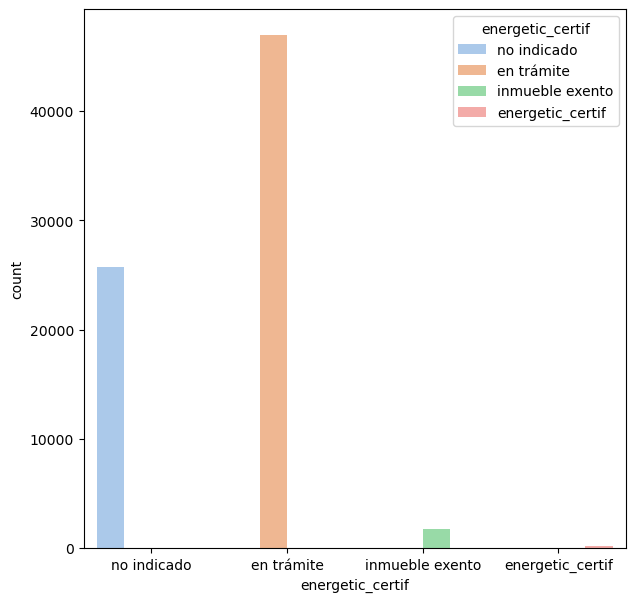

In [12]:
# energetic_certif lo visualizo
plt.figure(figsize=(7,7))
sns.countplot(data=DF, x =DF['energetic_certif'],palette="pastel", hue= 'energetic_certif', linewidth=10)

In [13]:
# energetic_certif lo rellenamos con la moda tambien

energetic_certif = DF['energetic_certif'].mode()[0]
DF['energetic_certif'] = DF['energetic_certif'].fillna(energetic_certif)

In [14]:

# Cuenta el % de nulos de cada columna
missing_percentages = []
for i in DF.columns:
    # Cuenta el número de filas con valores nulos
    n_miss = DF[i].isnull().sum()
    perc = n_miss / DF.shape[0] * 100
    missing_percentages.append((i, n_miss, perc))

# Ordena la lista de porcentajes de mayor a menor
sorted_percentages = sorted(missing_percentages, key=lambda x: x[2], reverse=True)

# Imprime los resultados ordenados
for item in sorted_percentages:
    print('> %s, Missing: %d (%.1f%%)' % (item[0], item[1], item[2]))


> floor, Missing: 20307 (20.3%)
> condition, Missing: 13941 (13.9%)
> loc_district, Missing: 13747 (13.7%)
> ad_description, Missing: 4574 (4.6%)
> ad_last_update, Missing: 0 (0.0%)
> air_conditioner, Missing: 0 (0.0%)
> balcony, Missing: 0 (0.0%)
> bath_num, Missing: 0 (0.0%)
> built_in_wardrobe, Missing: 0 (0.0%)
> chimney, Missing: 0 (0.0%)
> energetic_certif, Missing: 0 (0.0%)
> garden, Missing: 0 (0.0%)
> house_type, Missing: 0 (0.0%)
> lift, Missing: 0 (0.0%)
> loc_city, Missing: 0 (0.0%)
> loc_full, Missing: 0 (0.0%)
> loc_zone, Missing: 0 (0.0%)
> m2_real, Missing: 0 (0.0%)
> price, Missing: 0 (0.0%)
> reduced_mobility, Missing: 0 (0.0%)
> room_num, Missing: 0 (0.0%)
> storage_room, Missing: 0 (0.0%)
> swimming_pool, Missing: 0 (0.0%)
> terrace, Missing: 0 (0.0%)


In [15]:
# Condicion

In [16]:
count_condition = DF['condition'].value_counts()
print(count_condition)

segunda mano/buen estado      72272
segunda mano/para reformar    11045
promoción de obra nueva        2559
condition                       183
Name: condition, dtype: int64


In [17]:
# Buscamos en la descripcion por las palabras 'nueva', 'nuevo','Nuevo','Nueva', 'estrenar' para
# intentar deshacernos de algunos nulos en esta 

def replace_condition(row):
    ad_description = row['ad_description']
    condition = row['condition']
    
    if pd.isnull(condition) and pd.notnull(ad_description):
        ad_description = str(ad_description)
        if any(word in ad_description.lower() for word in ['nueva', 'nuevo','Nuevo','Nueva', 'estrenar']):
            return 'promoción de obra nueva'
    
    return condition if pd.notnull(condition) else None

DF['condition'] = DF.apply(replace_condition, axis=1)


In [18]:
count_condition = DF['condition'].value_counts()
print(count_condition)

segunda mano/buen estado      72272
segunda mano/para reformar    11045
promoción de obra nueva        4672
condition                       183
Name: condition, dtype: int64


In [19]:
# Rellenamos los valores nulos de las siguientes variables con la moda considerando que podrian ser relevantes en el modelo.
condition = DF['condition'].mode()[0]
DF['condition'] = DF['condition'].fillna(condition)

In [20]:
# Cuenta el % de nulos de cada columna
missing_percentages = []
for i in DF.columns:
    # Cuenta el número de filas con valores nulos
    n_miss = DF[i].isnull().sum()
    perc = n_miss / DF.shape[0] * 100
    missing_percentages.append((i, n_miss, perc))

# Ordena la lista de porcentajes de mayor a menor
sorted_percentages = sorted(missing_percentages, key=lambda x: x[2], reverse=True)

# Imprime los resultados ordenados
for item in sorted_percentages:
    print('> %s, Missing: %d (%.1f%%)' % (item[0], item[1], item[2]))


> floor, Missing: 20307 (20.3%)
> loc_district, Missing: 13747 (13.7%)
> ad_description, Missing: 4574 (4.6%)
> ad_last_update, Missing: 0 (0.0%)
> air_conditioner, Missing: 0 (0.0%)
> balcony, Missing: 0 (0.0%)
> bath_num, Missing: 0 (0.0%)
> built_in_wardrobe, Missing: 0 (0.0%)
> chimney, Missing: 0 (0.0%)
> condition, Missing: 0 (0.0%)
> energetic_certif, Missing: 0 (0.0%)
> garden, Missing: 0 (0.0%)
> house_type, Missing: 0 (0.0%)
> lift, Missing: 0 (0.0%)
> loc_city, Missing: 0 (0.0%)
> loc_full, Missing: 0 (0.0%)
> loc_zone, Missing: 0 (0.0%)
> m2_real, Missing: 0 (0.0%)
> price, Missing: 0 (0.0%)
> reduced_mobility, Missing: 0 (0.0%)
> room_num, Missing: 0 (0.0%)
> storage_room, Missing: 0 (0.0%)
> swimming_pool, Missing: 0 (0.0%)
> terrace, Missing: 0 (0.0%)


In [21]:
# floor 

# Cuento valores no nulos de la varaible floor
count_floor = DF['floor'].value_counts(dropna=False)

# Print
print(count_floor.head(60))


NaN                     20307
planta 1ª exterior      11391
2 plantas               10629
planta 2ª exterior       9808
planta 3ª exterior       8144
3 plantas                5273
planta 4ª exterior       5193
bajo exterior            4643
1 planta                 3968
planta 5ª exterior       3057
planta 1ª                2295
planta 2ª                1841
planta 6ª exterior       1510
planta 3ª                1507
4 plantas                1164
exterior                 1108
bajo                      970
planta 4ª                 886
planta 7ª exterior        811
planta 1ª interior        525
planta 5ª                 513
planta 8ª exterior        453
entreplanta exterior      421
planta 2ª interior        406
planta 3ª interior        376
bajo interior             317
planta 9ª exterior        292
planta 4ª interior        263
planta 6ª                 239
planta 5ª interior        204
planta 10ª exterior       194
floor                     183
interior                  142
planta 7ª 

In [22]:
# Dentro de los nulos de floor veo el house_type
house_type_null_floor = DF.loc[DF['floor'].isnull(), 'house_type']
print(house_type_null_floor.head(50))


7                        Casa rural
11                   Chalet adosado
14      Casa o chalet independiente
15                   Casa de pueblo
17                    Casa o chalet
18                    Casa o chalet
39                    Casa o chalet
40                    Casa o chalet
51      Casa o chalet independiente
55      Casa o chalet independiente
61                       Casa rural
64                          Caserón
66      Casa o chalet independiente
70                             Piso
72                    Casa o chalet
79      Casa o chalet independiente
81      Casa o chalet independiente
84                    Casa o chalet
88      Casa o chalet independiente
90                   Chalet adosado
91      Casa o chalet independiente
94                             Piso
96      Casa o chalet independiente
99                    Casa o chalet
100                   Casa o chalet
112     Casa o chalet independiente
125                   Casa o chalet
129     Casa o chalet indepe

In [23]:
# Visualizamos los tipos de viviendas los tipos 
unique_house_type_null_floor = house_type_null_floor.unique()
print(unique_house_type_null_floor)


[' Casa rural' ' Chalet adosado' ' Casa o chalet independiente'
 ' Casa de pueblo' ' Casa o chalet' ' Caserón' 'Piso' ' Chalet pareado'
 ' Finca rústica' ' Palacio' 'Casa rural' 'Alquiler de Chalet adosado'
 'Alquiler de Piso' 'Alquiler de Casa o chalet independiente'
 'Alquiler de Casa o chalet' ' Cortijo' 'Dúplex' ' Casa terrera' 'Ático'
 ' Masía' 'Estudio' ' Castillo' ' Torre' 'Alquiler de Casa rural'
 'Alquiler de Chalet pareado' 'Alquiler de Casa de pueblo']


In [24]:
# Hago el count
# se puede ver que hay 20307 valores nulos 
#se sospecha que hay valores que significan el numero de plantas y no el numero piso 
# Se investiga sobre los nulos se chequea el type de todos los nulos 

count_house_type_null_floor = house_type_null_floor.value_counts()
print(count_house_type_null_floor)

# Despues se chequeara el resto de los pisos pero se puede obveservar que dentro de los nulos hay algunos pisos
# la gran mayoria han sido de casas pero  hay 4311 hay pisos.

 Casa o chalet                             6009
 Casa o chalet independiente               4344
Piso                                       4311
 Chalet adosado                            2162
 Finca rústica                              986
 Casa de pueblo                             750
 Chalet pareado                             659
Casa rural                                  456
 Casa rural                                 179
Ático                                       133
Dúplex                                       89
Estudio                                      35
 Masía                                       35
Alquiler de Piso                             32
 Caserón                                     26
 Casa terrera                                25
Alquiler de Casa o chalet independiente      15
Alquiler de Casa o chalet                    15
Alquiler de Chalet adosado                   15
 Cortijo                                     10
Alquiler de Casa rural                  

In [25]:
#Defino plantas

plantas = ['1 planta', '2 plantas', '3 plantas', '4 plantas', '5 plantas']

#Se crea una funcion para identificar los valores de 'floor' a 'Plantas'
def mapear_plantas(valor):
    if valor in plantas:
        return valor

# se aplica la función a la columna 'floor' y crear la nueva columna 'Plantas'
DF['Plantas'] = DF['floor'].apply(mapear_plantas)

#Se muestra el DataFrame actualizado
print(DF.head())



                                      ad_description  \
0  Precio chalet individual en la localidad de Ab...   
1  Atico de 80m2, para entrar a vivir, con salón ...   
2  B/ Etxaguen. Casa de reciente construcción con...   
3  Se vende vivienda en abornikano (ayuntamiento ...   
4                                       Negociables.   

                       ad_last_update air_conditioner balcony bath_num  \
0  Anuncio actualizado el 27 de marzo               0       0        2   
1       más de 5 meses sin actualizar               0       0        2   
2       más de 5 meses sin actualizar               0       0        3   
3       más de 5 meses sin actualizar               0       1        1   
4       más de 5 meses sin actualizar               0       0        1   

  built_in_wardrobe chimney                 condition energetic_certif  \
0                 0       0  segunda mano/buen estado       en trámite   
1                 0       0  segunda mano/buen estado      no indicado

In [26]:
count_plantas = DF['Plantas'].value_counts(dropna=False)

# Print the counts
print(count_plantas.head(60))

None         78921
2 plantas    10629
3 plantas     5273
1 planta      3968
4 plantas     1164
5 plantas       45
Name: Plantas, dtype: int64


In [27]:
# veo que plantas sigue en floor
count_floor = DF['floor'].value_counts(dropna=False)

# Print the counts
print(count_floor.head(60))

NaN                     20307
planta 1ª exterior      11391
2 plantas               10629
planta 2ª exterior       9808
planta 3ª exterior       8144
3 plantas                5273
planta 4ª exterior       5193
bajo exterior            4643
1 planta                 3968
planta 5ª exterior       3057
planta 1ª                2295
planta 2ª                1841
planta 6ª exterior       1510
planta 3ª                1507
4 plantas                1164
exterior                 1108
bajo                      970
planta 4ª                 886
planta 7ª exterior        811
planta 1ª interior        525
planta 5ª                 513
planta 8ª exterior        453
entreplanta exterior      421
planta 2ª interior        406
planta 3ª interior        376
bajo interior             317
planta 9ª exterior        292
planta 4ª interior        263
planta 6ª                 239
planta 5ª interior        204
planta 10ª exterior       194
floor                     183
interior                  142
planta 7ª 

In [28]:
# convierto en 0 los valores que esten plantas
DF['floor'] = DF['floor'].apply(lambda x: x if x not in plantas else 0)

In [29]:
count_floor = DF['floor'].value_counts(dropna=False)

# Print the counts
print(count_floor.head(60))

0                       21079
NaN                     20307
planta 1ª exterior      11391
planta 2ª exterior       9808
planta 3ª exterior       8144
planta 4ª exterior       5193
bajo exterior            4643
planta 5ª exterior       3057
planta 1ª                2295
planta 2ª                1841
planta 6ª exterior       1510
planta 3ª                1507
exterior                 1108
bajo                      970
planta 4ª                 886
planta 7ª exterior        811
planta 1ª interior        525
planta 5ª                 513
planta 8ª exterior        453
entreplanta exterior      421
planta 2ª interior        406
planta 3ª interior        376
bajo interior             317
planta 9ª exterior        292
planta 4ª interior        263
planta 6ª                 239
planta 5ª interior        204
planta 10ª exterior       194
floor                     183
interior                  142
planta 7ª                 127
planta 6ª interior        116
planta 11ª exterior       101
planta 8ª 

In [30]:
DF

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,energetic_certif,floor,...,loc_full,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,Plantas
0,Precio chalet individual en la localidad de Ab...,Anuncio actualizado el 27 de marzo,0,0,2,0,0,segunda mano/buen estado,en trámite,0,...,"La iglesia , Urcabustaiz , Zuya, Álava","Zuya, Álava",1000,310000,0,4,0,0,1,2 plantas
1,"Atico de 80m2, para entrar a vivir, con salón ...",más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,no indicado,planta 2ª exterior,...,"la Union Plazatxoa, 8 , Legutiano , Zuya, Álava","Zuya, Álava",86,139000,1,3,1,0,0,None
2,B/ Etxaguen. Casa de reciente construcción con...,más de 5 meses sin actualizar,0,0,3,0,0,segunda mano/buen estado,no indicado,0,...,"Calle Etxaguen s/n , Aramaio , Zuya, Álava","Zuya, Álava",3000,480000,0,4,1,0,1,3 plantas
3,Se vende vivienda en abornikano (ayuntamiento ...,más de 5 meses sin actualizar,0,1,1,1,1,segunda mano/buen estado,en trámite,0,...,"CP 01449, 1449 CP , Urcabustaiz , Zuya, Álava","Zuya, Álava",86,150000,0,4,1,0,1,3 plantas
4,Negociables.,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,no indicado,planta 1ª exterior,...,"Calle Nueva Plaza, 9 , Urcabustaiz , Zuya, Ál...","Zuya, Álava",76,90000,0,2,1,1,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,casa de pueblo con patio.,Anuncio actualizado el 29 de enero,0,0,1,0,0,segunda mano/para reformar,no indicado,NaN,...,"Calle Toro, 5 , Villardondiego , Alfoz de Tor...","Alfoz de Toro, Zamora",300,20000,0,3,0,0,0,None
99996,"Superf. 2299 m², 1090 m² solar, 10 habitacione...",Anuncio actualizado el 27 de septiembre,0,0,2,0,0,segunda mano/buen estado,no indicado,NaN,...,", Villavendimio , Alfoz de Toro, Zamora","Alfoz de Toro, Zamora",460,119000,0,10,0,0,0,None
99997,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,energetic_certif,floor,...,loc_full,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,None
99998,Inmueble de 89 m² ubicado en ZAMORA (Zamora).,Anuncio actualizado el 10 de abril,0,0,2,0,0,segunda mano/buen estado,no indicado,NaN,...,", Distrito La Candelaria , Zamora , Área de Z...","Área de Zamora, Zamora",89,38050,0,3,0,0,0,None


In [31]:
#hago un filtro en la varaibles nulas de floor y chequeo en la descripcion si contiene la palabra 'casa' 

mask = DF['floor'].isnull() & DF['ad_description'].str.contains('casa', case=False)
descripcion_casa = DF[mask]

In [32]:
descripcion_casa

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,energetic_certif,floor,...,loc_full,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,Plantas
64,Rarisima oportunidad de casa para reformar en ...,Anuncio actualizado el 18 de marzo,0,0,1,0,0,segunda mano/para reformar,no indicado,NaN,...,"Calle Orobide, 7 , Zuya , Álava",Álava,3600,250000,0,4,0,0,0,None
84,"Casa adosada en piedra, distribuida en tres pl...",Anuncio actualizado el 31 de enero,0,0,1,0,0,segunda mano/buen estado,en trámite,NaN,...,"urbina entitatea , Legutiano , Zuya, Álava","Zuya, Álava",210,138000,0,1,0,0,0,None
100,Impresionante chalet individual con 3 dormitor...,Anuncio actualizado el 21 de febrero,0,0,2,0,0,segunda mano/buen estado,en trámite,NaN,...,", Arrazua-Ubarrundia , Zuya, Álava","Zuya, Álava",265,895000,0,3,0,1,1,None
148,Casa unifamiliar de 3 plantas que dispone de s...,Anuncio actualizado el 23 de noviembre,0,0,3,0,0,segunda mano/para reformar,en trámite,NaN,...,"Calle Igaperra , Zigoitia , Zuya, Álava","Zuya, Álava",190,244800,0,4,1,0,1,None
150,"En el pueblo de Sarria, ubicado a los pies del...",Anuncio actualizado el 27 de marzo,0,0,2,0,0,segunda mano/buen estado,en trámite,NaN,...,", Zuya , Álava",Álava,300,425000,0,4,0,0,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99928,"Sabemos que buscas una vivienda cómoda, funcio...",Anuncio actualizado el 26 de febrero,0,0,3,1,0,segunda mano/buen estado,en trámite,NaN,...,"Calle del Dornajo, 14 , Distrito Barrio Pinil...","Área de Zamora, Zamora",170,199000,0,4,0,0,1,None
99992,Sanabria Chalet con amplio Jardin adosado a la...,Anuncio actualizado el 17 de marzo,0,0,2,1,0,segunda mano/buen estado,no indicado,NaN,...,"Calle Puente, 3 , Galende , Sanabria, Zamora","Sanabria, Zamora",130,75000,0,4,0,0,1,None
99993,Casa en Villar de Fallaves zona VILLANUEVA DEL...,Anuncio actualizado el 27 de septiembre,0,0,2,0,0,promoción de obra nueva,no indicado,NaN,...,", Villardefallaves , Tierra de Campos, Zamora","Tierra de Campos, Zamora",150,42000,0,2,0,0,0,None
99995,casa de pueblo con patio.,Anuncio actualizado el 29 de enero,0,0,1,0,0,segunda mano/para reformar,no indicado,NaN,...,"Calle Toro, 5 , Villardondiego , Alfoz de Tor...","Alfoz de Toro, Zamora",300,20000,0,3,0,0,0,None


In [33]:
print(count_floor.head(60))


0                       21079
NaN                     20307
planta 1ª exterior      11391
planta 2ª exterior       9808
planta 3ª exterior       8144
planta 4ª exterior       5193
bajo exterior            4643
planta 5ª exterior       3057
planta 1ª                2295
planta 2ª                1841
planta 6ª exterior       1510
planta 3ª                1507
exterior                 1108
bajo                      970
planta 4ª                 886
planta 7ª exterior        811
planta 1ª interior        525
planta 5ª                 513
planta 8ª exterior        453
entreplanta exterior      421
planta 2ª interior        406
planta 3ª interior        376
bajo interior             317
planta 9ª exterior        292
planta 4ª interior        263
planta 6ª                 239
planta 5ª interior        204
planta 10ª exterior       194
floor                     183
interior                  142
planta 7ª                 127
planta 6ª interior        116
planta 11ª exterior       101
planta 8ª 

In [34]:
# en este filtro en la variable planta subsituyo por la moda y en la variable floor sustituyo por 0
moda_planta = DF['Plantas'].mode()[0]
moda_planta


'2 plantas'

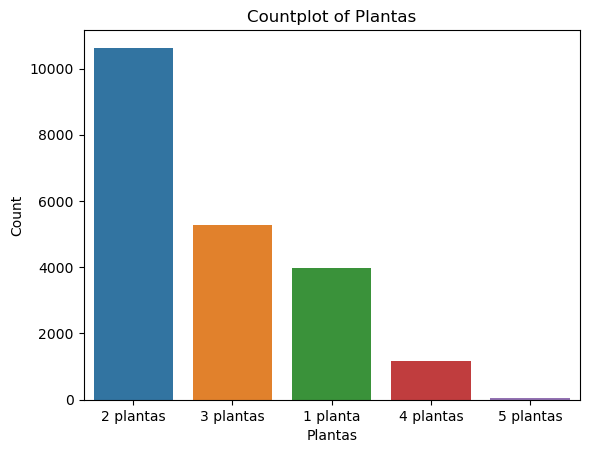

In [35]:
# Visualizo la moda

sns.countplot(data=DF, x='Plantas')
plt.xlabel('Plantas')
plt.ylabel('Count')
plt.title('Countplot of Plantas')
plt.show()


In [36]:
count_plantas = DF['Plantas'].value_counts(dropna=False)

# Print the counts
print(count_plantas.head(60))

None         78921
2 plantas    10629
3 plantas     5273
1 planta      3968
4 plantas     1164
5 plantas       45
Name: Plantas, dtype: int64


In [37]:
# en el filtro las variables plantas les sustituyo 
# por la moda
DF.loc[mask, 'Plantas'] = moda_planta


In [38]:
count_plantas = DF['Plantas'].value_counts(dropna=False)

# Print the counts
print(count_plantas.head(60))

None         69745
2 plantas    19805
3 plantas     5273
1 planta      3968
4 plantas     1164
5 plantas       45
Name: Plantas, dtype: int64


In [39]:
DF['Plantas']

0        2 plantas
1             None
2        3 plantas
3        3 plantas
4             None
           ...    
99995    2 plantas
99996    2 plantas
99997         None
99998         None
99999         None
Name: Plantas, Length: 100000, dtype: object

In [40]:
# los nulos en la variable Plantas las sustituyo por 0
DF['Plantas'].fillna(0, inplace=True)

In [41]:
DF['Plantas']

0        2 plantas
1                0
2        3 plantas
3        3 plantas
4                0
           ...    
99995    2 plantas
99996    2 plantas
99997            0
99998            0
99999            0
Name: Plantas, Length: 100000, dtype: object

In [42]:
# a la variable floor en ese filtro le pongo 0

DF.loc[mask, 'floor'] = 0

In [43]:
DF['floor']

0                         0
1        planta 2ª exterior
2                         0
3                         0
4        planta 1ª exterior
                ...        
99995                     0
99996                     0
99997                 floor
99998                   NaN
99999             planta 3ª
Name: floor, Length: 100000, dtype: object

In [44]:
# Print the counts
print(count_floor.head(60))

0                       21079
NaN                     20307
planta 1ª exterior      11391
planta 2ª exterior       9808
planta 3ª exterior       8144
planta 4ª exterior       5193
bajo exterior            4643
planta 5ª exterior       3057
planta 1ª                2295
planta 2ª                1841
planta 6ª exterior       1510
planta 3ª                1507
exterior                 1108
bajo                      970
planta 4ª                 886
planta 7ª exterior        811
planta 1ª interior        525
planta 5ª                 513
planta 8ª exterior        453
entreplanta exterior      421
planta 2ª interior        406
planta 3ª interior        376
bajo interior             317
planta 9ª exterior        292
planta 4ª interior        263
planta 6ª                 239
planta 5ª interior        204
planta 10ª exterior       194
floor                     183
interior                  142
planta 7ª                 127
planta 6ª interior        116
planta 11ª exterior       101
planta 8ª 

In [45]:
# a los datos nulos los sustituyo por el valor mas repetido 
#
DF['floor'].fillna('planta 1ª exterior', inplace=True)

In [46]:
# Cuenta el % de nulos de cada columna
missing_percentages = []
for i in DF.columns:
    # Cuenta el número de filas con valores nulos
    n_miss = DF[i].isnull().sum()
    perc = n_miss / DF.shape[0] * 100
    missing_percentages.append((i, n_miss, perc))

# Ordena la lista de porcentajes de mayor a menor
sorted_percentages = sorted(missing_percentages, key=lambda x: x[2], reverse=True)

# Imprime los resultados ordenados
for item in sorted_percentages:
    print('> %s, Missing: %d (%.1f%%)' % (item[0], item[1], item[2]))


> loc_district, Missing: 13747 (13.7%)
> ad_description, Missing: 4574 (4.6%)
> ad_last_update, Missing: 0 (0.0%)
> air_conditioner, Missing: 0 (0.0%)
> balcony, Missing: 0 (0.0%)
> bath_num, Missing: 0 (0.0%)
> built_in_wardrobe, Missing: 0 (0.0%)
> chimney, Missing: 0 (0.0%)
> condition, Missing: 0 (0.0%)
> energetic_certif, Missing: 0 (0.0%)
> floor, Missing: 0 (0.0%)
> garden, Missing: 0 (0.0%)
> house_type, Missing: 0 (0.0%)
> lift, Missing: 0 (0.0%)
> loc_city, Missing: 0 (0.0%)
> loc_full, Missing: 0 (0.0%)
> loc_zone, Missing: 0 (0.0%)
> m2_real, Missing: 0 (0.0%)
> price, Missing: 0 (0.0%)
> reduced_mobility, Missing: 0 (0.0%)
> room_num, Missing: 0 (0.0%)
> storage_room, Missing: 0 (0.0%)
> swimming_pool, Missing: 0 (0.0%)
> terrace, Missing: 0 (0.0%)
> Plantas, Missing: 0 (0.0%)


In [47]:
DF[['Plantas', 'floor']]

,Plantas,floor
0,2 plantas,0
1,0,planta 2ª exterior
2,3 plantas,0
3,3 plantas,0
4,0,planta 1ª exterior
...,...,...
99995,2 plantas,0
99996,2 plantas,0
99997,0,floor
99998,0,planta 1ª exterior


In [48]:

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ad_description     95426 non-null   object
 1   ad_last_update     100000 non-null  object
 2   air_conditioner    100000 non-null  object
 3   balcony            100000 non-null  object
 4   bath_num           100000 non-null  object
 5   built_in_wardrobe  100000 non-null  object
 6   chimney            100000 non-null  object
 7   condition          100000 non-null  object
 8   energetic_certif   100000 non-null  object
 9   floor              100000 non-null  object
 10  garden             100000 non-null  object
 11  house_type         100000 non-null  object
 12  lift               100000 non-null  object
 13  loc_city           100000 non-null  object
 14  loc_district       86253 non-null   object
 15  loc_full           100000 non-null  object
 16  loc_zone           10

In [49]:
DF.shape 

(100000, 25)

**2-Identificamos y removimos filas duplicadas en nuestro dataframe.**
- **Identifique las filas que contienen datos duplicados**


In [50]:
DF[DF.duplicated()]

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,energetic_certif,floor,...,loc_full,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,Plantas
1166,"Oportunidad, bonita vivienda para entrar a viv...",Anuncio actualizado el 13 de marzo,0,0,2,0,0,segunda mano/buen estado,en trámite,planta 3ª exterior,...,"Calle Arana , Distrito Santiago - El Anglo , ...",Álava,80,165000,1,2,1,0,1,0
4674,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,energetic_certif,floor,...,loc_full,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,0
4834,"Viviendas unifamiliares adosadas, de 2 plantas...",Anuncio actualizado el 27 de marzo,0,0,1,0,0,segunda mano/buen estado,en trámite,planta 1ª exterior,...,"Calle Libertad , Motilleja , La Manchuela, Al...","La Manchuela, Albacete",191,126500,0,1,0,0,0,0
4835,"Viviendas unifamiliares adosadas, de 2 plantas...",Anuncio actualizado el 27 de marzo,0,0,1,0,0,segunda mano/buen estado,en trámite,planta 1ª exterior,...,"Calle Libertad , Motilleja , La Manchuela, Al...","La Manchuela, Albacete",191,126500,0,1,0,0,0,0
4836,"Viviendas unifamiliares adosadas, de 2 plantas...",Anuncio actualizado el 27 de marzo,0,0,1,0,0,segunda mano/buen estado,en trámite,planta 1ª exterior,...,"Calle Libertad , Motilleja , La Manchuela, Al...","La Manchuela, Albacete",148,115500,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98231,"Superf. 51.09 m², útil 43.62 m², 1 habitación ...",Anuncio actualizado el 27 de septiembre,0,0,1,1,0,segunda mano/buen estado,no indicado,planta 3ª exterior,...,", Distrito La Candelaria , Zamora , Área de Z...","Área de Zamora, Zamora",59,170262,0,1,1,0,0,0
98232,"Superf. 51.09 m², útil 43.62 m², 1 habitación ...",Anuncio actualizado el 27 de septiembre,0,0,1,1,0,segunda mano/buen estado,no indicado,planta 1ª exterior,...,", Distrito La Candelaria , Zamora , Área de Z...","Área de Zamora, Zamora",59,165303,0,1,1,0,0,0
99650,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,energetic_certif,floor,...,loc_full,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,0
99660,Pegando a eroski.,Anuncio actualizado el 10 de abril,0,1,2,1,0,segunda mano/buen estado,no indicado,planta 5ª,...,"Calle Consejo de Europa , Distrito Hiniesta -...","Área de Zamora, Zamora",78,120000,0,3,1,0,1,0


In [51]:
DF = DF.drop_duplicates()

In [52]:
DF[DF.duplicated()]

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,energetic_certif,floor,...,loc_full,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,Plantas


**3-Valores unicos :
Verificamos con la funcion *unique* si existen mas de un valor en la base de datos .**

In [53]:
#Verificamos columnas con valores unicos**

DF.nunique()

#Se observa que en todas las columnas existe mas de 1 valor, las cuales estaremos analizando mas adelante. No se procede a
# eliminar ninguna columna con este criterio de valor unico.

ad_description       86150
ad_last_update         369
air_conditioner          5
balcony                  5
bath_num                30
built_in_wardrobe        5
chimney                  5
condition                4
energetic_certif         4
floor                   83
garden                   5
house_type              32
lift                     5
loc_city              1139
loc_district         23068
loc_full             49369
loc_zone                95
m2_real               4507
price                 7045
reduced_mobility         5
room_num                36
storage_room             5
swimming_pool            5
terrace                  5
Plantas                  6
dtype: int64

 **4 - Visualizamos y arreglamos el Datatype de algunas de nuestras variables.**
- **Fixing a data type**

In [54]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94499 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ad_description     90117 non-null  object
 1   ad_last_update     94499 non-null  object
 2   air_conditioner    94499 non-null  object
 3   balcony            94499 non-null  object
 4   bath_num           94499 non-null  object
 5   built_in_wardrobe  94499 non-null  object
 6   chimney            94499 non-null  object
 7   condition          94499 non-null  object
 8   energetic_certif   94499 non-null  object
 9   floor              94499 non-null  object
 10  garden             94499 non-null  object
 11  house_type         94499 non-null  object
 12  lift               94499 non-null  object
 13  loc_city           94499 non-null  object
 14  loc_district       82108 non-null  object
 15  loc_full           94499 non-null  object
 16  loc_zone           94499 non-null  objec

**Transformacion de variables a numericas para mejor analisis**

Se puede observar que los datos fueron importados todos como tipo object, por lo que es necesario transformar los valores que correspondan a un formato mas adecuado para continuar el analisis.

Identificamos que las siguientes variables deben estar como valores numericos.

- bath_num:	The number of bathrooms in the house. (Integer)
- m2:	The size of the house in square meters. (Integer)
- m2_useful:	The size of the house in square meters. (Integer)
- price:	The price of the house. (Integer)
- room_num:	The number of rooms in the house. (Integer)

**Empezamos con las variables discretas : bath_num y  room_num**

- Primero transformamos con la variable 'bath_num' verificando inicialmente la cantidad por cada tipo de valor que posee.



In [55]:
DF['bath_num'].value_counts()

2            38460
1            35546
3            12276
4             4625
5             1679
6              708
sin baños      635
7              256
8              115
9               60
10              43
11              23
13              17
12              15
15              10
14              10
20               4
18               3
17               2
16               2
30               1
32               1
58               1
bath_num         1
23               1
19               1
84               1
38               1
34               1
75               1
Name: bath_num, dtype: int64

In [56]:
DF.loc[DF['bath_num'] == 'bath_num'] #buscamos en que fila se encuentra el valor 'bath_num' para identificar el motivo.

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,energetic_certif,floor,...,loc_full,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,Plantas
4248,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,energetic_certif,floor,...,loc_full,loc_zone,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,0


In [57]:
DF = DF.drop([4248])

In [58]:
#una vez eliminada toda la fila por contener el titulo de las columnas realizamos la transformacion de variables a numeros
DF['bath_num']= DF['bath_num'].replace('sin baños', 0)

In [59]:
#Convertimos los valores al tipo int
DF['bath_num']= pd.to_numeric(DF['bath_num'])

In [60]:
try:
    pd.to_numeric(DF['bath_num'])
    print("Todos los valores en la variable bath_num son numéricos.")
except ValueError:
    print("No todos los valores son numéricos.")

Todos los valores en la variable bath_num son numéricos.


In [61]:
#Luego de bath_num, transformamos la variable 'room_num' verificando la cantidad por cada tipo de valor que posee.

In [62]:
DF['room_num'].value_counts()

3                 36998
2                 20229
4                 17940
5                  7323
1                  5682
6                  2746
sin habitación     1213
7                  1051
8                   618
9                   259
10                  186
12                   73
11                   50
14                   30
15                   28
13                   17
18                   10
16                   10
20                    7
17                    7
30                    3
32                    3
35                    2
22                    2
36                    1
84                    1
65                    1
24                    1
23                    1
25                    1
34                    1
26                    1
56                    1
58                    1
73                    1
Name: room_num, dtype: int64

In [63]:
DF['room_num']= DF['room_num'].replace('sin habitación', 0)

In [64]:
#Convertimos los valores al tipo int
DF['room_num']= pd.to_numeric(DF['room_num'])

In [65]:
try:
    pd.to_numeric(DF['room_num'])
    print("Todos los valores en la variable room_num son numéricos.")
except ValueError:
    print("No todos los valores son numéricos.")

Todos los valores en la variable room_num son numéricos.


In [66]:
#Todos los valores en la variable room_num son numéricos.

Trabajamos con la Variables numericas continuas

A continuacion transformamos las siguietes variables a numericas:

m2_real
price

In [67]:
#Convertimos los datos numericos que se encuentran como type 'object' a type 'int'
DF['m2_real']= pd.to_numeric(DF['m2_real'])
DF['price']= pd.to_numeric(DF['price'])

**Trabajamos con la Variables dicotomicas**

A continuacion iniciamos la visualizacion de nuestra varaibles dicotomicas:
    
- air_conditioner
- balcony
- built_in_wardrobe
- chimney
- garden
- lift
- reduced_mobility
- storage_room
- swimming_pool
- terrace

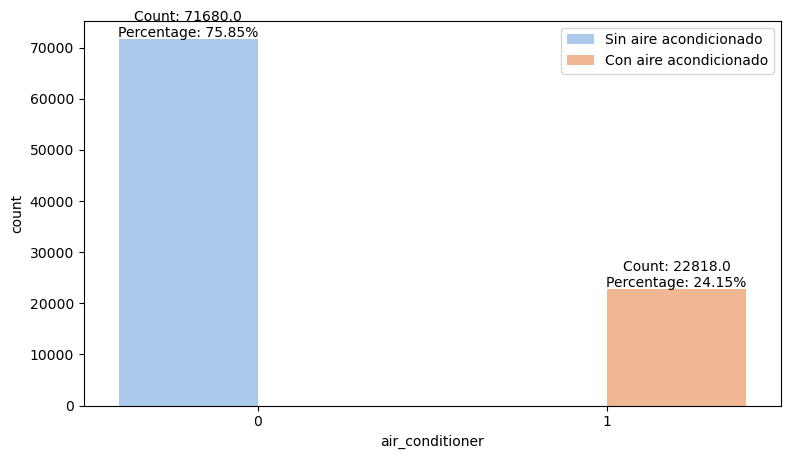

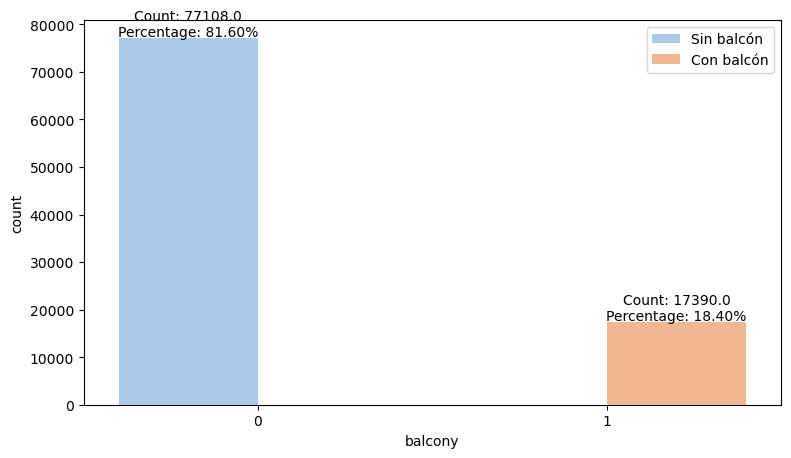

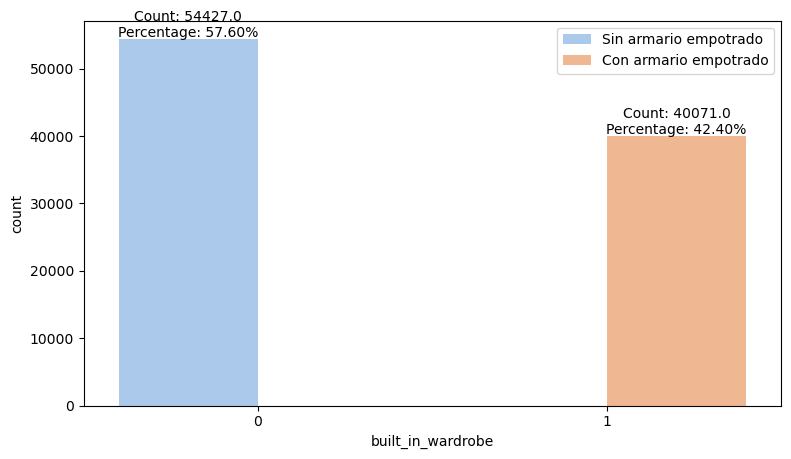

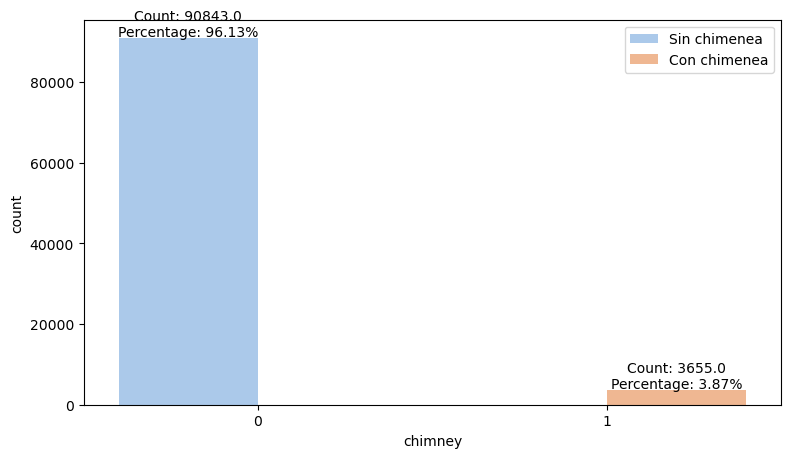

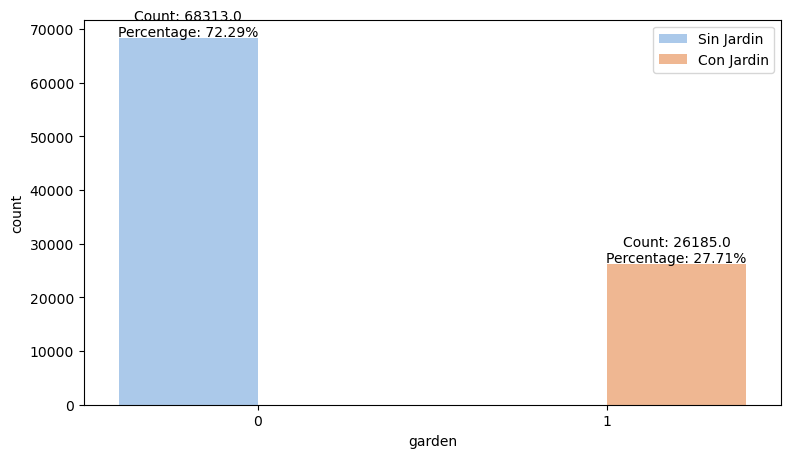

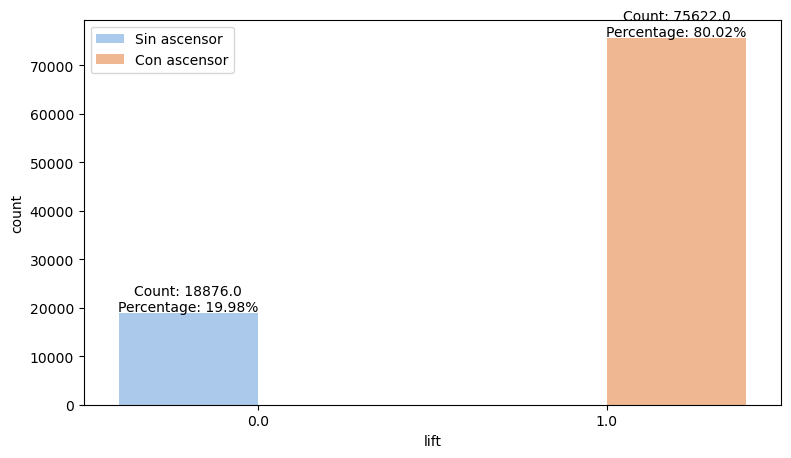

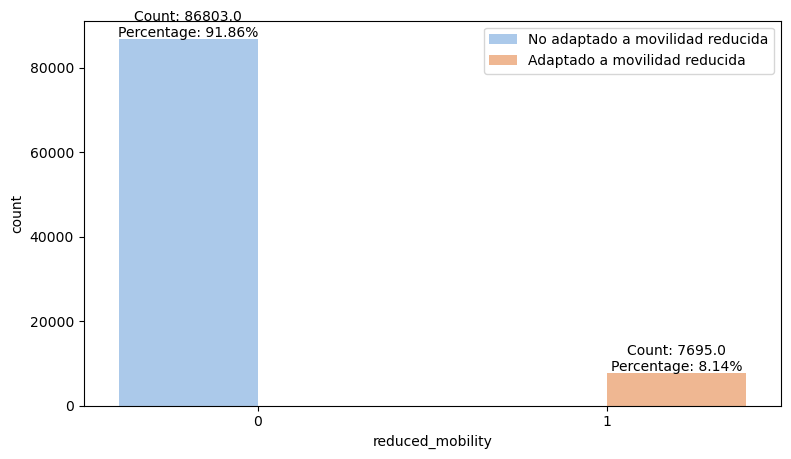

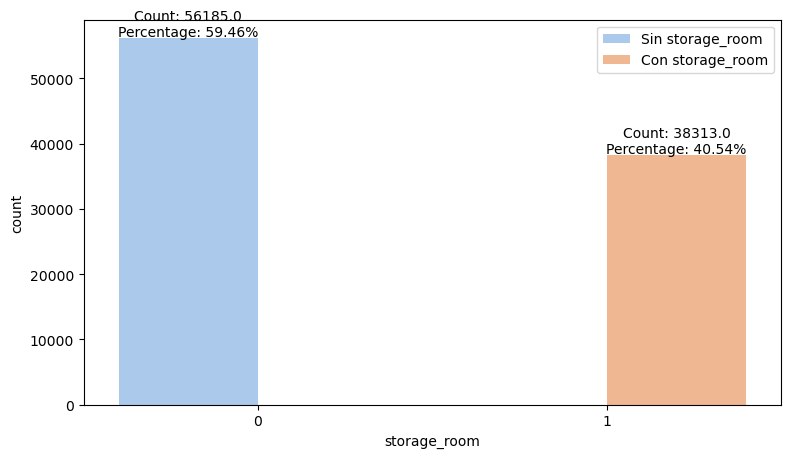

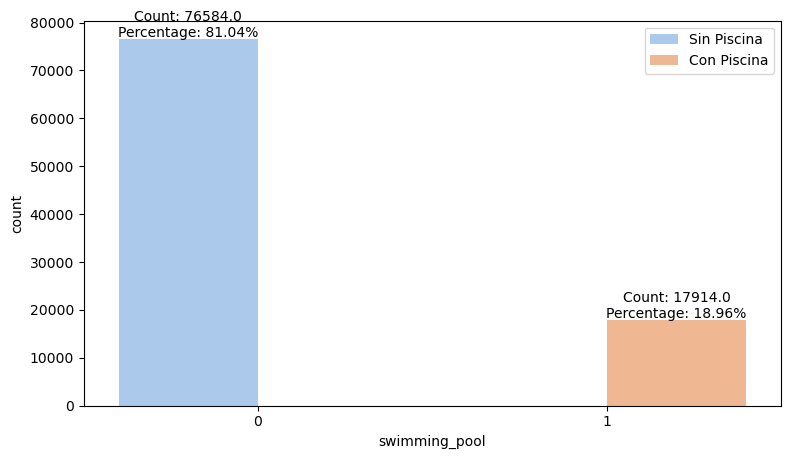

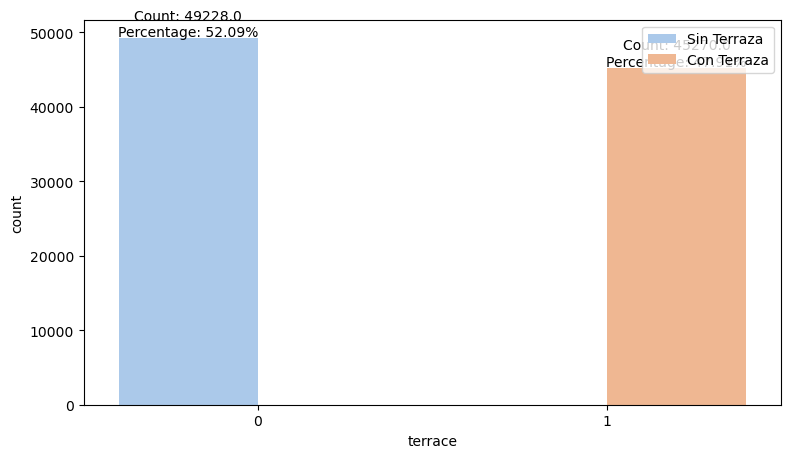

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para agregar etiquetas en el gráfico
def add_labels(ax, column):
    total_count = len(DF[column])
    for p in ax.patches:
        percentage = f'{p.get_height() / total_count * 100:.2f}%'
        ax.annotate(f'Count: {p.get_height()}\nPercentage: {percentage}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Convertir las columnas a numéricas si es necesario
DF['air_conditioner'] = pd.to_numeric(DF['air_conditioner'])
DF['balcony'] = pd.to_numeric(DF['balcony'])
DF['built_in_wardrobe'] = pd.to_numeric(DF['built_in_wardrobe'])
DF['chimney'] = pd.to_numeric(DF['chimney'])
DF['garden'] = pd.to_numeric(DF['garden'])
DF['lift'] = pd.to_numeric(DF['lift'])
DF['reduced_mobility'] = pd.to_numeric(DF['reduced_mobility'])
DF['storage_room'] = pd.to_numeric(DF['storage_room'])
DF['swimming_pool'] = pd.to_numeric(DF['swimming_pool'])
DF['terrace'] = pd.to_numeric(DF['terrace'])

# Crear gráfico de barras para 'air_conditioner'
plt.figure(figsize=(9, 5))
ax1 = sns.countplot(data=DF, x='air_conditioner', palette='pastel', hue='air_conditioner')
add_labels(ax1, 'air_conditioner')
plt.legend(labels=['Sin aire acondicionado', 'Con aire acondicionado'])

# Crear gráfico de barras para 'balcony'
plt.figure(figsize=(9, 5))
ax2 = sns.countplot(data=DF, x='balcony', palette='pastel', hue='balcony')
add_labels(ax2, 'balcony')
plt.legend(labels=['Sin balcón', 'Con balcón'])


# built_in_wardrobe
plt.figure(figsize=(9,5))
ax1 = sns.countplot(data=DF, x=DF['built_in_wardrobe'],palette="pastel", hue= 'built_in_wardrobe')
add_labels(ax1, 'built_in_wardrobe')
plt.legend(labels = ['Sin armario empotrado', 'Con armario empotrado'])

#chimney
plt.figure(figsize=(9,5))
ax1 = sns.countplot(data=DF, x=DF['chimney'],palette="pastel", hue= 'chimney')
add_labels(ax1, 'chimney')
plt.legend(labels = ['Sin chimenea', 'Con chimenea'])

# garden
plt.figure(figsize=(9,5))
ax1 = sns.countplot(data=DF, x=DF['garden'],palette="pastel", hue= 'garden')
add_labels(ax1, 'garden')
plt.legend(labels = ['Sin Jardin', 'Con Jardin'])

# lift
plt.figure(figsize=(9,5))
ax1 = sns.countplot(data=DF, x=DF['lift'],palette="pastel", hue= 'lift')
add_labels(ax1, 'lift')
plt.legend(labels = ['Sin ascensor', 'Con ascensor'])

# reduced_mobility
plt.figure(figsize=(9,5))
ax1 = sns.countplot(data=DF, x=DF['reduced_mobility'],palette="pastel", hue= 'reduced_mobility')
add_labels(ax1, 'reduced_mobility')
plt.legend(labels = ['No adaptado a movilidad reducida', 'Adaptado a movilidad reducida'])

#storage_room
plt.figure(figsize=(9,5))
ax1 = sns.countplot(data=DF, x=DF['storage_room'],palette="pastel", hue= 'storage_room')
add_labels(ax1, 'storage_room')
plt.legend(labels = ['Sin storage_room', 'Con storage_room'])


# swimming_pool
plt.figure(figsize=(9,5))
ax1 = sns.countplot(data=DF, x=DF['swimming_pool'],palette="pastel", hue= 'swimming_pool')
add_labels(ax1, 'swimming_pool')
plt.legend(labels = ['Sin Piscina', 'Con Piscina'])

# terrace
plt.figure(figsize=(9,5))
ax1 = sns.countplot(data=DF, x=DF['terrace'],palette="pastel", hue= 'terrace')
add_labels(ax1, 'terrace')
plt.legend(labels = ['Sin Terraza', 'Con Terraza'])


# Mostrar los gráficos
plt.show()




In [69]:
# Defino mi variable de respuesta
#**Luego de haber realizado la transformacion de las variables decidimos crear nuestra variable respuesta de 'precio por metro cuadrado'**.
DF["precio_m2"]= DF['price']/DF['m2_real']

In [70]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94498 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_description     90116 non-null  object 
 1   ad_last_update     94498 non-null  object 
 2   air_conditioner    94498 non-null  int64  
 3   balcony            94498 non-null  int64  
 4   bath_num           94498 non-null  int64  
 5   built_in_wardrobe  94498 non-null  int64  
 6   chimney            94498 non-null  int64  
 7   condition          94498 non-null  object 
 8   energetic_certif   94498 non-null  object 
 9   floor              94498 non-null  object 
 10  garden             94498 non-null  int64  
 11  house_type         94498 non-null  object 
 12  lift               94498 non-null  float64
 13  loc_city           94498 non-null  object 
 14  loc_district       82107 non-null  object 
 15  loc_full           94498 non-null  object 
 16  loc_zone           944

**5 - Chequeamos los valores estadisticos de nuestras variables para el manejo y tratamiento  de los outliers.**

#- **Check the statistical values of features**

In [71]:
DF.describe()

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,lift,m2_real,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,precio_m2
count,94498.000000,94498.000000,94498.000000,94498.000000,94498.000000,94498.000000,94498.000000,94498.000000,9.449800e+04,94498.000000,94498.000000,94498.000000,94498.000000,94498.000000,9.449800e+04
mean,0.241465,0.184025,1.964655,0.424041,0.038678,0.277096,0.800250,1760.064086,3.794508e+05,0.081430,3.199719,0.405437,0.189570,0.479058,3.722697e+03
std,0.427974,0.387507,1.229266,0.494199,0.192828,0.447567,0.399815,18682.799975,6.278457e+05,0.273496,1.563794,0.490979,0.391963,0.499564,9.211920e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,3.921569e-03
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,80.000000,1.196000e+05,0.000000,2.000000,0.000000,0.000000,0.000000,7.049919e+02
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,112.000000,2.070000e+05,0.000000,3.000000,0.000000,0.000000,0.000000,1.586957e+03
75%,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,242.000000,3.900000e+05,0.000000,4.000000,1.000000,0.000000,1.000000,2.676768e+03
max,1.000000,1.000000,84.000000,1.000000,1.000000,1.000000,1.000000,900000.000000,2.300000e+07,1.000000,84.000000,1.000000,1.000000,1.000000,9.950000e+06


In [72]:
#- **Check outliers**

In [73]:
#Chequeamos los outliers de las variables numericas: bath_num, room_num, m2_real y precio_m2

<AxesSubplot:xlabel='precio_m2'>

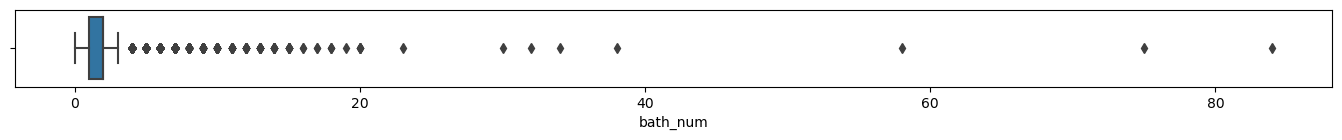

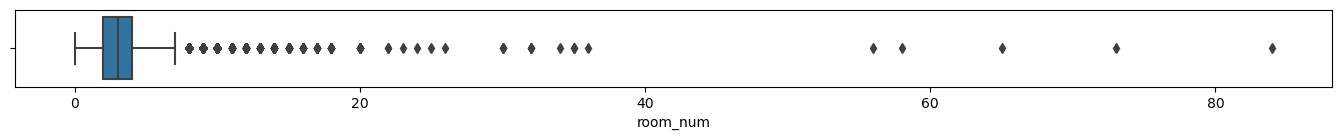

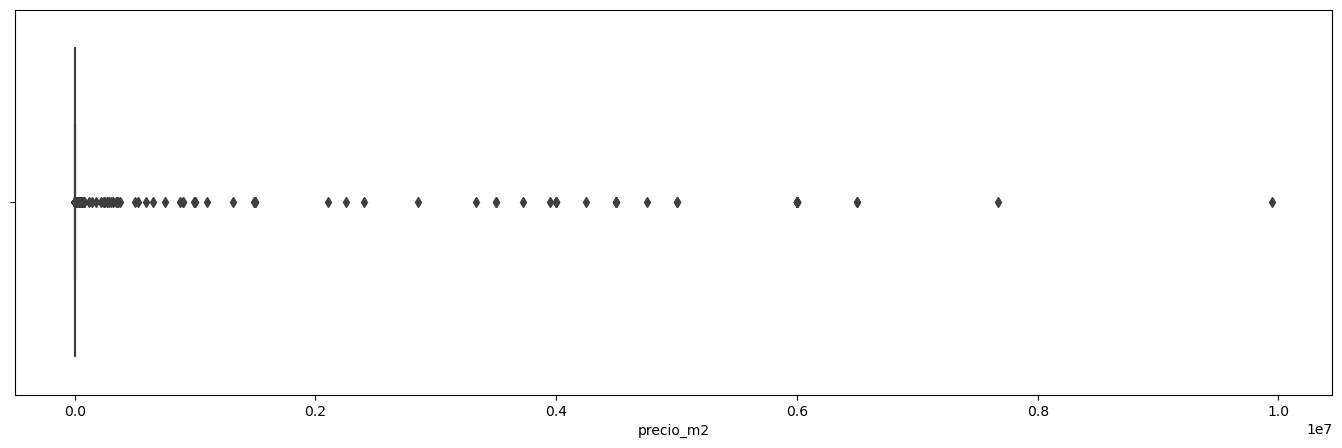

In [74]:
plt.figure(figsize=(17,1)) 
sns.boxplot(data=DF, x=DF['bath_num'])

plt.figure(figsize=(17,1))
sns.boxplot(data=DF, x=DF['room_num'])

plt.figure(figsize=(17,5))
sns.boxplot(data=DF, x=DF['precio_m2'])

In [75]:
DF.shape


(94498, 26)

In [76]:
col = DF[['room_num','bath_num','precio_m2']]

In [77]:
def eliminar_outlier(col): 
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lowerthr= Q1-(1.5 * IQR) #UMBRAL INFERIOR
    upperthr= Q3+(1.5 * IQR) #UMBRAL SUPERIOR
    return lowerthr,upperthr



In [78]:
for column in col:
        lowerthr,upperthr = eliminar_outlier(DF[column])
        DF = DF[DF[column] >= lowerthr]
        DF = DF[DF[column] <= upperthr]



In [79]:
DF.shape

(83184, 26)

<AxesSubplot:xlabel='precio_m2'>

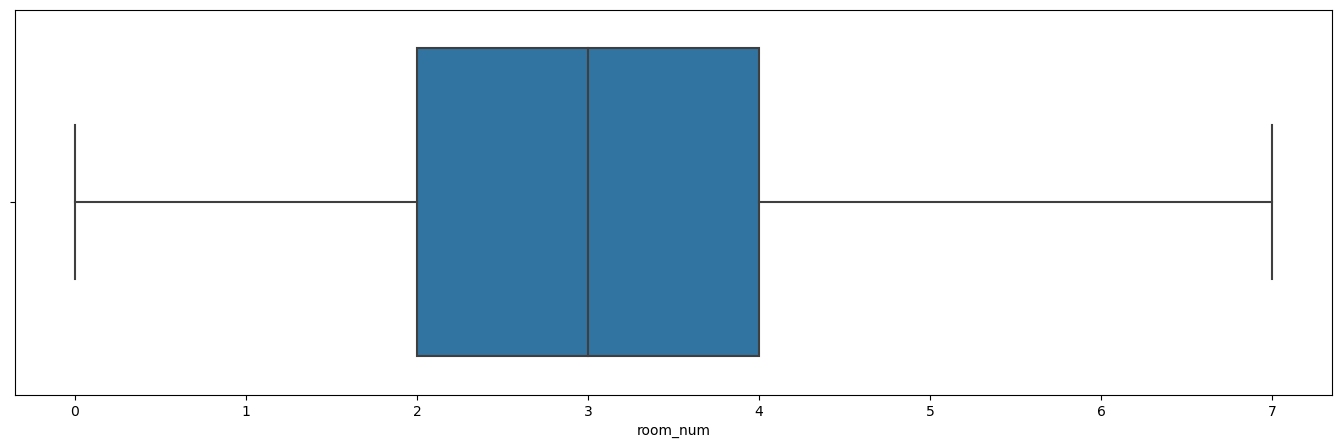

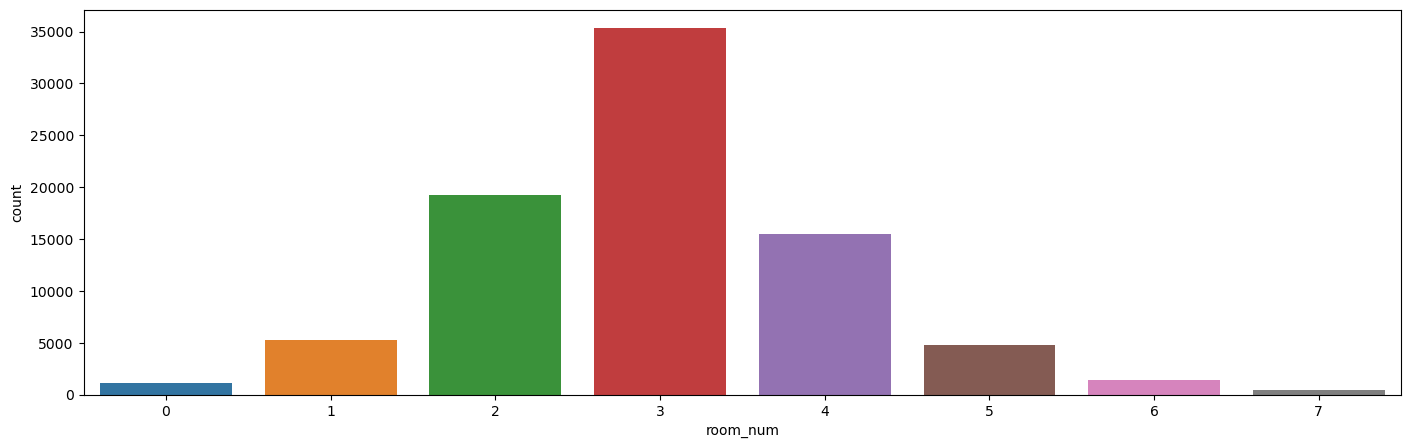

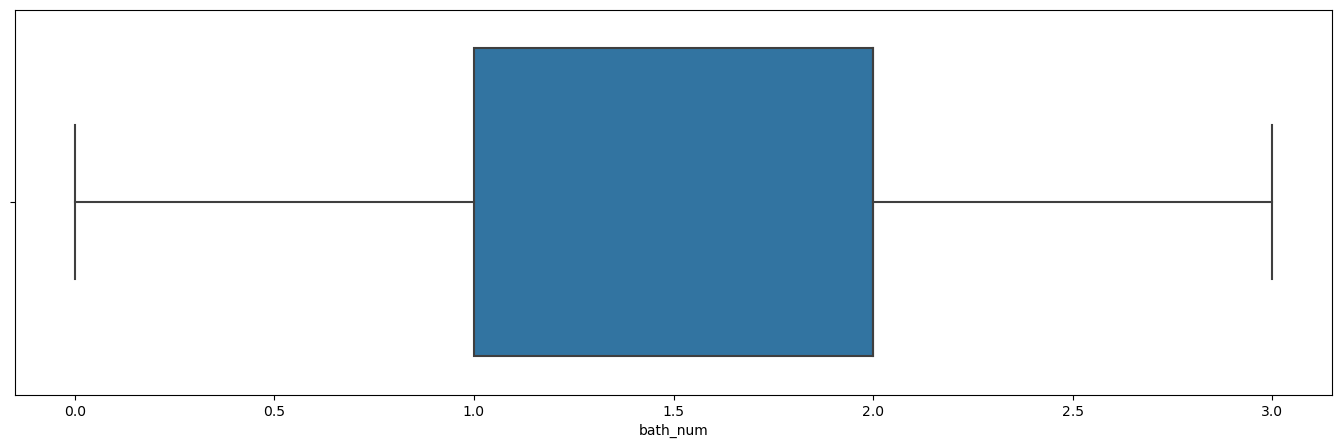

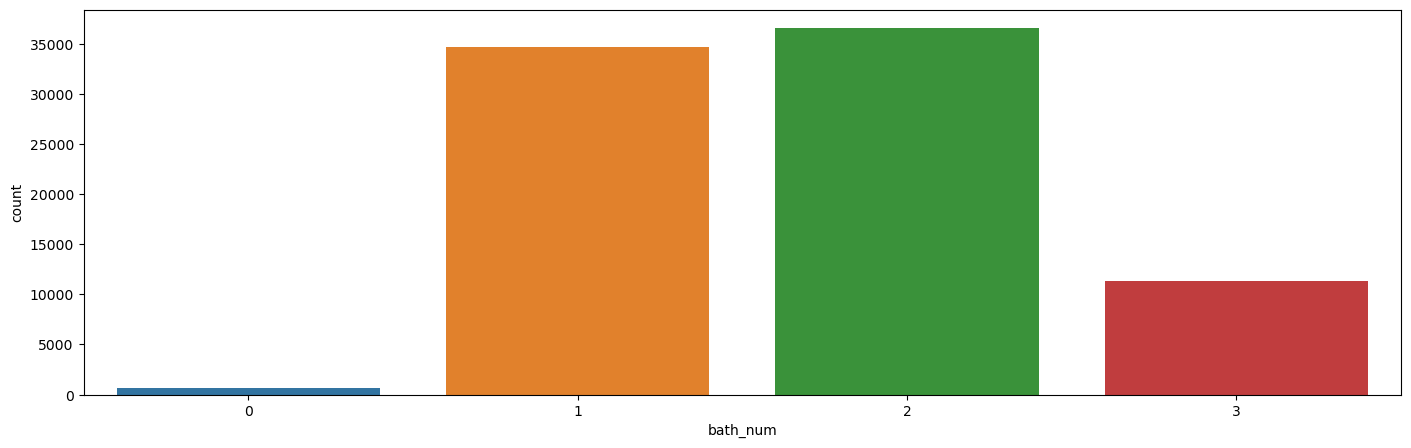

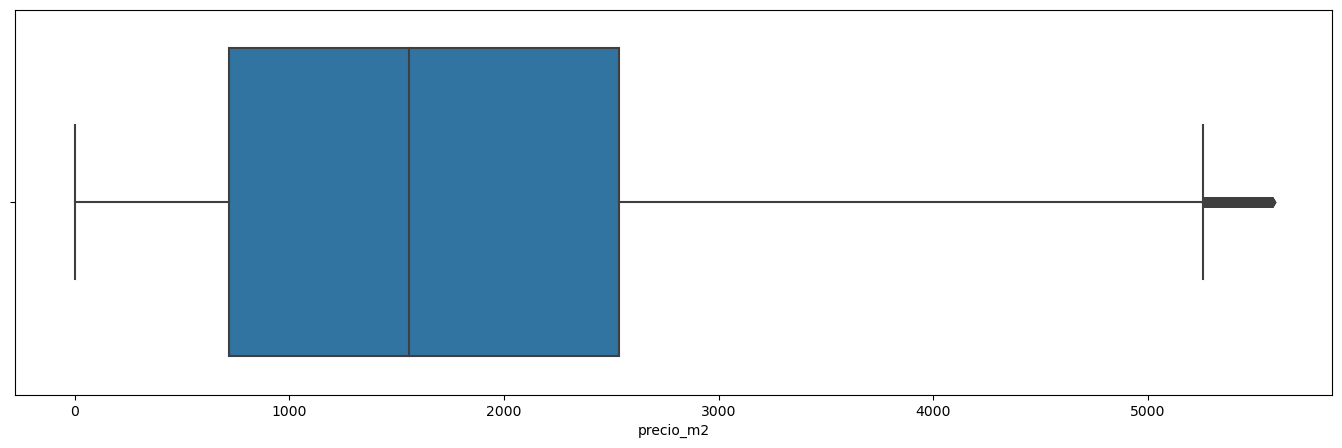

In [80]:
plt.figure(figsize=(17,5))
sns.boxplot(data=DF, x=DF['room_num'])
plt.figure(figsize=(17,5))
sns.countplot(data=DF, x=DF['room_num'])

plt.figure(figsize=(17,5))
sns.boxplot(data=DF, x=DF['bath_num'])
plt.figure(figsize=(17,5))
sns.countplot(data=DF, x=DF['bath_num'])

plt.figure(figsize=(17,5))
sns.boxplot(data=DF, x=DF['precio_m2'])

#**5-Eliminamos observaciones no relevantes para nuestro analisis.**


Considerando que el analisis que estaremos realizando sera sobre el precio de compra-venta de los inmuebles en Espana deseamos verificar los tipos de viviendas que se encuentra en nuesta base de datos en la columna 'house_type' a fin de evaluar si los valores se encuentran correctos para iniciar el analisis.

In [81]:
#verificamos que tipos de valores que
DF['house_type'].value_counts()

Piso                                       47669
 Casa o chalet independiente                9608
 Chalet adosado                             5101
 Casa o chalet                              4801
Ático                                       2770
 Casa de pueblo                             2756
Alquiler de Piso                            2226
Dúplex                                      2166
 Chalet pareado                             1904
 Finca rústica                              1768
 Casa rural                                  765
Estudio                                      638
Casa rural                                   438
Alquiler de Ático                            101
 Caserón                                      96
Alquiler de Dúplex                            67
 Casa terrera                                 62
 Masía                                        52
Alquiler de Chalet adosado                    47
Alquiler de Casa o chalet independiente       46
 Cortijo            

<AxesSubplot:xlabel='count', ylabel='house_type'>

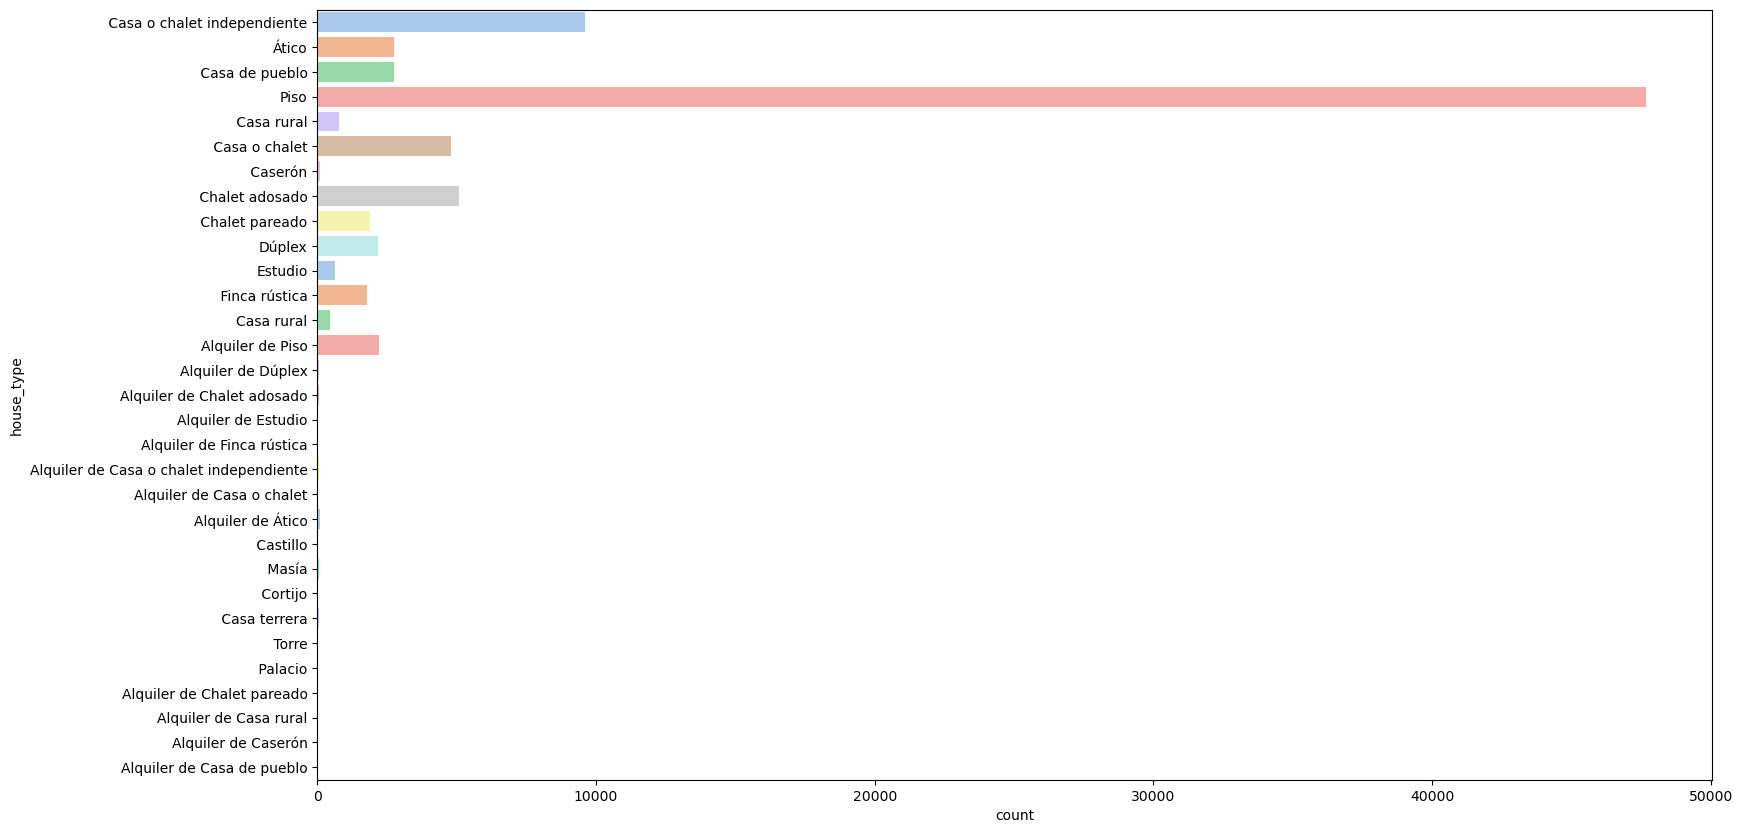

In [82]:
plt.figure(figsize=(18,10))
sns.countplot(data=DF, y=DF['house_type'],palette="pastel")

In [83]:
#Verificamos que existen datos de viviendas para alquiler lo que esta fuera de nuestro analisis de prediccion de precios 
#para vivienda en lo que respecta a la compra-venta, por lo que decidimos elimnar estos valores que no seran util para 
#el modelo que deseamos.
DF = DF[~DF['house_type'].str.contains('Alquiler')]
DF['house_type'].value_counts()

Piso                            47669
 Casa o chalet independiente     9608
 Chalet adosado                  5101
 Casa o chalet                   4801
Ático                            2770
 Casa de pueblo                  2756
Dúplex                           2166
 Chalet pareado                  1904
 Finca rústica                   1768
 Casa rural                       765
Estudio                           638
Casa rural                        438
 Caserón                           96
 Casa terrera                      62
 Masía                             52
 Cortijo                           24
 Torre                             13
 Palacio                            5
 Castillo                           1
Name: house_type, dtype: int64

Considerando los tipos de viviendas en la variable house_type hemos decidido excluir del analisis las viviendas que se detallan mas abajo:

Casa rural
Finca rústica
Casa rural
Caserón
Casa terrera
Masía
Torre
Cortijo
Castillo
Palacio

In [84]:
DF['house_type'].shape

(80637,)

In [85]:
DF = DF[~DF['house_type'].str.contains('Casa rural')]
DF = DF[~DF['house_type'].str.contains('Caserón')]
DF = DF[~DF['house_type'].str.contains('Masía')]
DF = DF[~DF['house_type'].str.contains('Casa terrera')]
DF = DF[~DF['house_type'].str.contains('Cortijo')]
DF = DF[~DF['house_type'].str.contains('Palacio')]
DF = DF[~DF['house_type'].str.contains('Torre')]
DF = DF[~DF['house_type'].str.contains('Castillo')]
DF = DF[~DF['house_type'].str.contains('Finca rústica')]

In [86]:
DF['house_type'].shape

(77413,)

<AxesSubplot:xlabel='count', ylabel='house_type'>

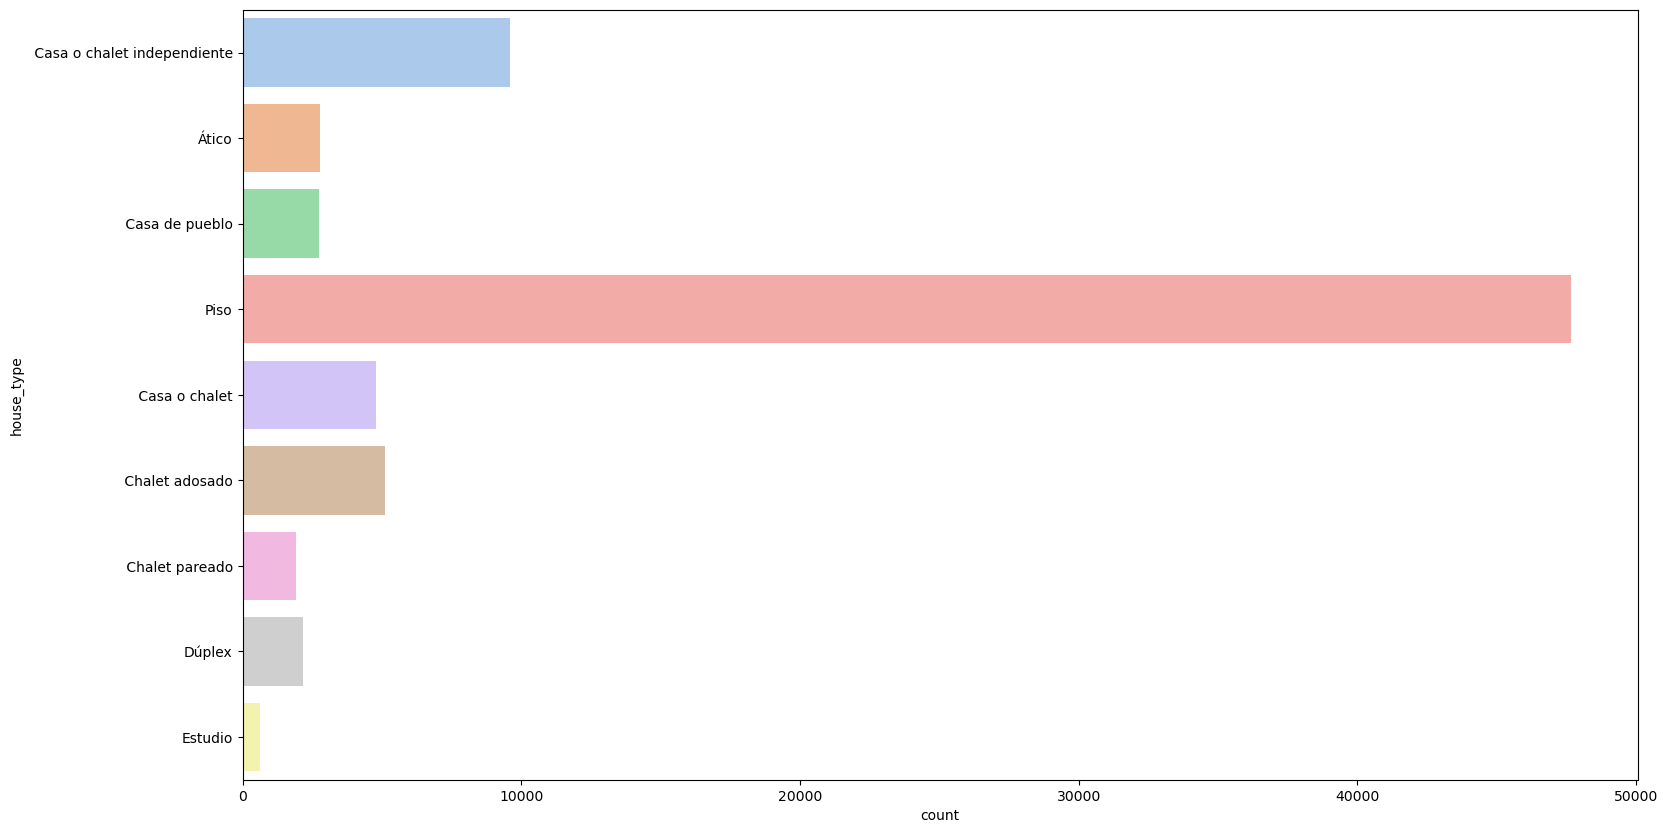

In [87]:
plt.figure(figsize=(18,10))
sns.countplot(data=DF, y=DF['house_type'],palette="pastel")

#**6- Chequeamos la distribucion de nuestros datos buscando desbalances de los mismos.**


In [88]:
#Analizamos las variables locaciones para identificar los pesos de los mismos por loc_zone

<AxesSubplot:xlabel='count', ylabel='loc_zone'>

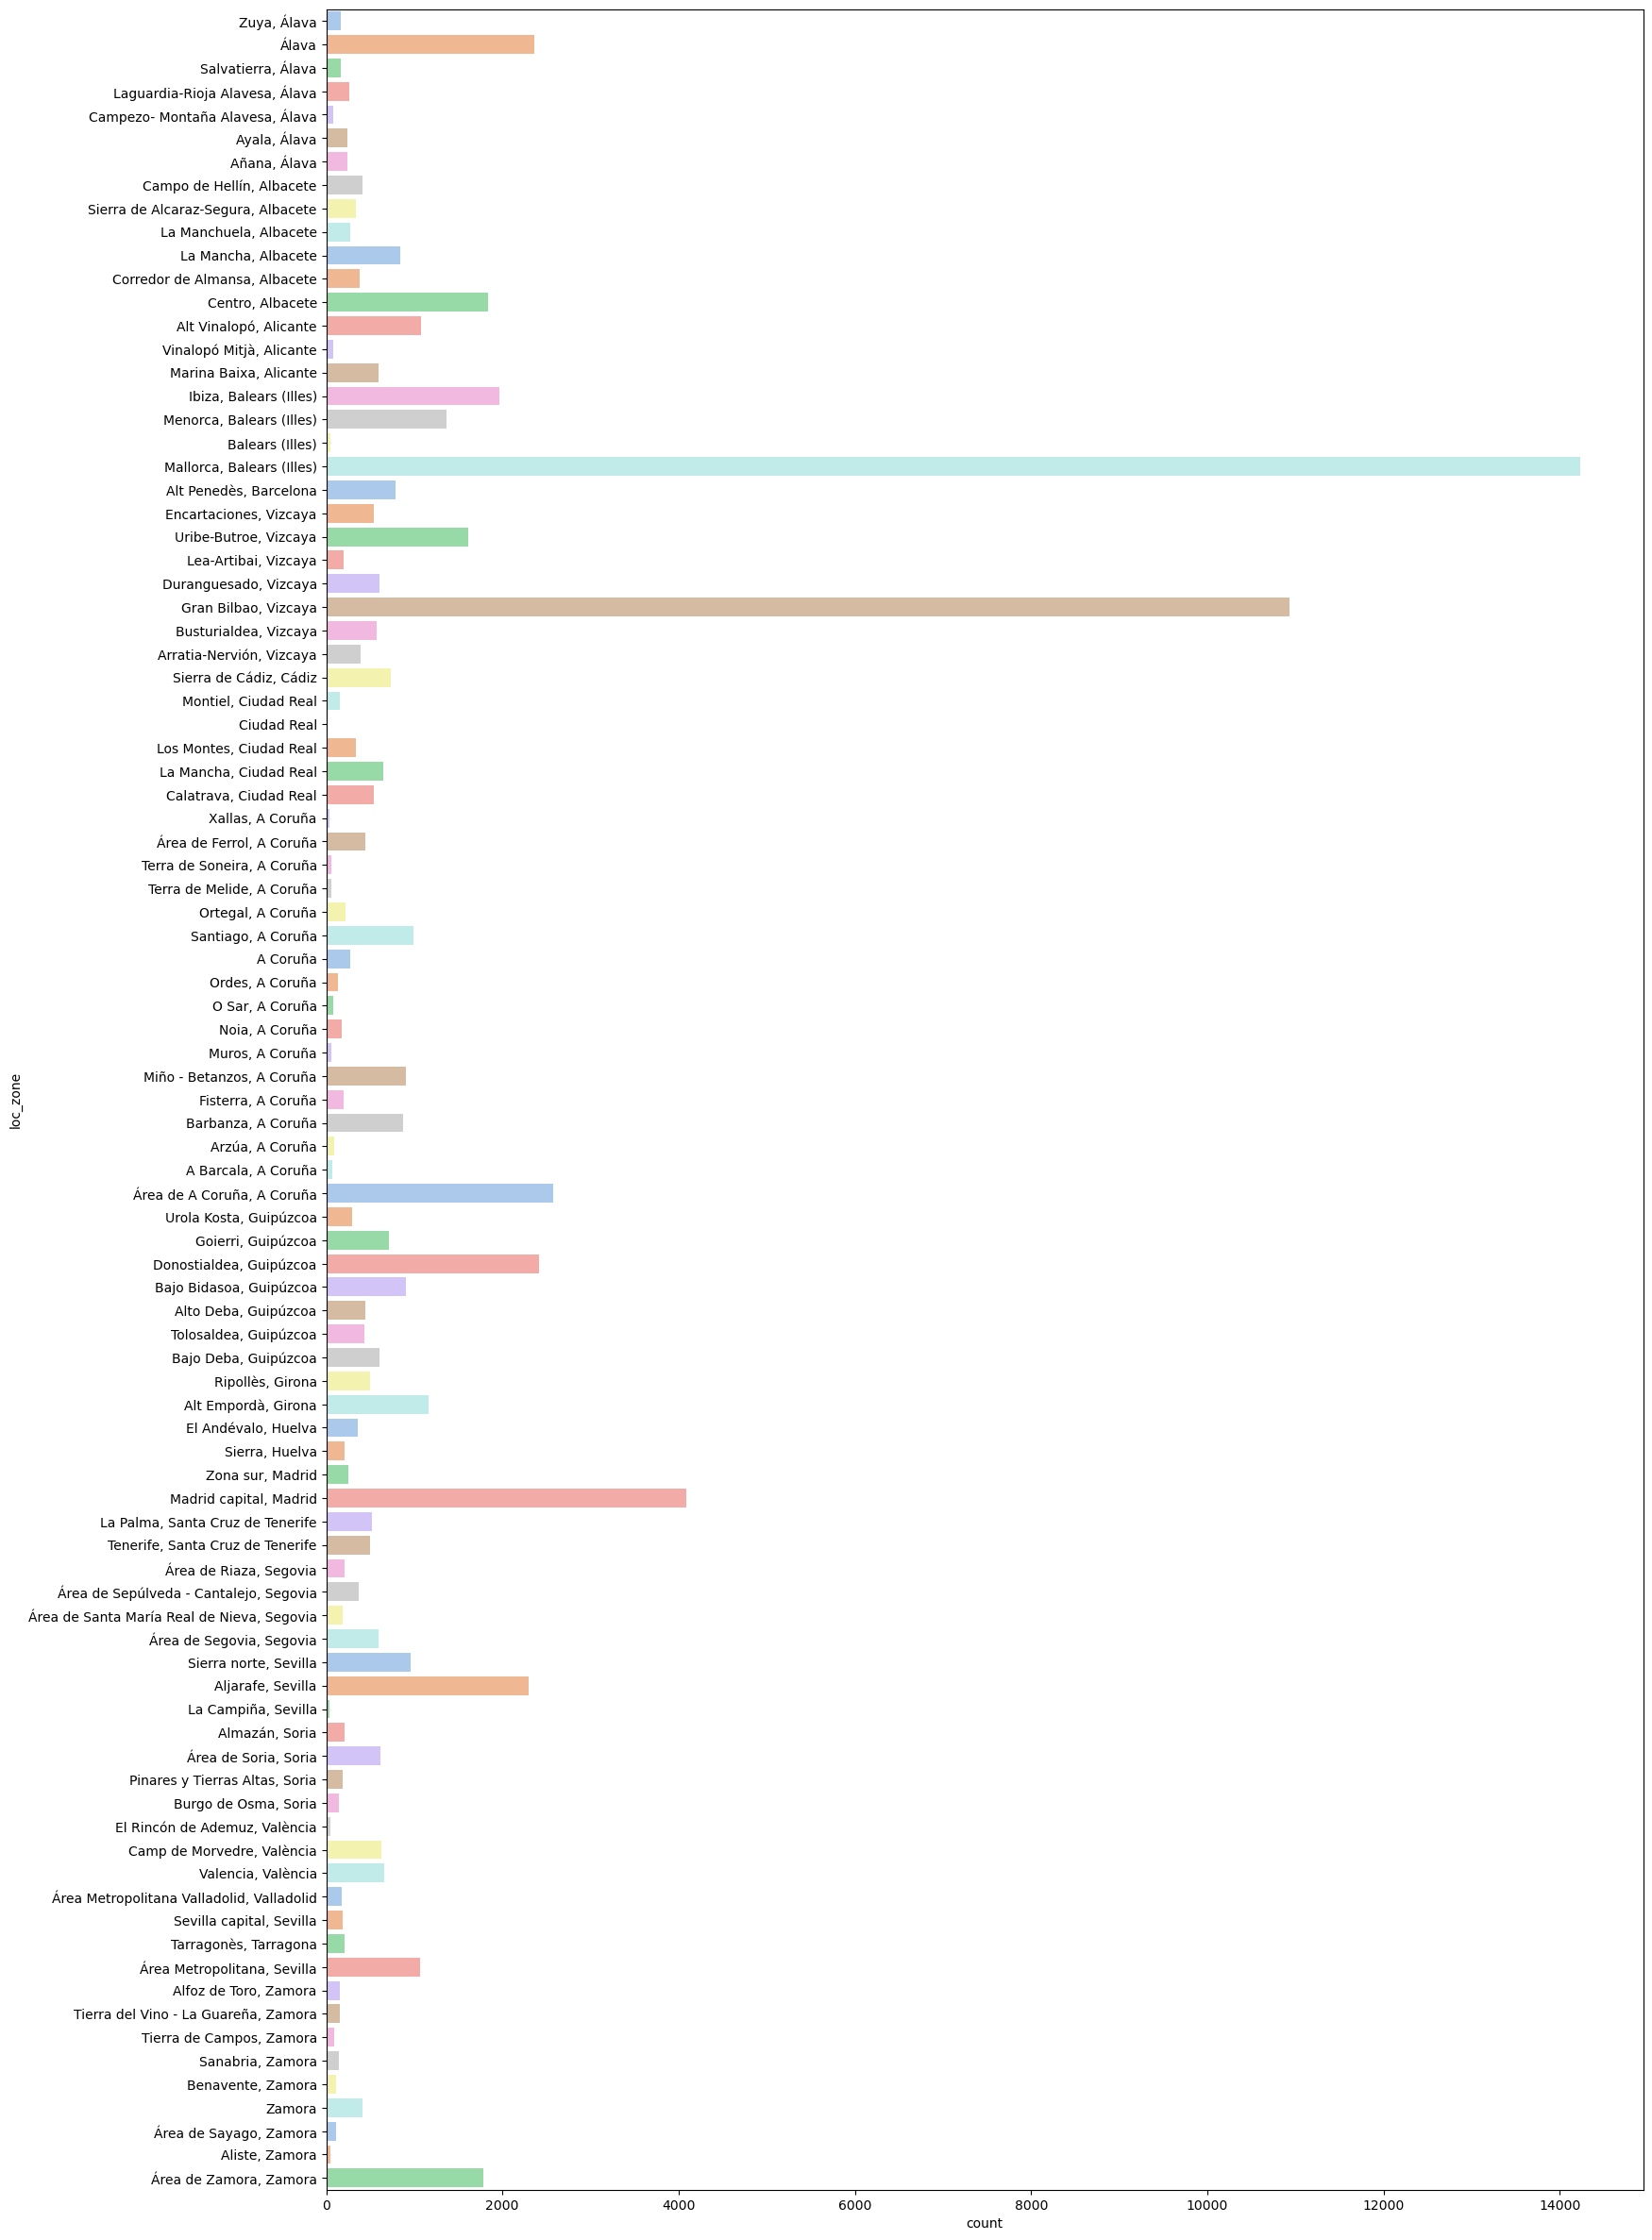

In [89]:
plt.figure(figsize=(18,30))
sns.countplot(data=DF, y=DF['loc_zone'],palette="pastel")

In [90]:
# Creamos la columna 'Provincia' con los datos de Loc_zone
def obtener_ciudad(loc_zone):
    partes = loc_zone.split(', ')
    return partes[-1] if len(partes) > 1 else partes[0]

DF['Provincia'] = DF['loc_zone'].apply(obtener_ciudad)

<AxesSubplot:xlabel='count', ylabel='Provincia'>

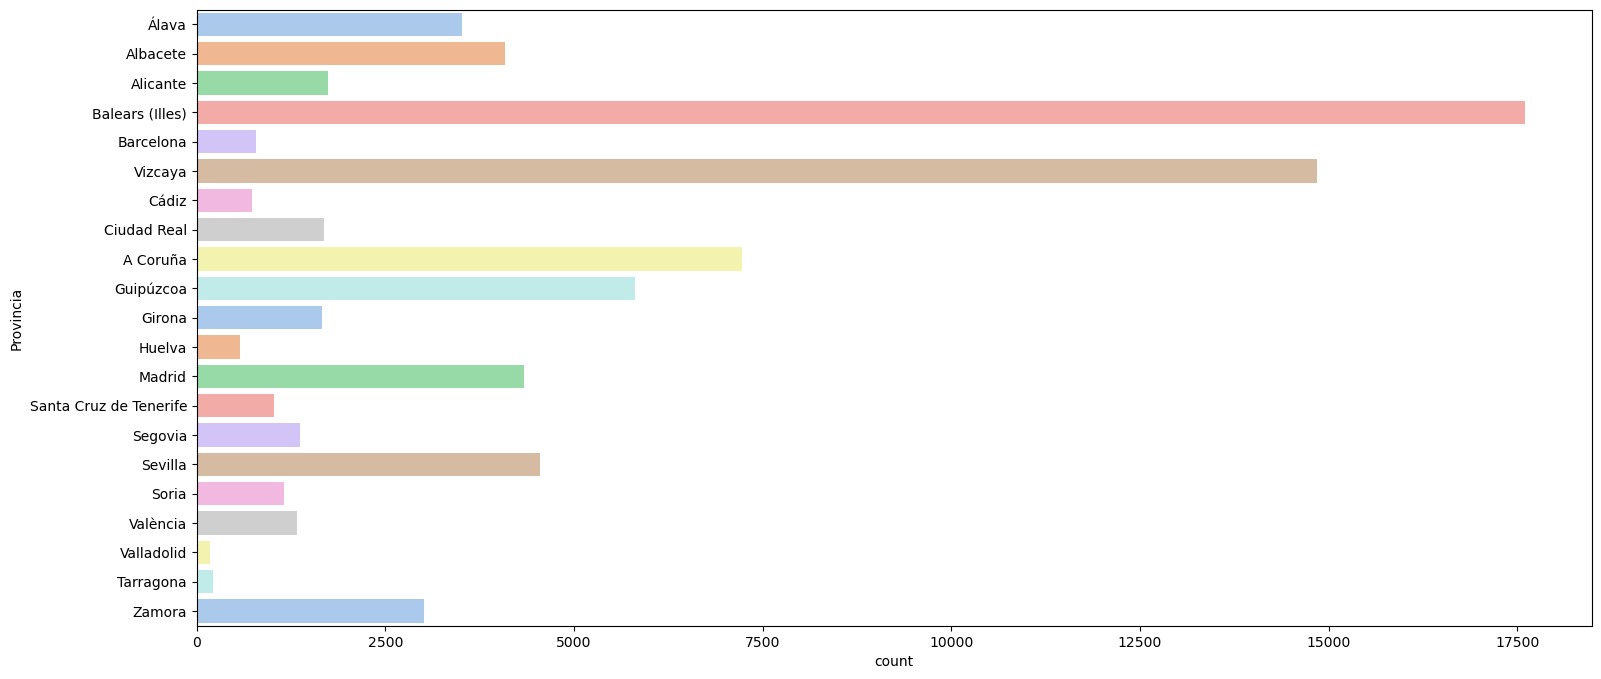

In [91]:
plt.figure(figsize=(18,8))
sns.countplot(data=DF, y=DF['Provincia'],palette="pastel")

In [92]:
## Vemos que hay un desbalance en la cantidad de datos que tenemos de las provincias de Vizcaya y de Baleares.

In [93]:
DF['Provincia'].value_counts()

Balears (Illes)           17605
Vizcaya                   14843
A Coruña                   7228
Guipúzcoa                  5810
Sevilla                    4546
Madrid                     4338
Albacete                   4078
Álava                      3516
Zamora                     3014
Alicante                   1742
Ciudad Real                1683
Girona                     1658
Segovia                    1369
València                   1334
Soria                      1150
Santa Cruz de Tenerife     1022
Barcelona                   783
Cádiz                       737
Huelva                      567
Tarragona                   209
Valladolid                  181
Name: Provincia, dtype: int64

In [94]:
DF.shape

(77413, 27)

In [95]:
DF['Provincia'].value_counts()

Balears (Illes)           17605
Vizcaya                   14843
A Coruña                   7228
Guipúzcoa                  5810
Sevilla                    4546
Madrid                     4338
Albacete                   4078
Álava                      3516
Zamora                     3014
Alicante                   1742
Ciudad Real                1683
Girona                     1658
Segovia                    1369
València                   1334
Soria                      1150
Santa Cruz de Tenerife     1022
Barcelona                   783
Cádiz                       737
Huelva                      567
Tarragona                   209
Valladolid                  181
Name: Provincia, dtype: int64

In [96]:
# Exploramos mas a fondo la distribucion de los datos
# por provincia para chequear desbalance
Balears = DF[DF['Provincia']== 'Balears (Illes)']


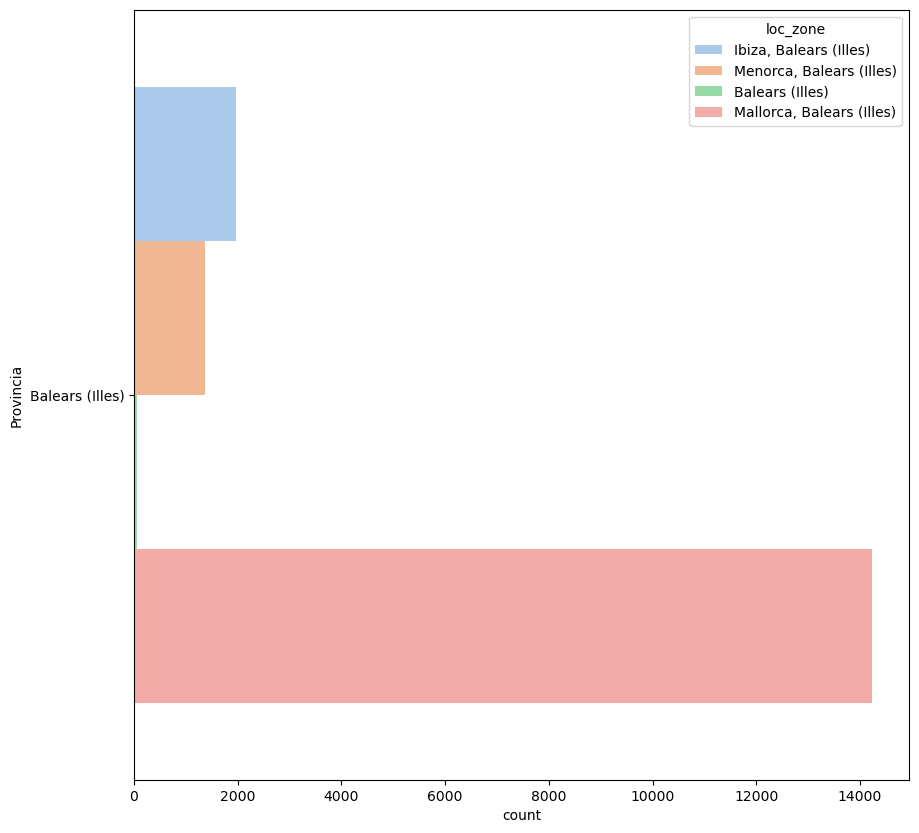

In [97]:
plt.figure(figsize=(10,10))
sns.countplot(data=Balears, y=Balears["Provincia"], hue=Balears['loc_zone'],palette="pastel")
plt.show()

In [98]:
DF['loc_zone'].value_counts()

Mallorca, Balears (Illes)        14232
Gran Bilbao, Vizcaya             10935
Madrid capital, Madrid            4082
Área de A Coruña, A Coruña        2574
Donostialdea, Guipúzcoa           2412
                                 ...  
El Rincón de Ademuz, València       48
Aliste, Zamora                      46
Xallas, A Coruña                    37
La Campiña, Sevilla                 34
Ciudad Real                          4
Name: loc_zone, Length: 93, dtype: int64

In [99]:
# Vamos a undersamplear nuestros datos quitando  de  forma random datos de Mallorca,Baleares ya que 
# esta sobre- representado en nuestro dataset

In [100]:
Vizcaya = DF[DF['Provincia']== 'Vizcaya']

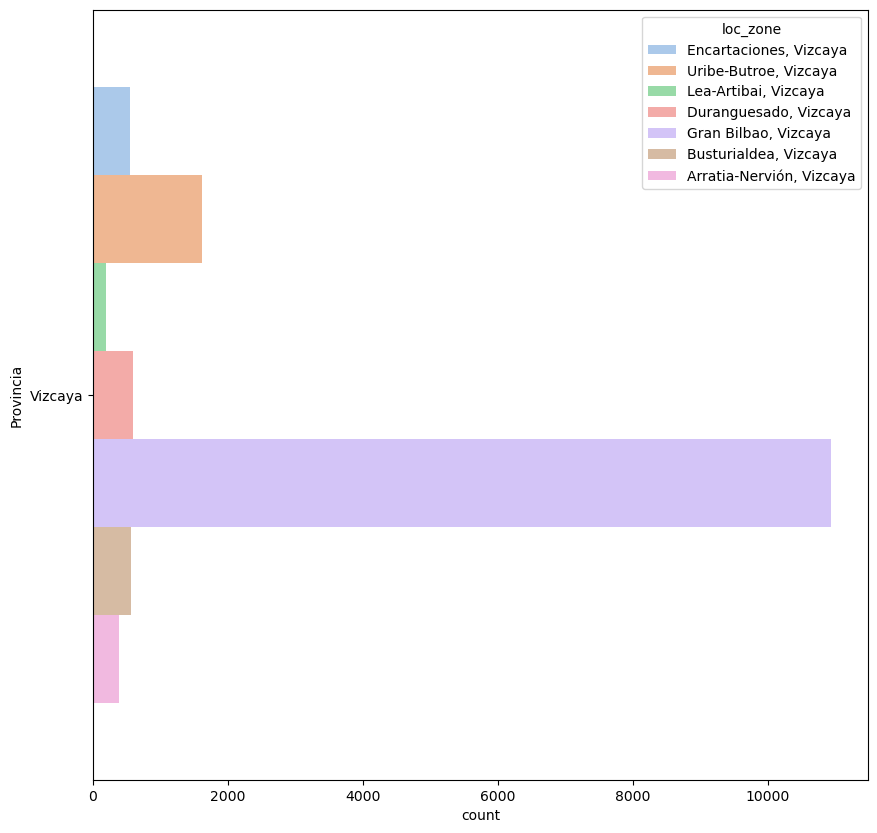

In [101]:
plt.figure(figsize=(10,10))
sns.countplot(data=Vizcaya, y=Vizcaya["Provincia"], hue=Vizcaya['loc_zone'],palette="pastel")
plt.show()

In [102]:
DF['loc_zone'].value_counts()

Mallorca, Balears (Illes)        14232
Gran Bilbao, Vizcaya             10935
Madrid capital, Madrid            4082
Área de A Coruña, A Coruña        2574
Donostialdea, Guipúzcoa           2412
                                 ...  
El Rincón de Ademuz, València       48
Aliste, Zamora                      46
Xallas, A Coruña                    37
La Campiña, Sevilla                 34
Ciudad Real                          4
Name: loc_zone, Length: 93, dtype: int64

In [103]:
# Se observa que se poseen muchos mas datos de  de Gran Bilbao, Vizcaya 

In [104]:
# Vizualizamos las otras provincias

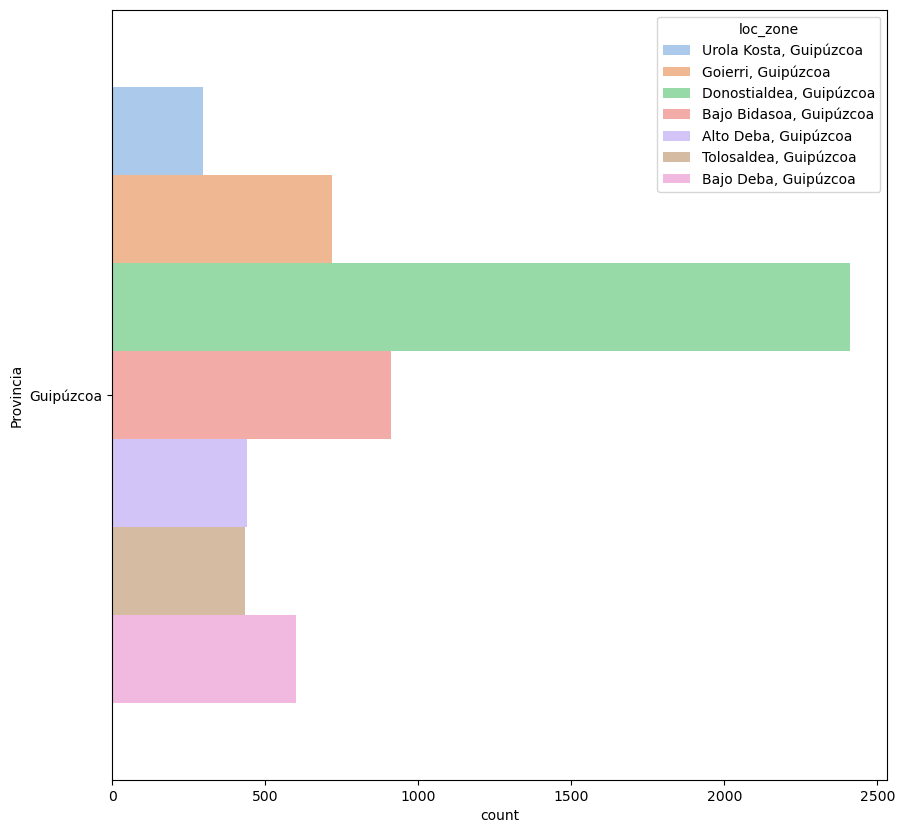

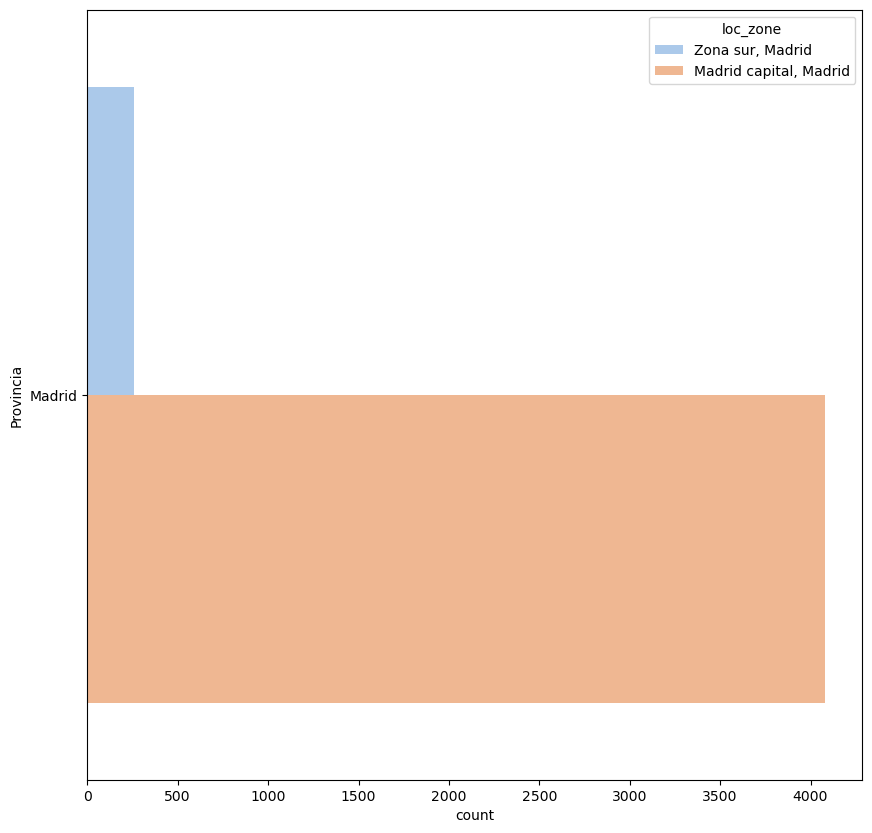

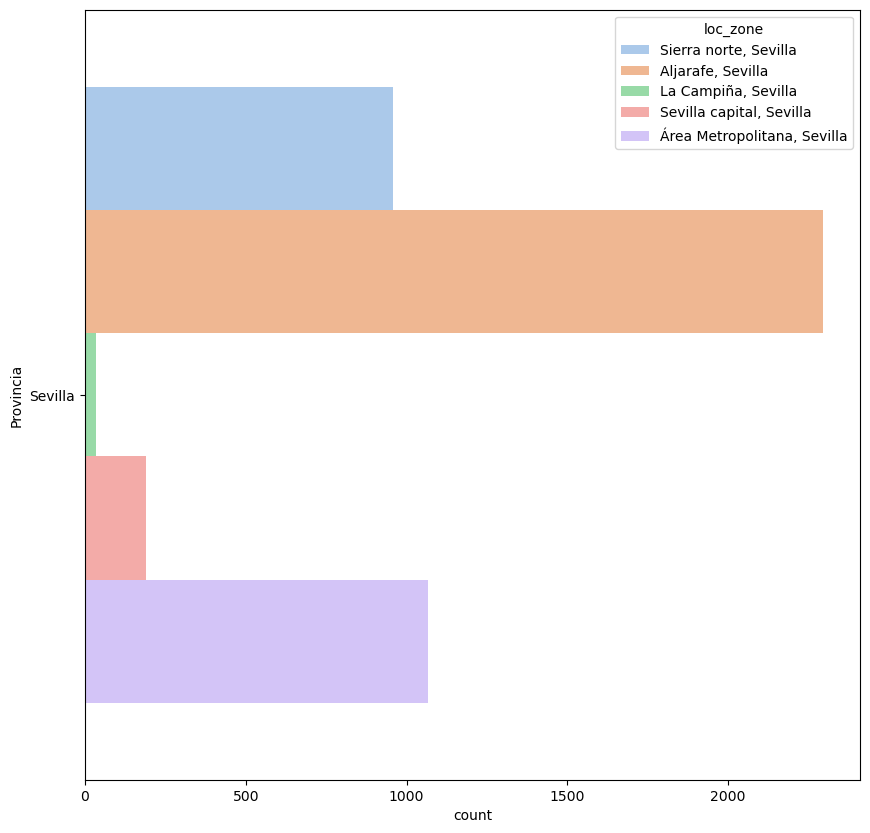

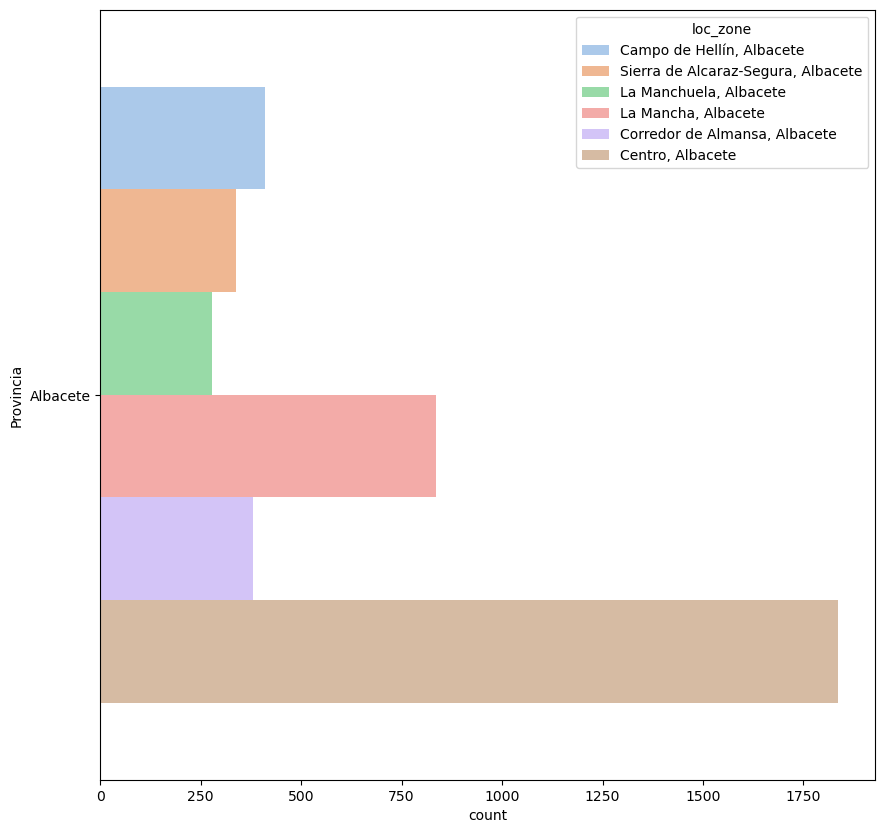

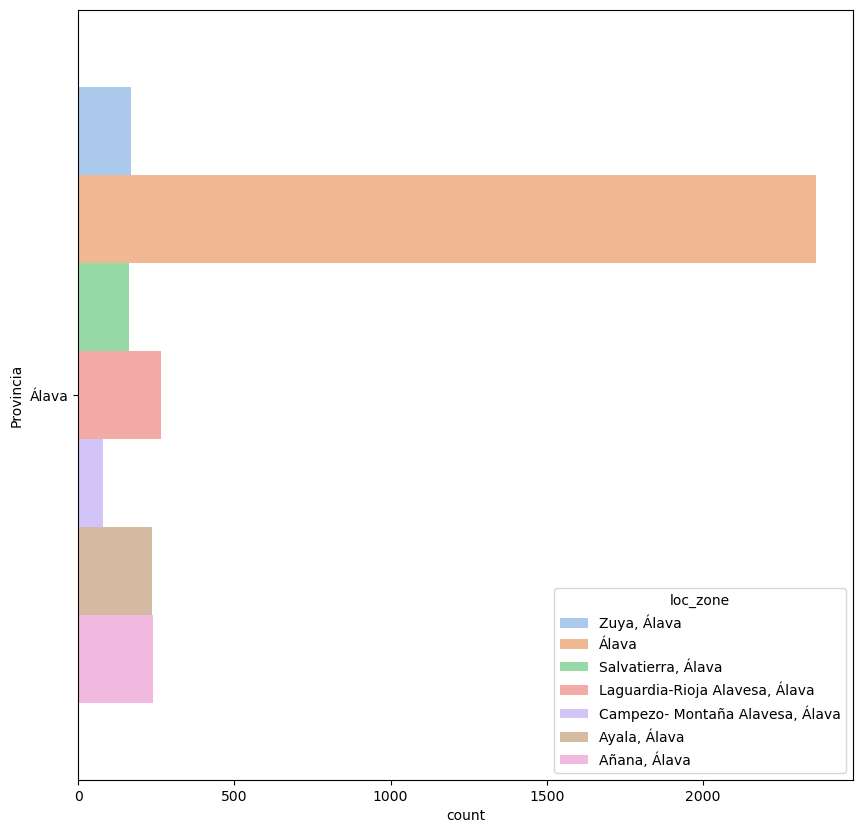

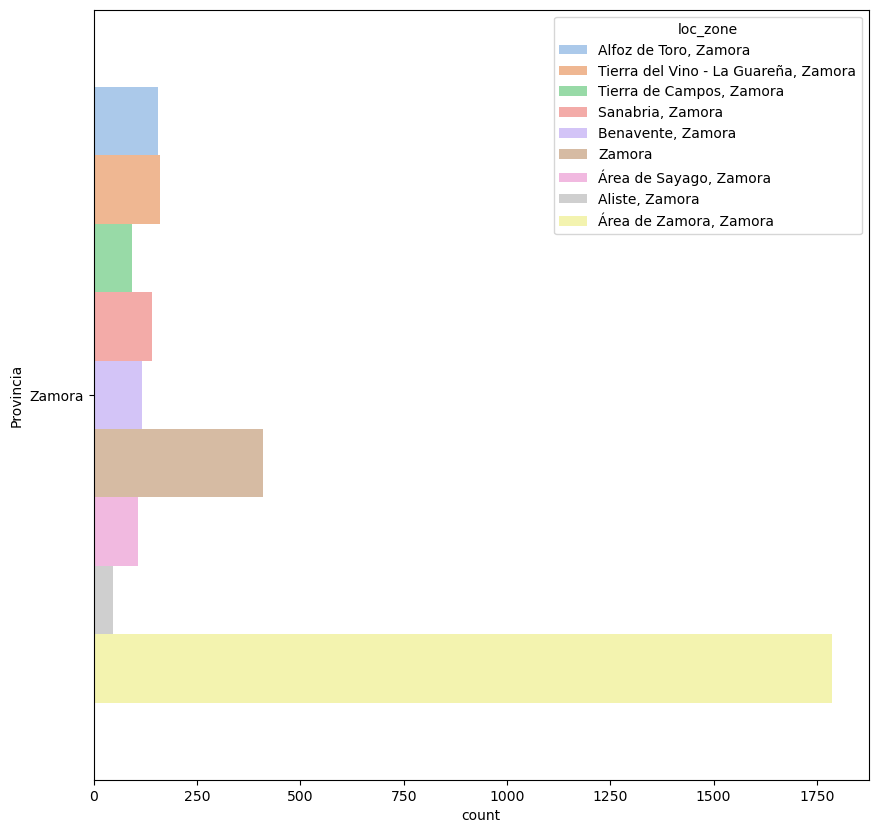

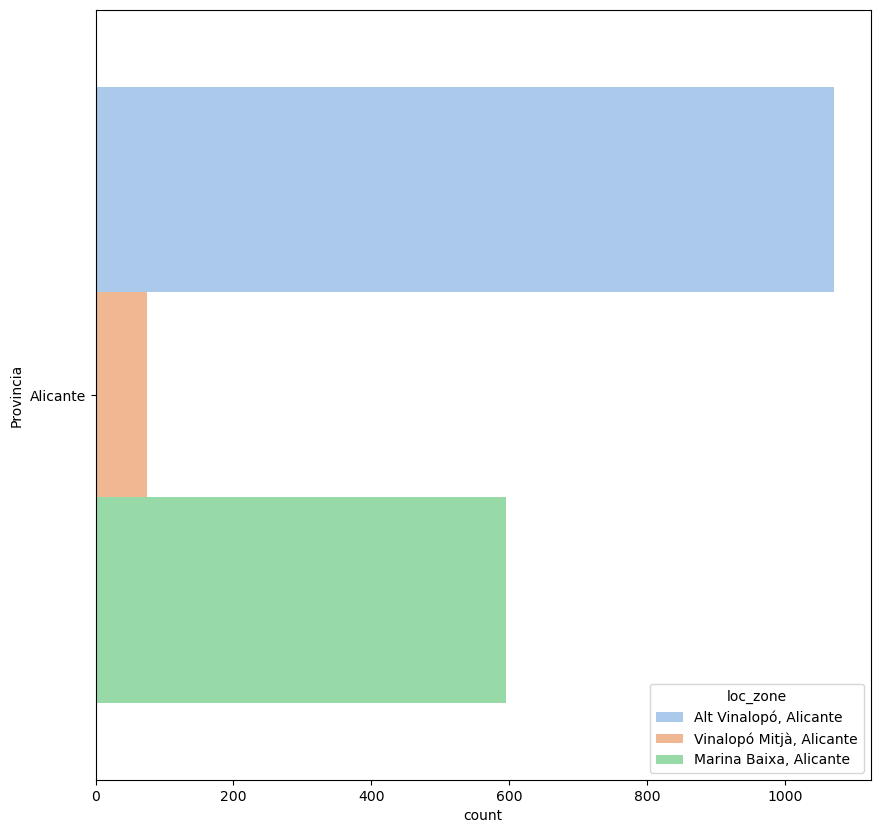

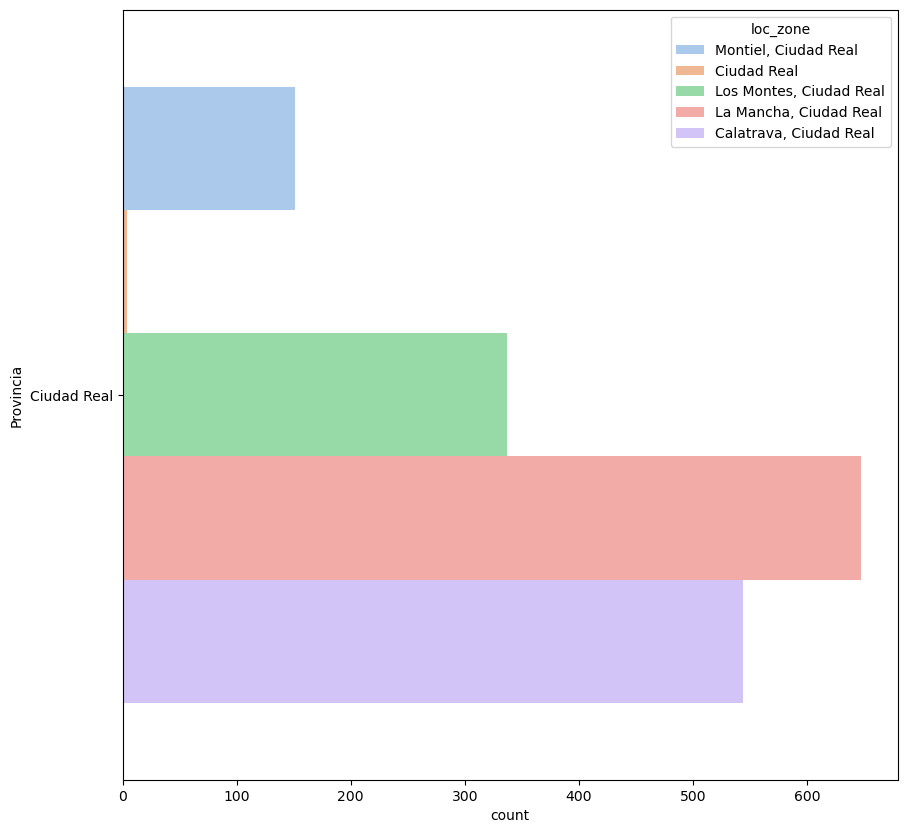

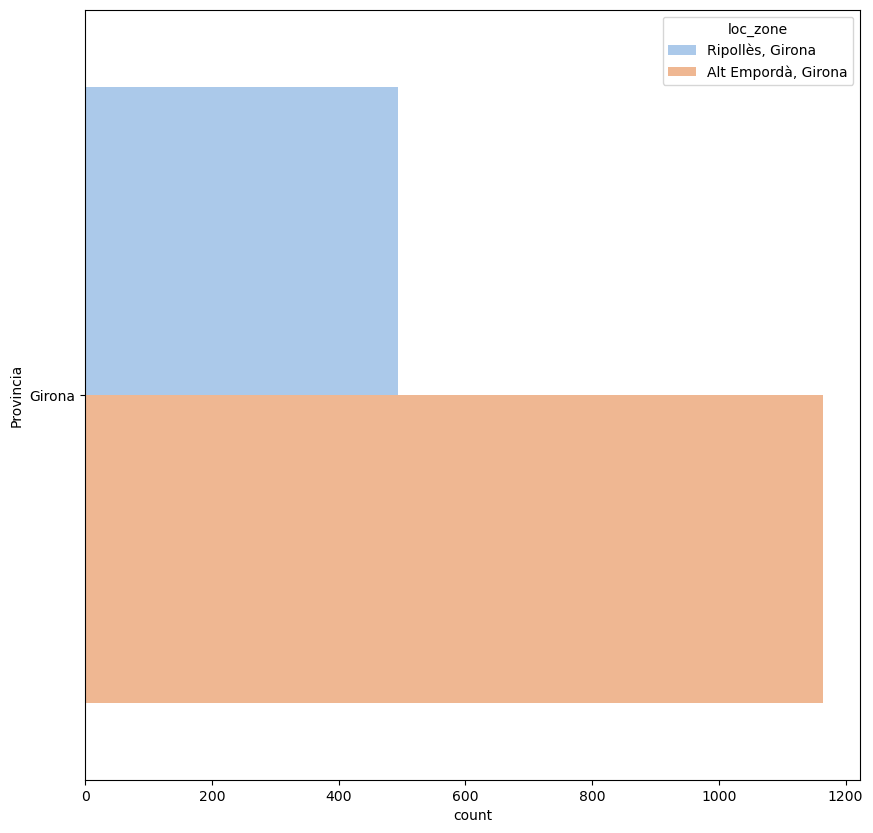

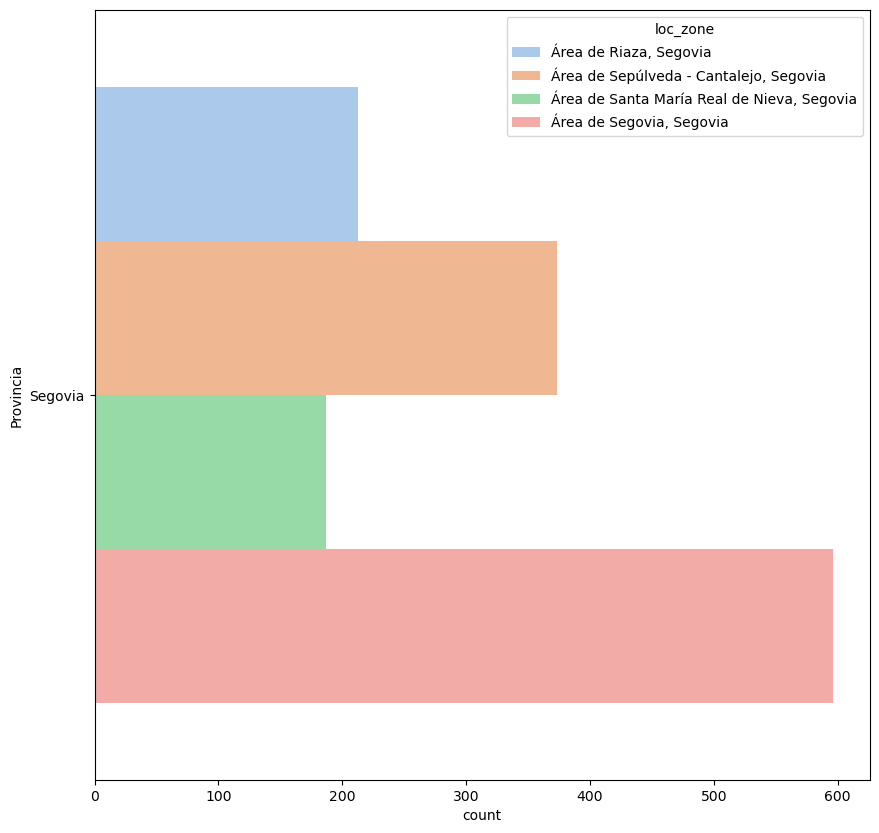

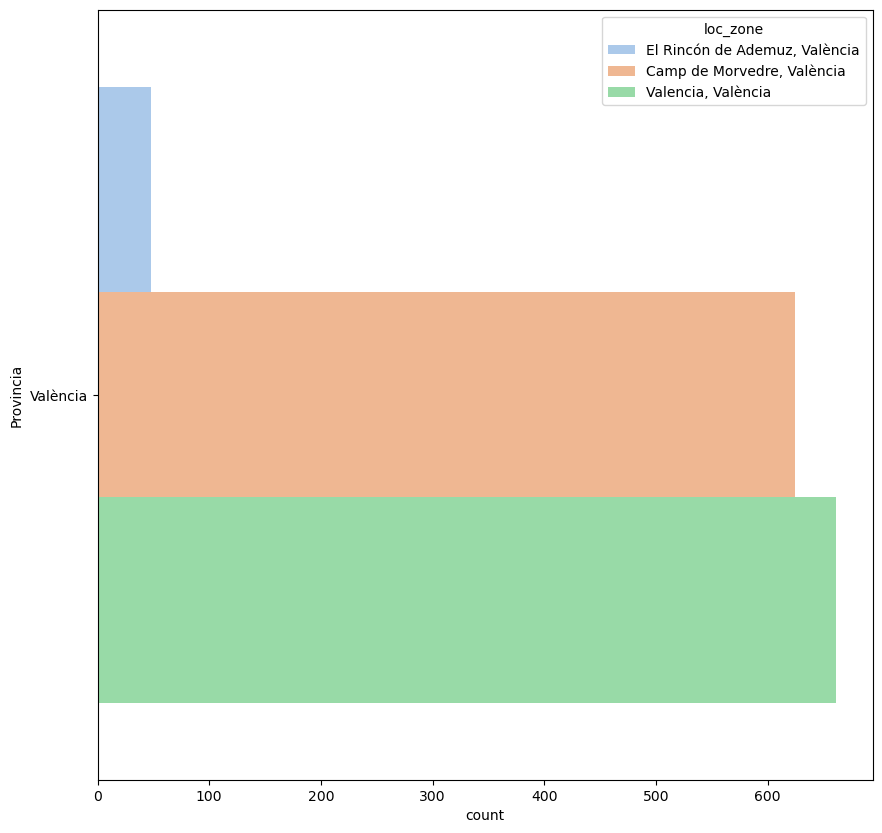

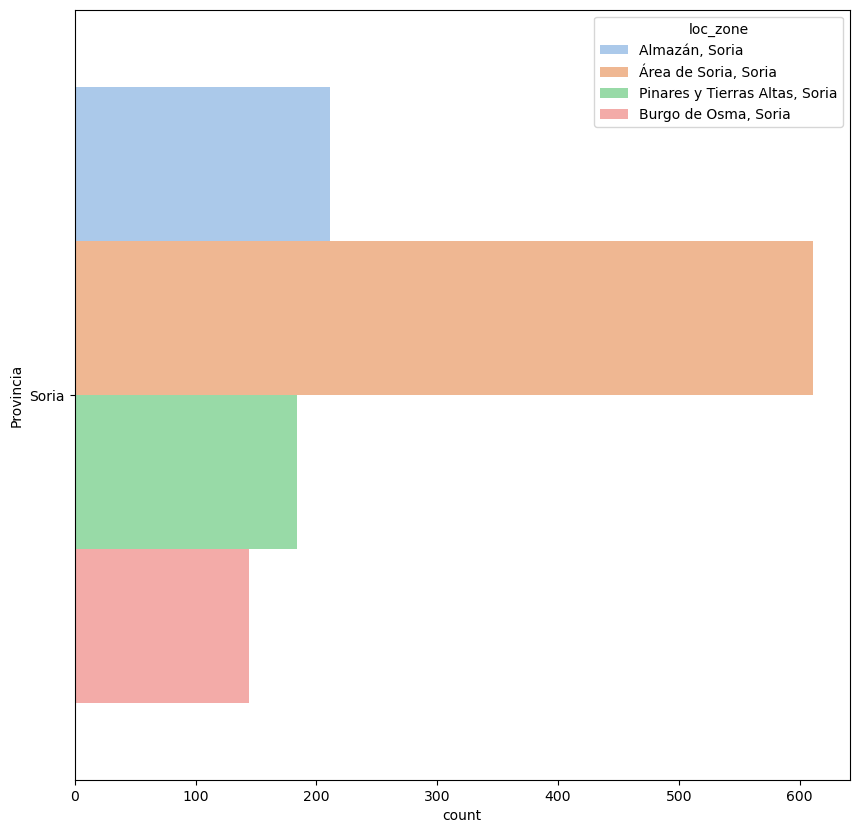

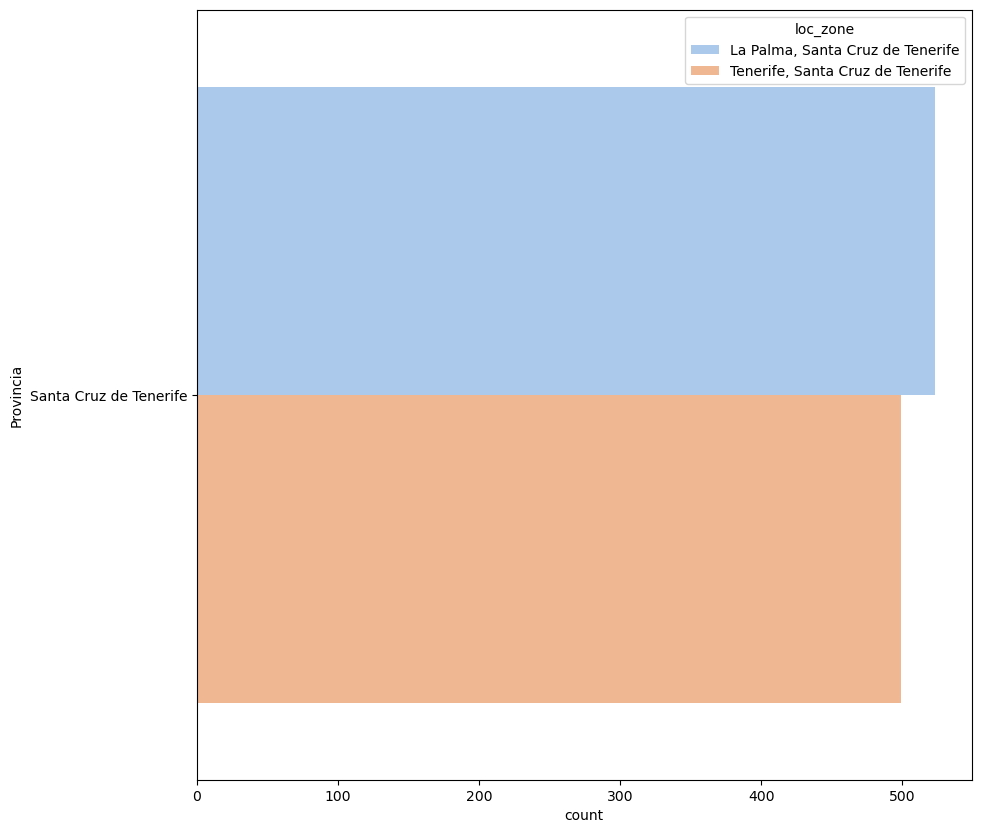

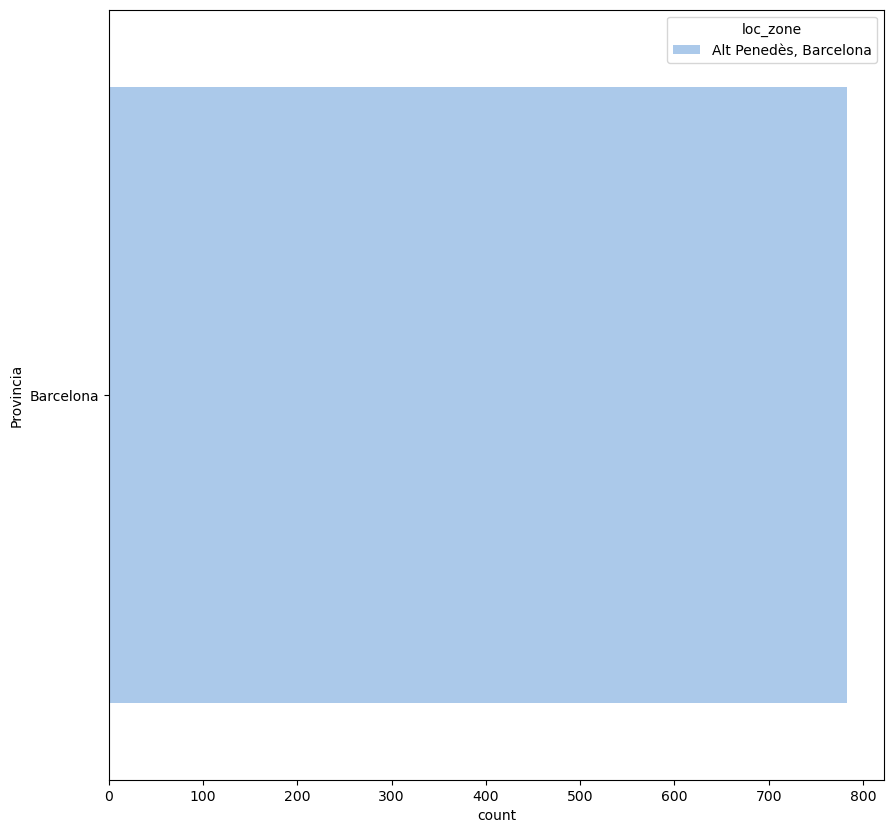

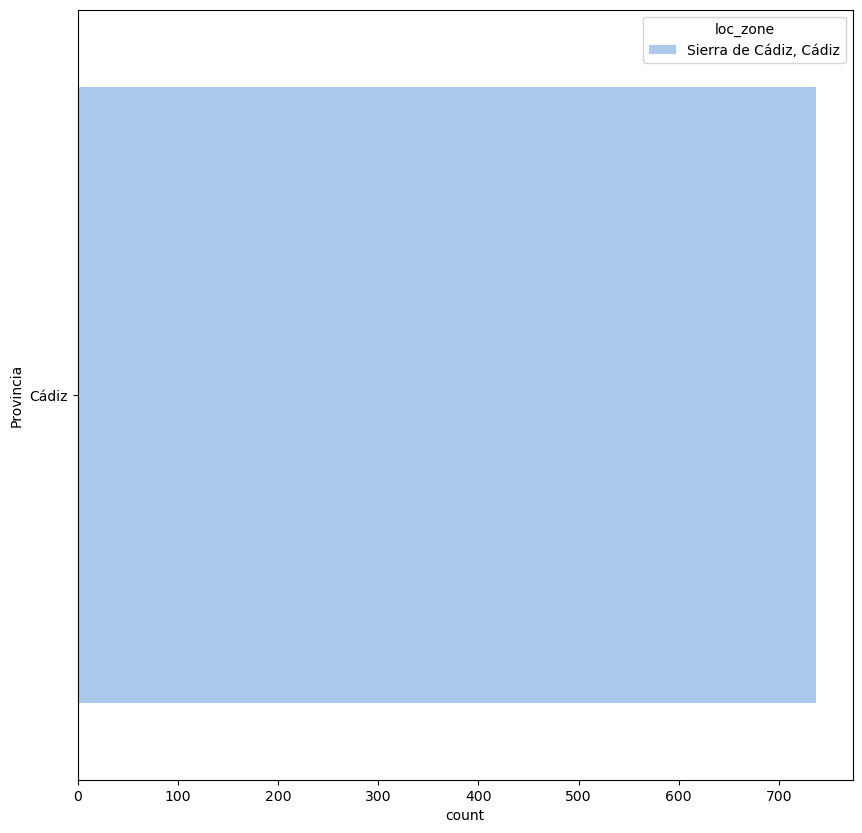

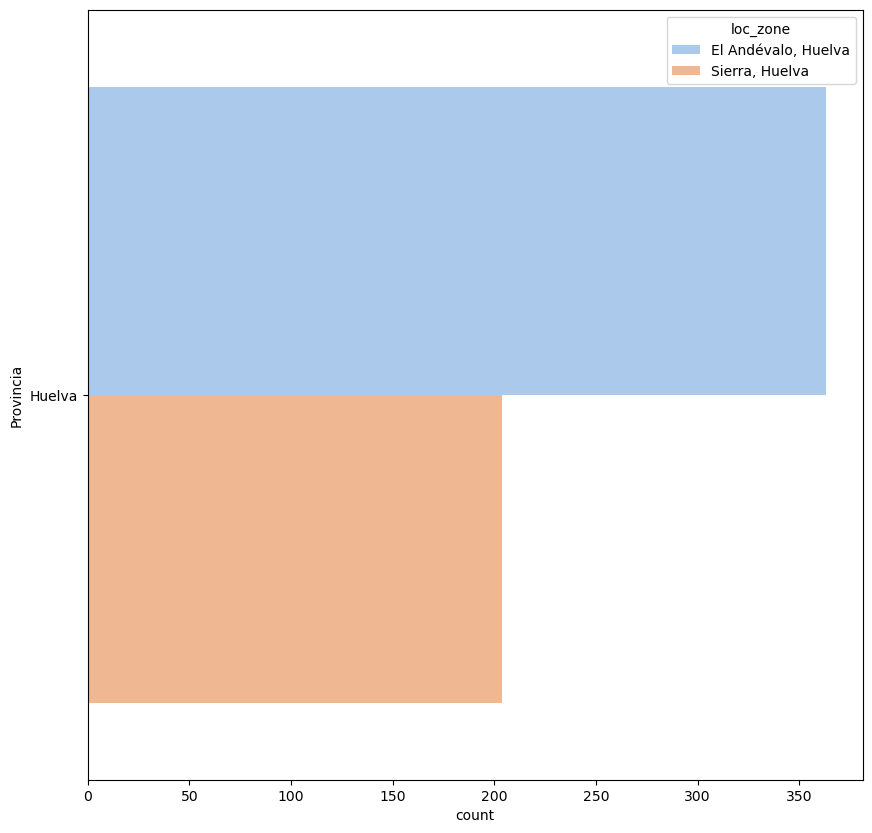

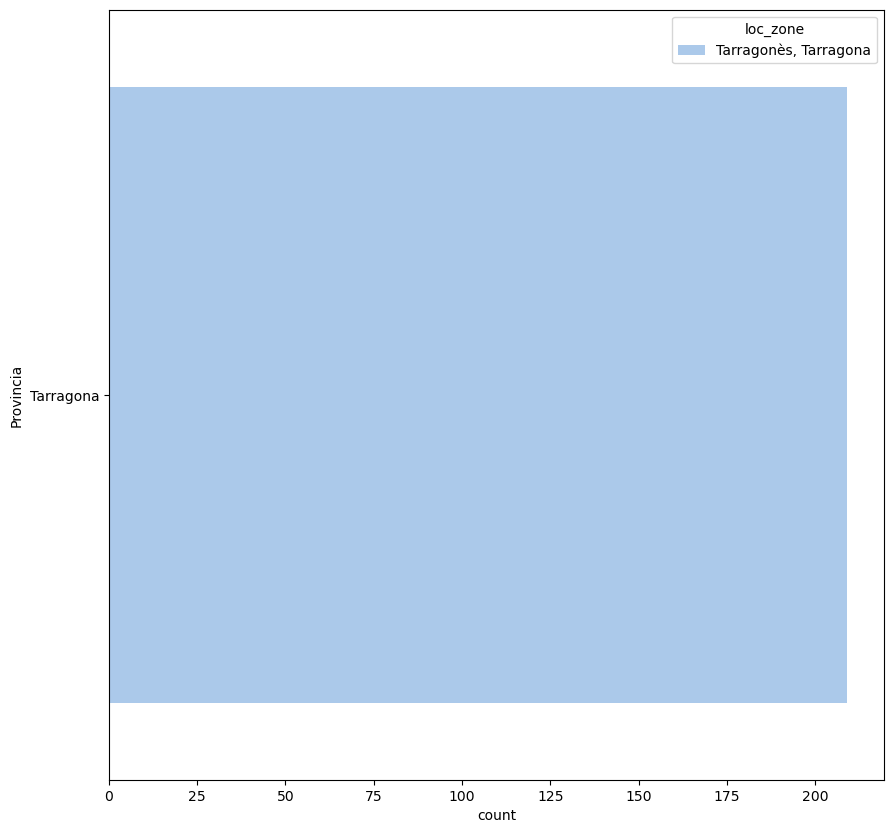

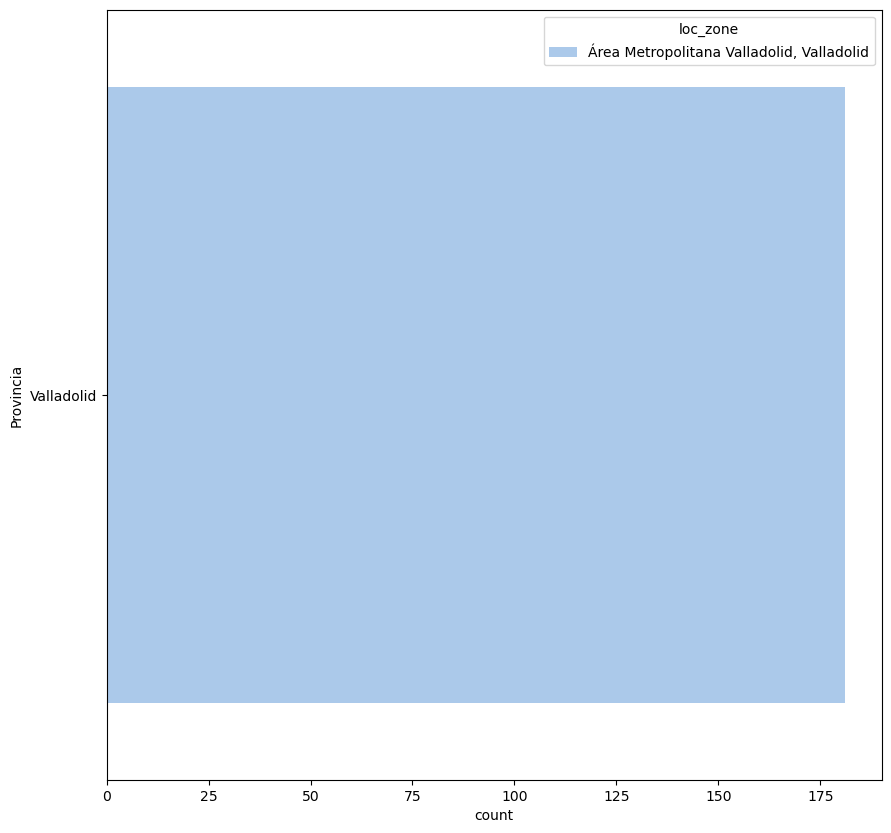

In [105]:
Guipúzcoa = DF[DF['Provincia']== 'Guipúzcoa']

plt.figure(figsize=(10,10))
sns.countplot(data=Guipúzcoa, y=Guipúzcoa["Provincia"], hue=Guipúzcoa['loc_zone'],palette="pastel")
plt.show()

Madrid = DF[DF['Provincia']== 'Madrid']

plt.figure(figsize=(10,10))
sns.countplot(data=Madrid, y=Madrid["Provincia"], hue=Madrid['loc_zone'],palette="pastel")
plt.show()

Sevilla = DF[DF['Provincia']== 'Sevilla']

plt.figure(figsize=(10,10))
sns.countplot(data=Sevilla, y=Sevilla["Provincia"], hue=Sevilla['loc_zone'],palette="pastel")
plt.show()

Albacete = DF[DF['Provincia']== 'Albacete']

plt.figure(figsize=(10,10))
sns.countplot(data=Albacete, y=Albacete["Provincia"], hue=Albacete['loc_zone'],palette="pastel")
plt.show()

Álava = DF[DF['Provincia']== 'Álava']

plt.figure(figsize=(10,10))
sns.countplot(data=Albacete, y=Álava["Provincia"], hue=Álava['loc_zone'],palette="pastel")
plt.show()

Zamora = DF[DF['Provincia']== 'Zamora']

plt.figure(figsize=(10,10))
sns.countplot(data=Zamora, y=Zamora["Provincia"], hue=Zamora['loc_zone'],palette="pastel")
plt.show()

Alicante = DF[DF['Provincia']== 'Alicante']

plt.figure(figsize=(10,10))
sns.countplot(data=Alicante, y=Alicante["Provincia"], hue=Alicante['loc_zone'],palette="pastel")
plt.show()

Ciudad_Real = DF[DF['Provincia']== 'Ciudad Real']

plt.figure(figsize=(10,10))
sns.countplot(data=Ciudad_Real, y=Ciudad_Real["Provincia"], hue=Ciudad_Real['loc_zone'],palette="pastel")
plt.show()

Girona = DF[DF['Provincia']== 'Girona']

plt.figure(figsize=(10,10))
sns.countplot(data=Girona, y=Girona["Provincia"], hue=Girona['loc_zone'],palette="pastel")
plt.show()
            
Segovia = DF[DF['Provincia']== 'Segovia']

plt.figure(figsize=(10,10))
sns.countplot(data=Segovia, y=Segovia["Provincia"], hue=Segovia['loc_zone'],palette="pastel")
plt.show()
             
València = DF[DF['Provincia']== 'València']

plt.figure(figsize=(10,10))
sns.countplot(data=València, y=València["Provincia"], hue=València['loc_zone'],palette="pastel")
plt.show()
             
Soria = DF[DF['Provincia']== 'Soria']

plt.figure(figsize=(10,10))
sns.countplot(data=Soria, y=Soria["Provincia"], hue=Soria['loc_zone'],palette="pastel")
plt.show()
    
Santa_Cruz_de_Tenerife = DF[DF['Provincia']== 'Santa Cruz de Tenerife']

plt.figure(figsize=(10,10))
sns.countplot(data=Santa_Cruz_de_Tenerife, y=Santa_Cruz_de_Tenerife["Provincia"], hue=Santa_Cruz_de_Tenerife['loc_zone'],palette="pastel")
plt.show() 
             
Barcelona = DF[DF['Provincia']== 'Barcelona']

plt.figure(figsize=(10,10))
sns.countplot(data=Barcelona, y=Barcelona["Provincia"], hue=Barcelona['loc_zone'],palette="pastel")
plt.show() 
             
Cádiz = DF[DF['Provincia']== 'Cádiz']

plt.figure(figsize=(10,10))
sns.countplot(data=Cádiz, y=Cádiz["Provincia"], hue=Cádiz['loc_zone'],palette="pastel")
plt.show()  
             
Huelva = DF[DF['Provincia']== 'Huelva']

plt.figure(figsize=(10,10))
sns.countplot(data=Huelva, y=Huelva["Provincia"], hue=Huelva['loc_zone'],palette="pastel")
plt.show() 
             
Tarragona = DF[DF['Provincia']== 'Tarragona']

plt.figure(figsize=(10,10))
sns.countplot(data=Tarragona, y=Tarragona["Provincia"], hue=Tarragona['loc_zone'],palette="pastel")
plt.show() 
             
Valladolid = DF[DF['Provincia']== 'Valladolid']

plt.figure(figsize=(10,10))
sns.countplot(data=Valladolid, y=Valladolid["Provincia"], hue=Valladolid['loc_zone'],palette="pastel")
plt.show()

In [106]:
DF.shape

(77413, 27)

<AxesSubplot:xlabel='count', ylabel='Provincia'>

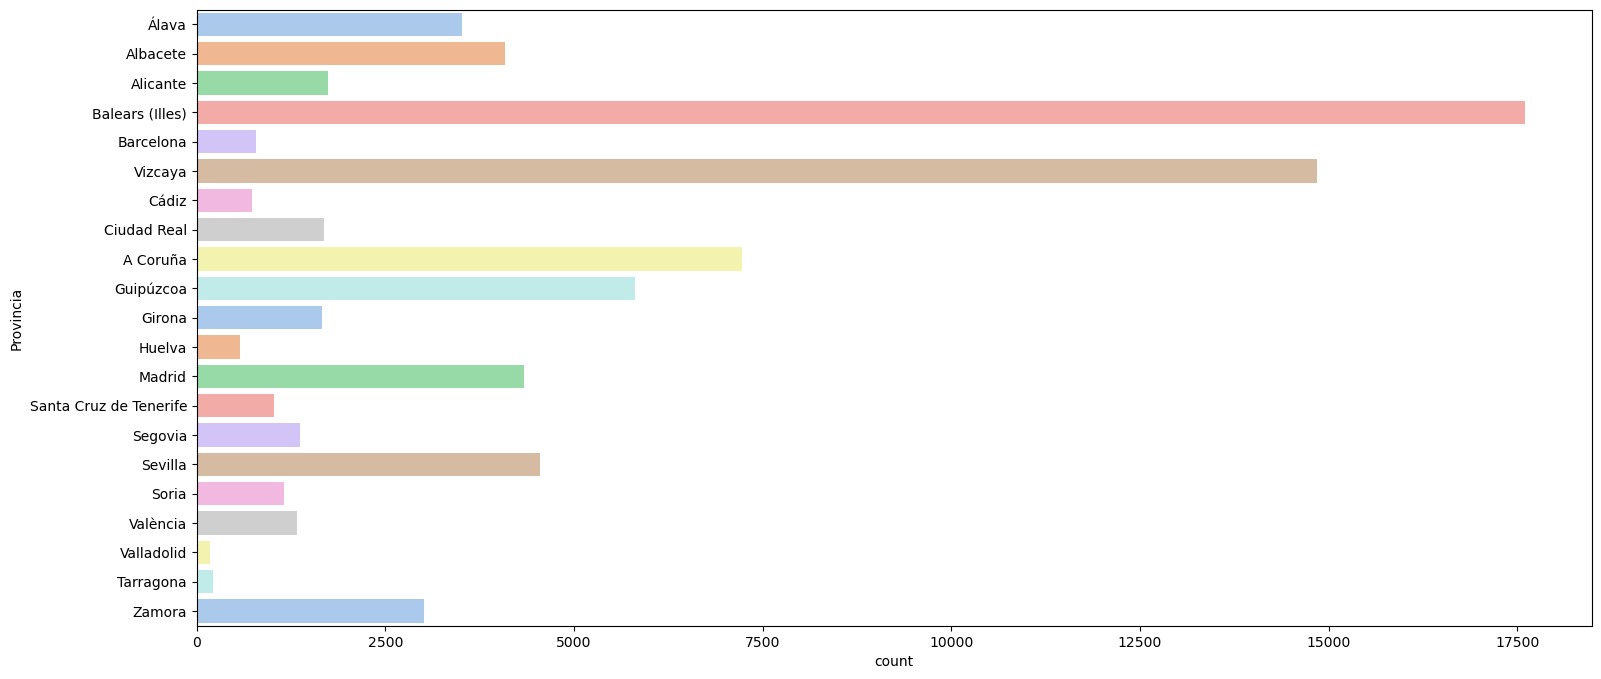

In [107]:
# se evaluara el hacer un rebalanceo a la hora de modelar
plt.figure(figsize=(18,8))
sns.countplot(data=DF, y=DF['Provincia'],palette="pastel")

Se evaluara el rebalanceo de los datos en la fase de modelaje

#**7-Estudiamos la ditribucion de nuestra variable respuesta ‘precio_m2’  y la estandarizamos**

<AxesSubplot:xlabel='precio_m2'>

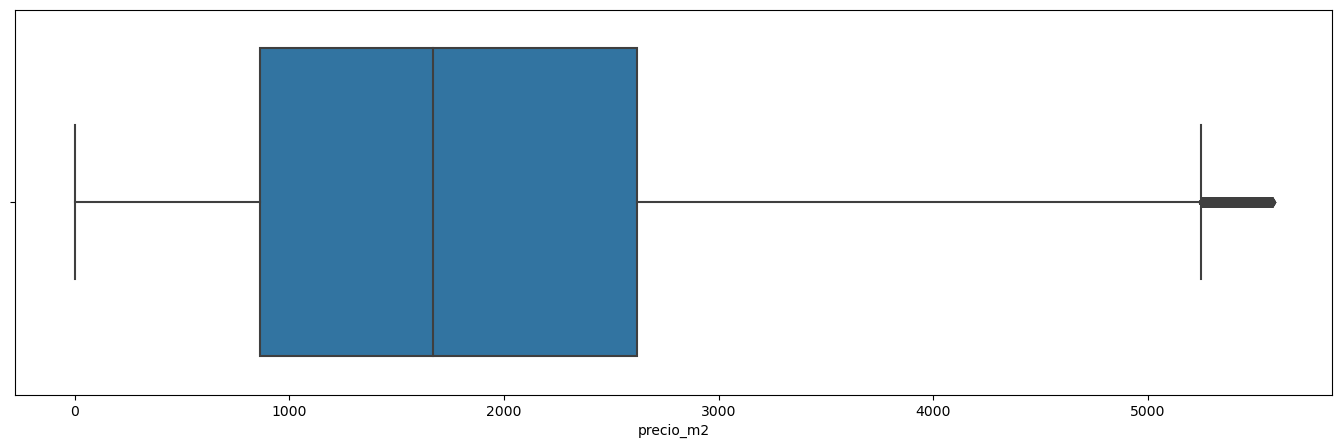

In [108]:
 # Hacemos nuevamente el boxplot de precio_m2 para divisar nuestros datos 
plt.figure(figsize=(17,5))
sns.boxplot(data=DF, x=DF['precio_m2'])

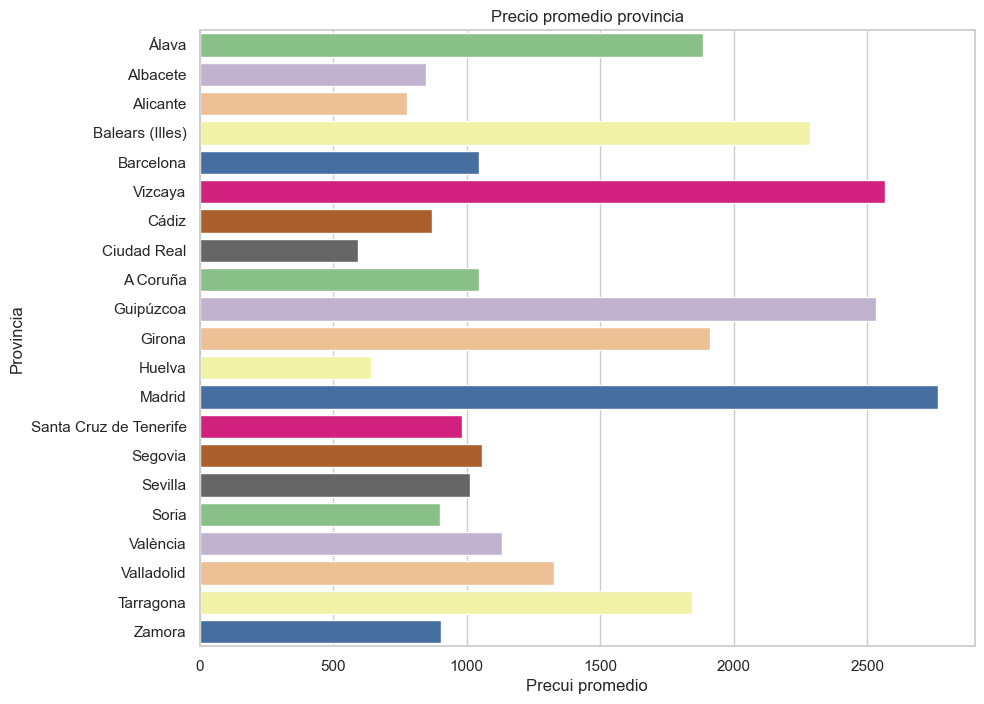

In [109]:
# vamos a ver el precio promedio por provincia 
means = {}


for province in DF['Provincia'].unique():
    province_data = DF[DF['Provincia'] == province]
    means[province] = province_data['precio_m2'].mean()
    
# Convert the means dictionary to a Pandas Series object for plotting
means_series = pd.Series(means)

plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')
sns.barplot(x=means_series.values, y=means_series.index, palette='Accent')

# Add labels and title to the graph
plt.xlabel('Precui promedio')
plt.ylabel('Provincia')
plt.title('Precio promedio provincia')

# Display the graph
plt.show()

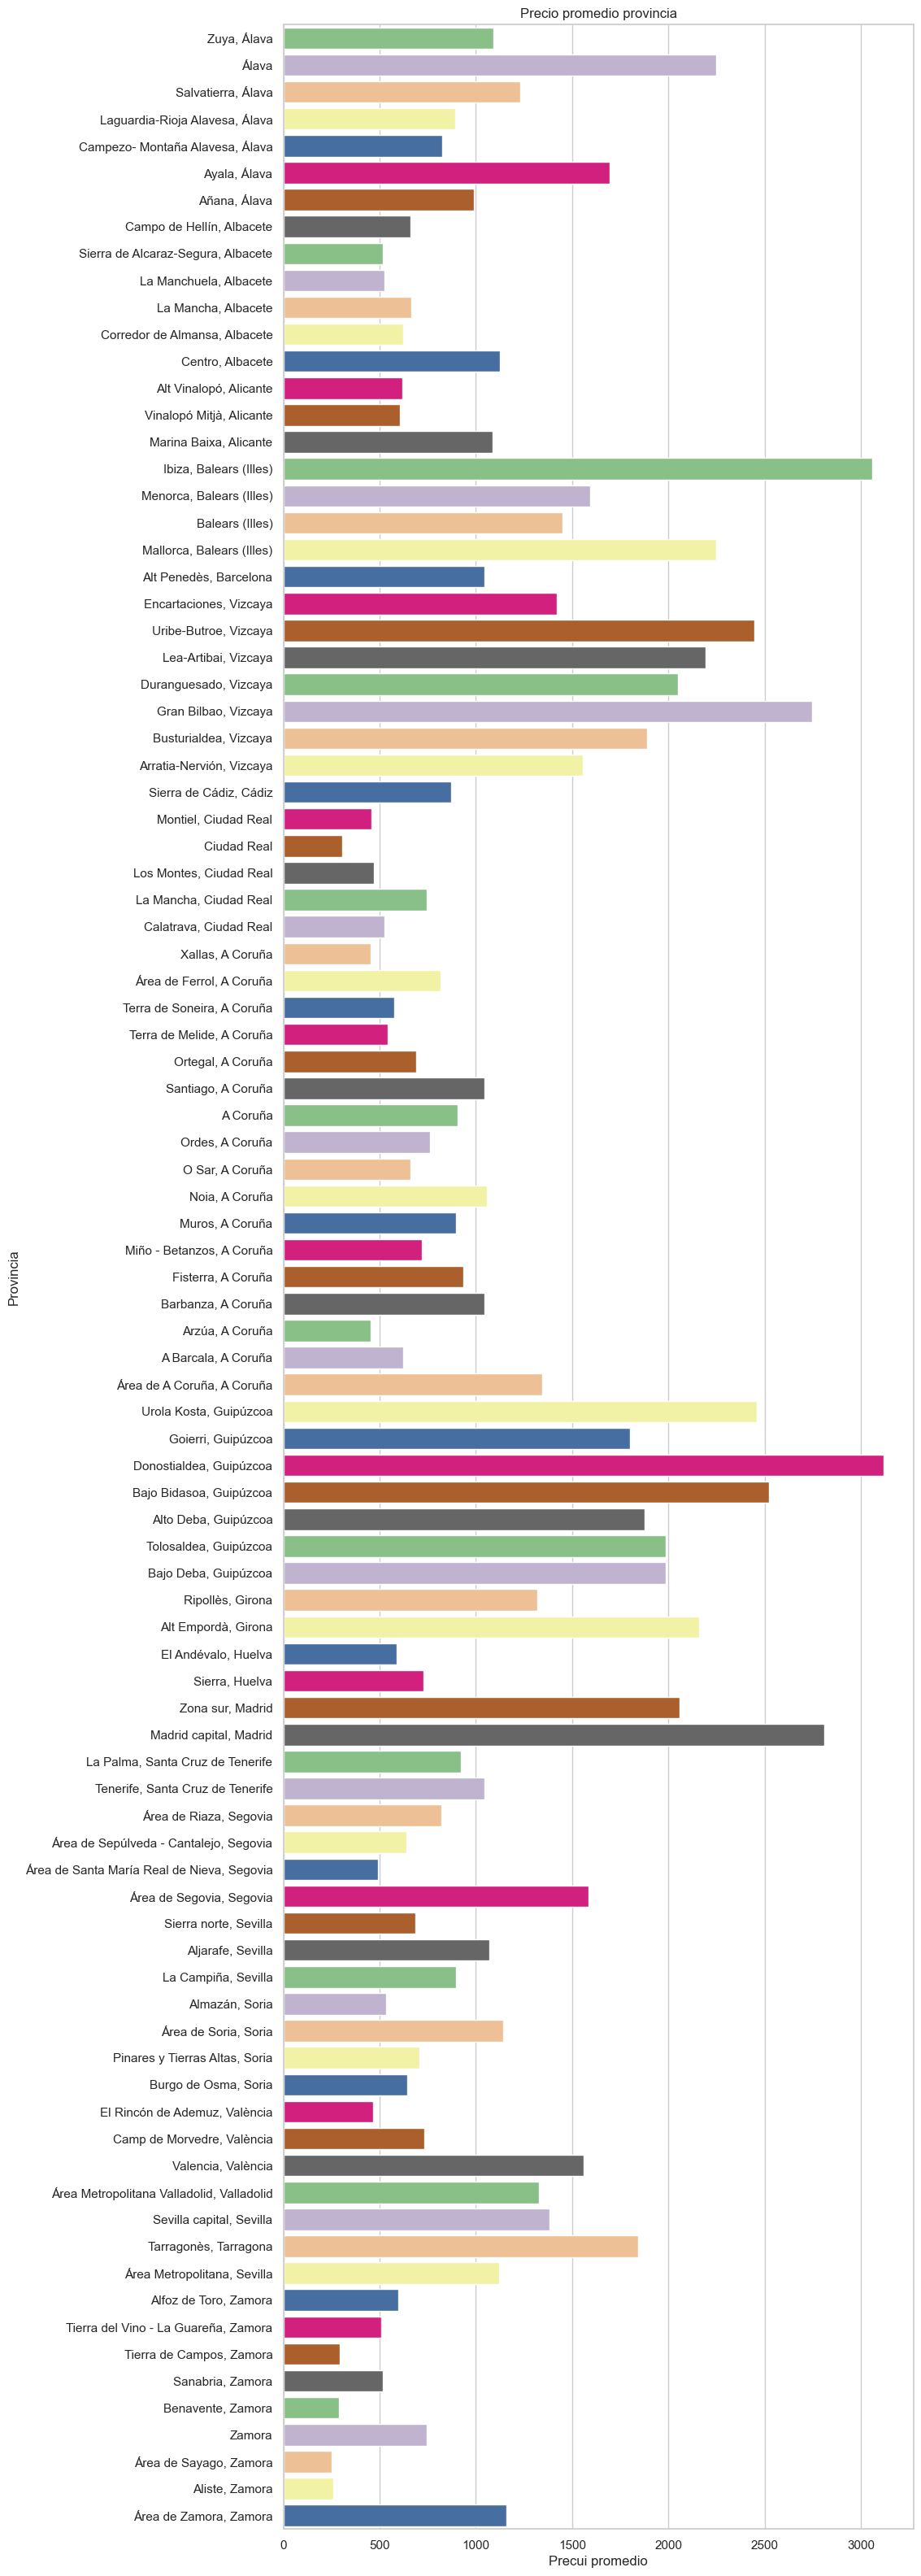

In [110]:
# vamos a ver el precio promedio por provincia 
means = {}


for province in DF['loc_zone'].unique():
    province_data = DF[DF['loc_zone'] == province]
    means[province] = province_data['precio_m2'].mean()
    
# Convert the means dictionary to a Pandas Series object for plotting
means_series = pd.Series(means)

plt.figure(figsize=(10, 40))
sns.set(style='whitegrid')
sns.barplot(x=means_series.values, y=means_series.index, palette='Accent')

# Add labels and title to the graph
plt.xlabel('Precui promedio')
plt.ylabel('Provincia')
plt.title('Precio promedio provincia')

# Display the graph
plt.show()


<AxesSubplot:xlabel='Provincia', ylabel='precio_m2'>

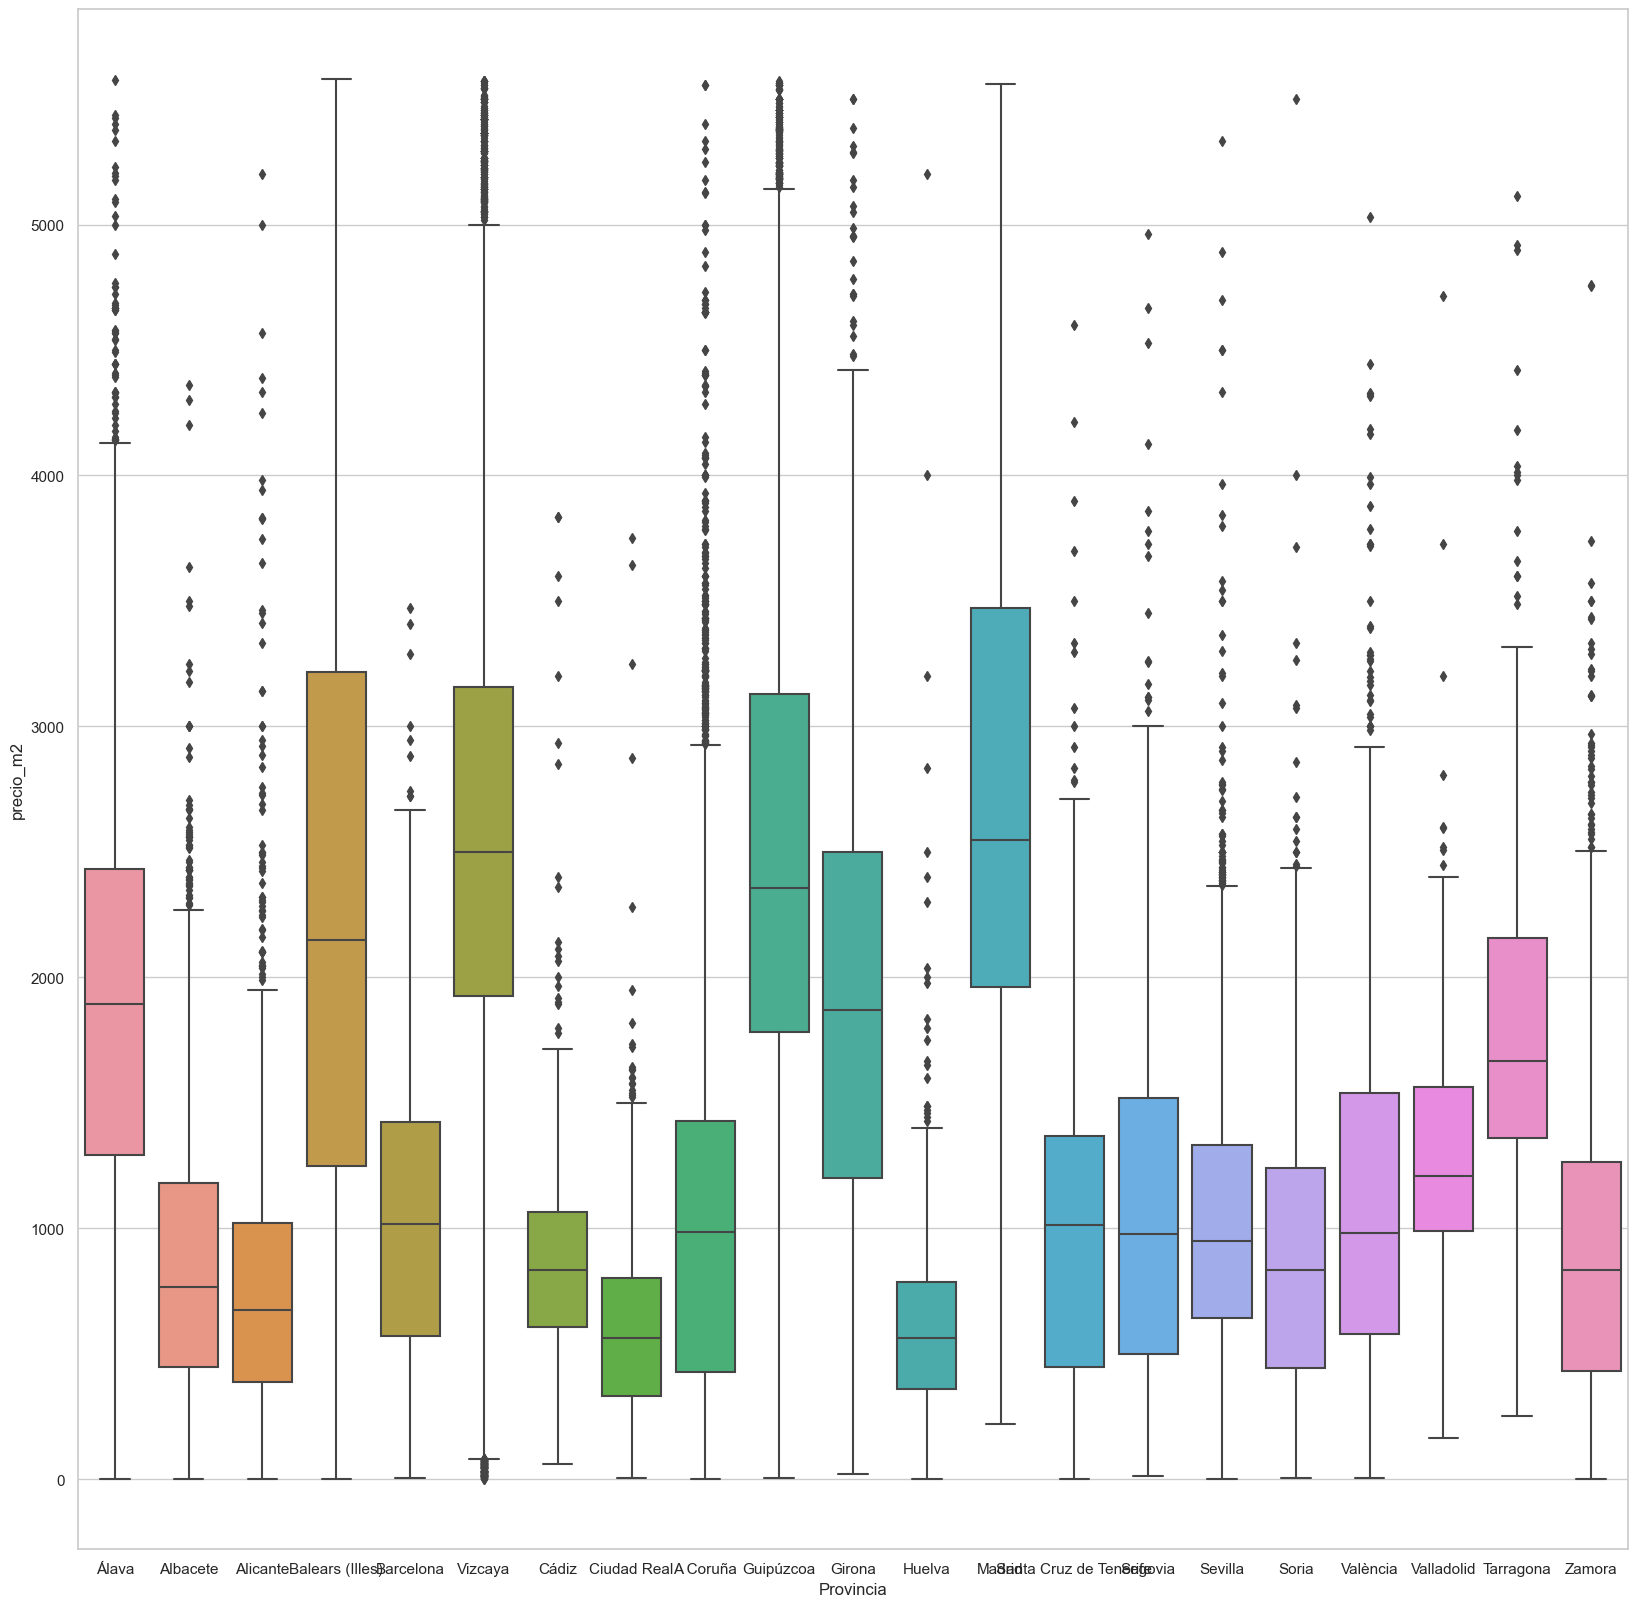

In [111]:
# se profundiza el analisis de precios limpiando los outliers por provincia
plt.figure(figsize=(20,20))
sns.boxplot(data=DF, x= 'Provincia', y='precio_m2')

In [112]:
#Considerando la cantidad de valores que tenemos en algunos municipios decidimos eliminar los outliers iterando en cada uno de estos

In [113]:
provincias = ['Vizcaya','Balears (Illes)','A Coruña','Guipúzcoa','Sevilla','Madrid','Albacete','Álava','Zamora','Alicante',
              'Ciudad Real','Girona','Segovia','València','Soria','Santa Cruz de Tenerife','Barcelona','Cádiz','Huelva',
             'Tarragona','Valladolid']

for provincia in provincias:
    Q1 = DF.loc[DF['Provincia'] == provincia, 'precio_m2'].quantile(0.25)
    Q3 = DF.loc[DF['Provincia'] == provincia, 'precio_m2'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    DF = DF.loc[(DF['Provincia'] != provincia) | ((DF['Provincia'] == provincia) & (DF['precio_m2'] > lower_bound) & (DF['precio_m2'] < upper_bound))]


<AxesSubplot:xlabel='Provincia', ylabel='precio_m2'>

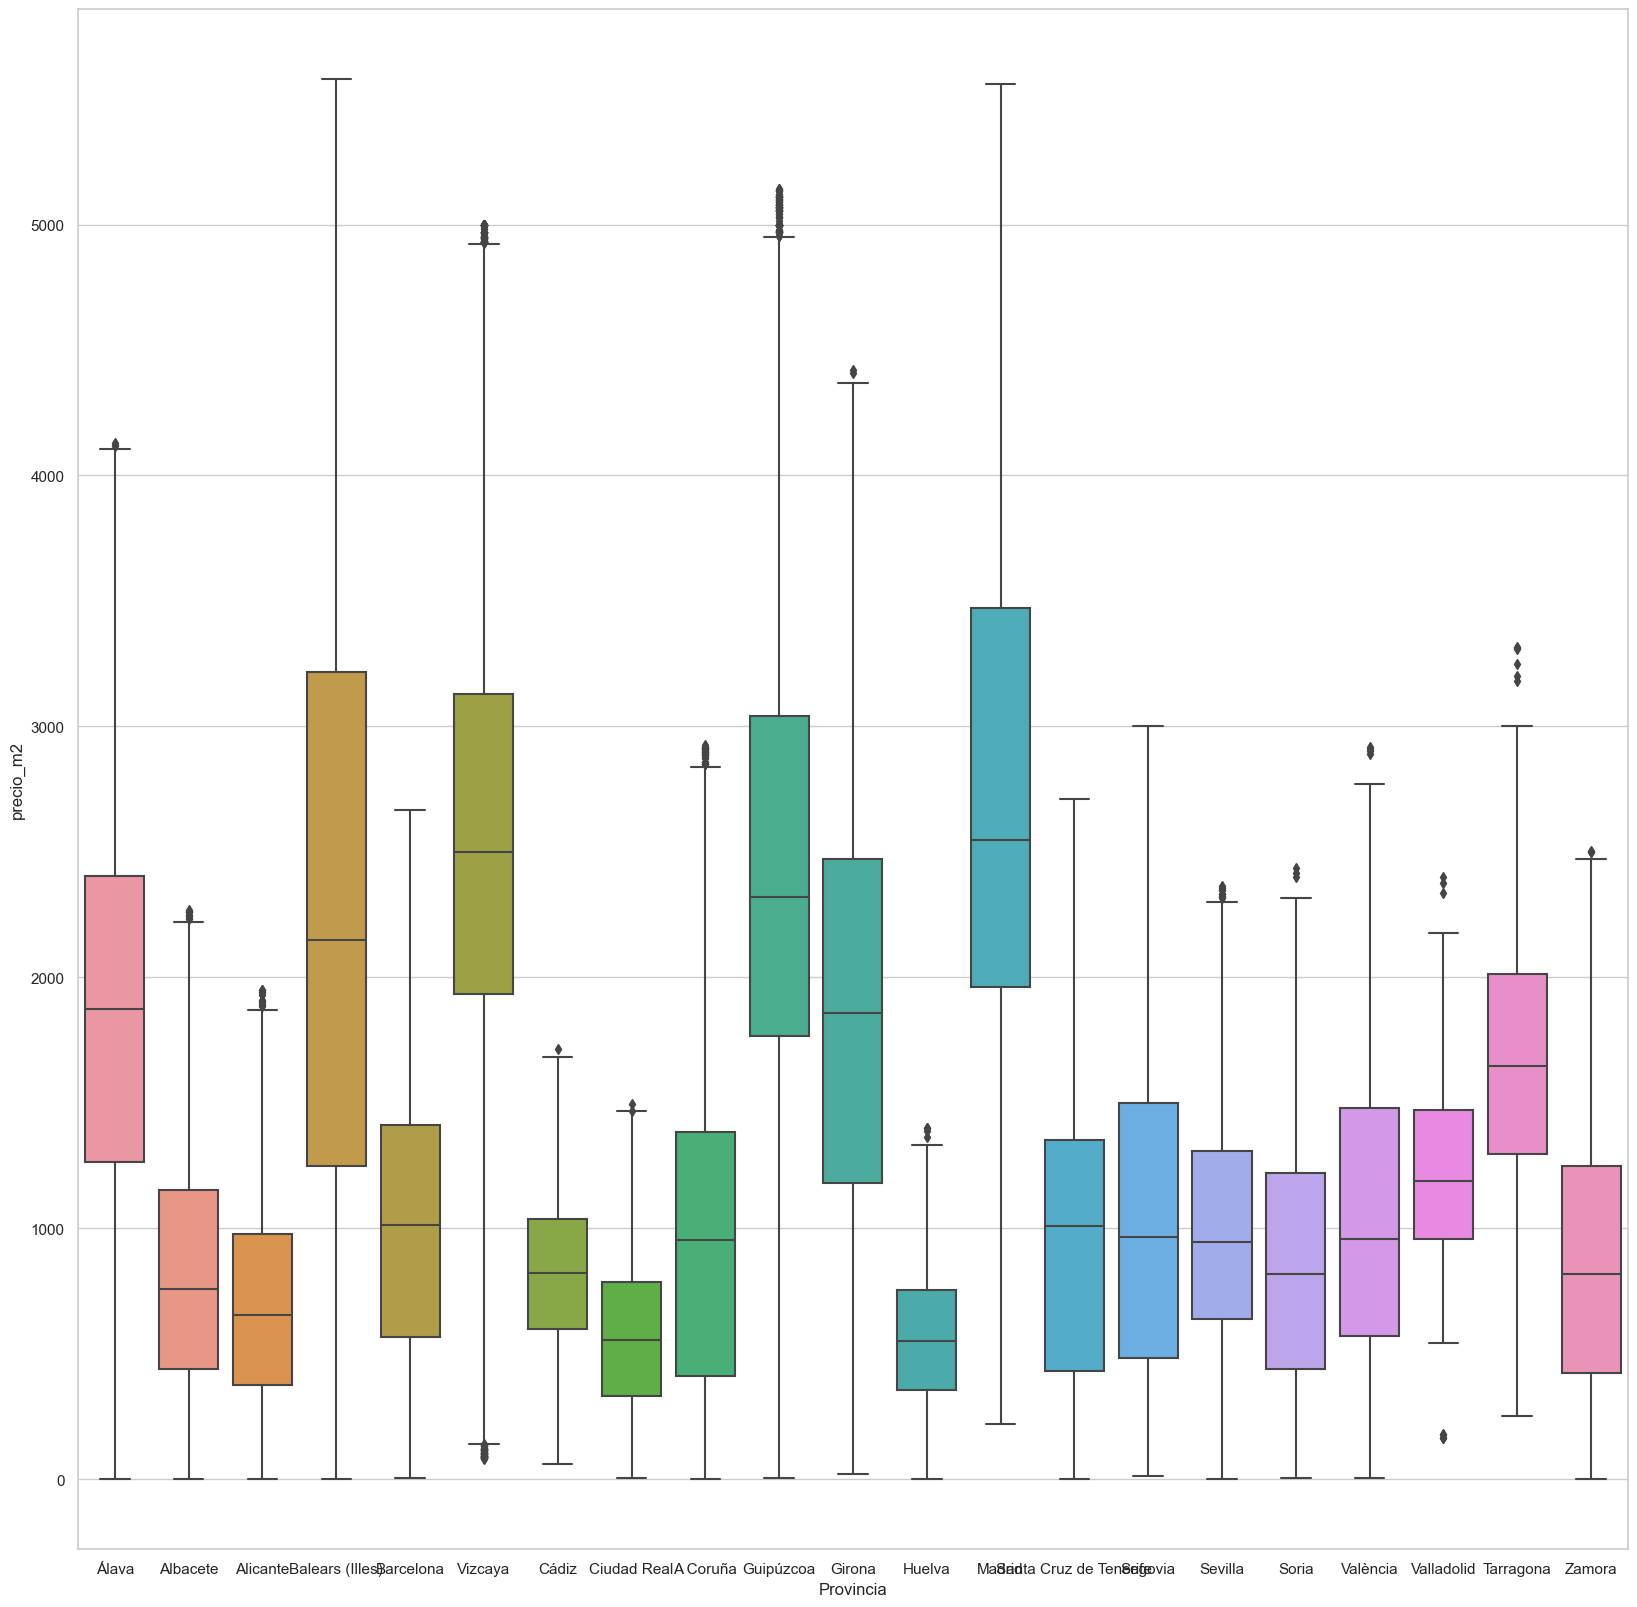

In [114]:
plt.figure(figsize=(20,20))
sns.boxplot(data=DF, x= 'Provincia', y='precio_m2')

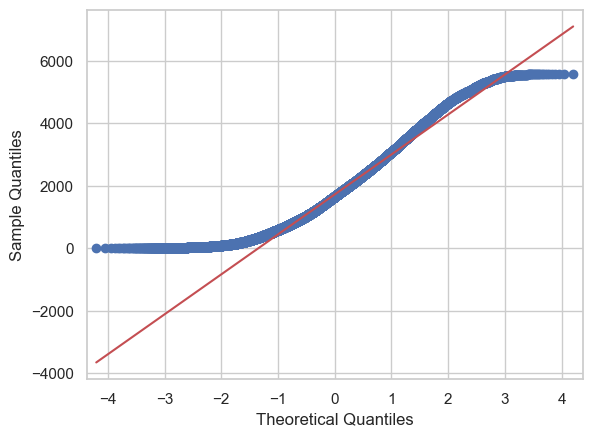

In [115]:
# Hacemos un Q-Q plot para visualizar la normalidad de los datos 

sm.qqplot(DF['precio_m2'], line='q')
plt.show()

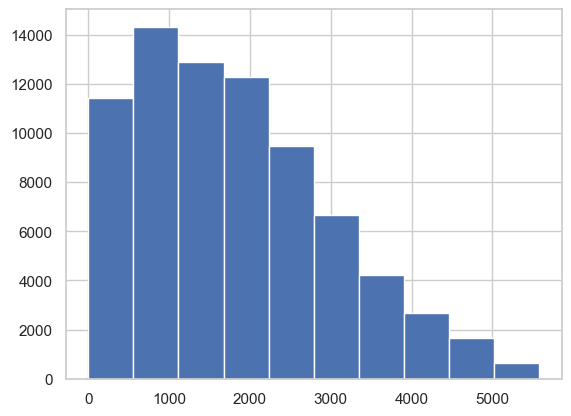

In [116]:
#Hacemos un histograma

plt.hist(DF['precio_m2'])
plt.show()

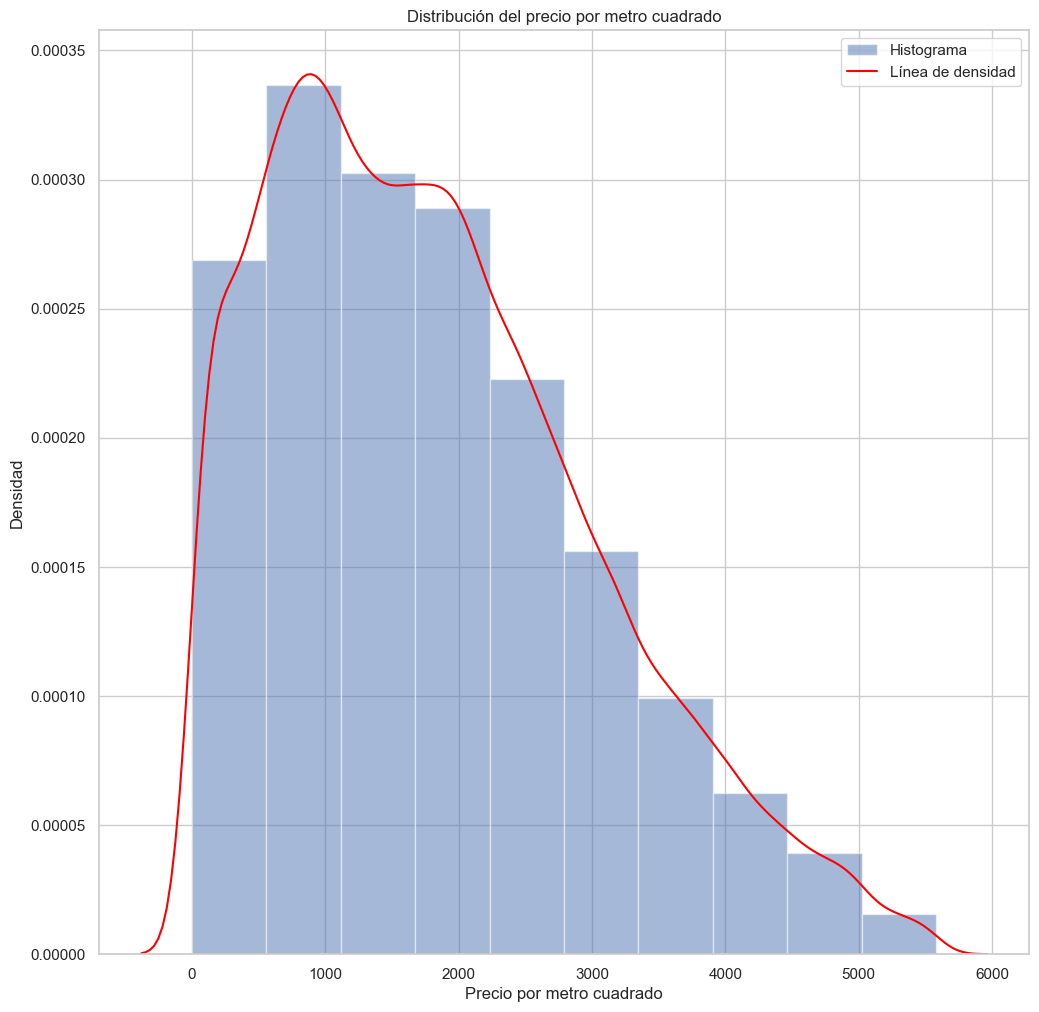

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la figura con un tamaño personalizado
plt.figure(figsize=(12, 12))

# Crear el histograma
plt.hist(DF['precio_m2'], density=True, alpha=0.5, label='Histograma')

# Crear la línea de densidad
sns.kdeplot(data=DF['precio_m2'], color='red', label='Línea de densidad')

# Agregar etiquetas y título
plt.xlabel('Precio por metro cuadrado')
plt.ylabel('Densidad')
plt.title('Distribución del precio por metro cuadrado')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()



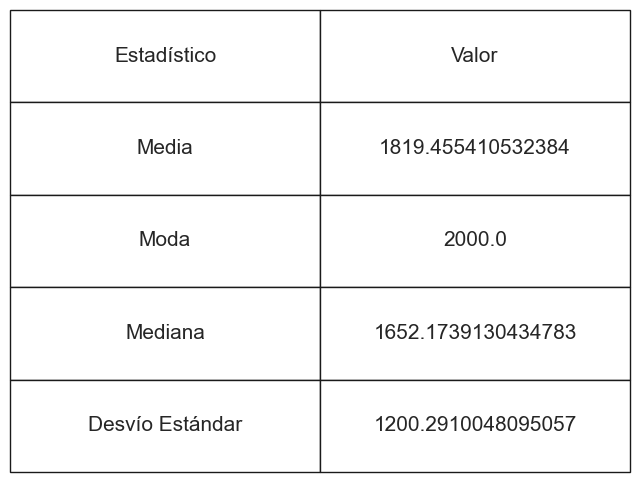

In [118]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calcular estadísticas de resumen
mean_value = np.mean(DF['precio_m2'])
mode_value = DF['precio_m2'].mode().values[0]
median_value = np.median(DF['precio_m2'])
std_value = np.std(DF['precio_m2'])

# Crear un DataFrame para almacenar las estadísticas
summary_df = pd.DataFrame({'Estadístico': ['Media', 'Moda', 'Mediana', 'Desvío Estándar'],
                           'Valor': [mean_value, mode_value, median_value, std_value]})

# Crear la figura y el cuadro de estadísticas separado con un tamaño más grande
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')  # Desactivar los ejes del gráfico

# Crear la tabla con los estadísticos
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center',
                 colWidths=[0.3, 0.3], bbox=[0, 0, 1, 1])

# Ajustar el tamaño de las celdas y el texto
table.set_fontsize(15)
table.scale(3, 3)

# Mostrar el cuadro de estadísticas
plt.show()


In [119]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76228 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_description     72415 non-null  object 
 1   ad_last_update     76228 non-null  object 
 2   air_conditioner    76228 non-null  int64  
 3   balcony            76228 non-null  int64  
 4   bath_num           76228 non-null  int64  
 5   built_in_wardrobe  76228 non-null  int64  
 6   chimney            76228 non-null  int64  
 7   condition          76228 non-null  object 
 8   energetic_certif   76228 non-null  object 
 9   floor              76228 non-null  object 
 10  garden             76228 non-null  int64  
 11  house_type         76228 non-null  object 
 12  lift               76228 non-null  float64
 13  loc_city           76228 non-null  object 
 14  loc_district       66638 non-null  object 
 15  loc_full           76228 non-null  object 
 16  loc_zone           762

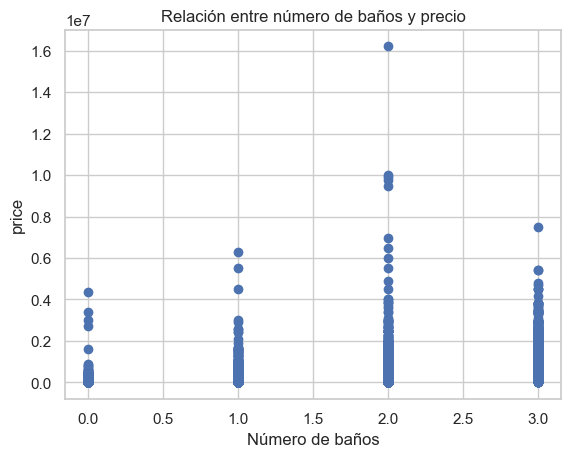

In [120]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.scatter(DF['bath_num'], DF['price'])

# Agregar etiquetas y título
plt.xlabel('Número de baños')
plt.ylabel('price')
plt.title('Relación entre número de baños y precio')

# Mostrar el gráfico
plt.show()


***PRE MODELAJE***

In [121]:
# Pasamos a estandarizar los datos de precio por metro cuadrado
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [122]:
precio_m2_std = scaler.fit_transform(DF['precio_m2'].values.reshape(-1,1))

In [123]:
DF['precio_m2_std'] = precio_m2_std

In [124]:
# Chequeamos 
print(DF['precio_m2_std'])

0       -1.257575
1       -0.169273
2       -1.382544
3       -0.062709
4       -0.529242
           ...   
99993   -1.282568
99994   -1.203421
99995   -1.460303
99998   -1.159658
99999   -0.963654
Name: precio_m2_std, Length: 76228, dtype: float64


In [125]:
print(DF.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76228 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_description     72415 non-null  object 
 1   ad_last_update     76228 non-null  object 
 2   air_conditioner    76228 non-null  int64  
 3   balcony            76228 non-null  int64  
 4   bath_num           76228 non-null  int64  
 5   built_in_wardrobe  76228 non-null  int64  
 6   chimney            76228 non-null  int64  
 7   condition          76228 non-null  object 
 8   energetic_certif   76228 non-null  object 
 9   floor              76228 non-null  object 
 10  garden             76228 non-null  int64  
 11  house_type         76228 non-null  object 
 12  lift               76228 non-null  float64
 13  loc_city           76228 non-null  object 
 14  loc_district       66638 non-null  object 
 15  loc_full           76228 non-null  object 
 16  loc_zone           762

In [126]:
DF.isna().sum()

ad_description       3813
ad_last_update          0
air_conditioner         0
balcony                 0
bath_num                0
built_in_wardrobe       0
chimney                 0
condition               0
energetic_certif        0
floor                   0
garden                  0
house_type              0
lift                    0
loc_city                0
loc_district         9590
loc_full                0
loc_zone                0
m2_real                 0
price                   0
reduced_mobility        0
room_num                0
storage_room            0
swimming_pool           0
terrace                 0
Plantas                 0
precio_m2               0
Provincia               0
precio_m2_std           0
dtype: int64

***MODELAJE***


**Red Neuronal**

In [127]:
DF_copia=DF.copy()


In [128]:
DF_copia

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,energetic_certif,floor,...,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,Plantas,precio_m2,Provincia,precio_m2_std
0,Precio chalet individual en la localidad de Ab...,Anuncio actualizado el 27 de marzo,0,0,2,0,0,segunda mano/buen estado,en trámite,0,...,310000,0,4,0,0,1,2 plantas,310.000000,Álava,-1.257575
1,"Atico de 80m2, para entrar a vivir, con salón ...",más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,no indicado,planta 2ª exterior,...,139000,1,3,1,0,0,0,1616.279070,Álava,-0.169273
2,B/ Etxaguen. Casa de reciente construcción con...,más de 5 meses sin actualizar,0,0,3,0,0,segunda mano/buen estado,no indicado,0,...,480000,0,4,1,0,1,3 plantas,160.000000,Álava,-1.382544
3,Se vende vivienda en abornikano (ayuntamiento ...,más de 5 meses sin actualizar,0,1,1,1,1,segunda mano/buen estado,en trámite,0,...,150000,0,4,1,0,1,3 plantas,1744.186047,Álava,-0.062709
4,Negociables.,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,no indicado,planta 1ª exterior,...,90000,0,2,1,1,1,0,1184.210526,Álava,-0.529242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,Casa en Villar de Fallaves zona VILLANUEVA DEL...,Anuncio actualizado el 27 de septiembre,0,0,2,0,0,promoción de obra nueva,no indicado,0,...,42000,0,2,0,0,0,2 plantas,280.000000,Zamora,-1.282568
99994,NaN,Anuncio actualizado el 29 de noviembre,0,0,1,0,0,segunda mano/para reformar,no indicado,0,...,30000,0,3,0,0,0,2 plantas,375.000000,Zamora,-1.203421
99995,casa de pueblo con patio.,Anuncio actualizado el 29 de enero,0,0,1,0,0,segunda mano/para reformar,no indicado,0,...,20000,0,3,0,0,0,2 plantas,66.666667,Zamora,-1.460303
99998,Inmueble de 89 m² ubicado en ZAMORA (Zamora).,Anuncio actualizado el 10 de abril,0,0,2,0,0,segunda mano/buen estado,no indicado,planta 1ª exterior,...,38050,0,3,0,0,0,0,427.528090,Zamora,-1.159658


Los siguientes valores, según detectamos más arriba tienen un alto porcentaje de valores nulos que podrían afectar a la predicción por lo que decidimos no considerar como variables predictoras: garage, lift, construct_date, ad_description, orientation y heating.

Además las variables que tampoco son consideradas se datallan mas abajo con los motivos:

- loc_full: informacion de la ubicacion de la viviendas, la cual ya nos muestra en la variable loc_zone
- m2_real, price, precio_m2 y precio_m2_std: variables que son reduntantes al modelo.
- ad_last_update: informacion adicional sobre la generacion del dato de la vivienda, nada relevante para la prediccion.
- obtention_date: informacion adicional sobre la generacion del dato de la vivienda, nada relevante para la prediccion.

In [129]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76228 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_description     72415 non-null  object 
 1   ad_last_update     76228 non-null  object 
 2   air_conditioner    76228 non-null  int64  
 3   balcony            76228 non-null  int64  
 4   bath_num           76228 non-null  int64  
 5   built_in_wardrobe  76228 non-null  int64  
 6   chimney            76228 non-null  int64  
 7   condition          76228 non-null  object 
 8   energetic_certif   76228 non-null  object 
 9   floor              76228 non-null  object 
 10  garden             76228 non-null  int64  
 11  house_type         76228 non-null  object 
 12  lift               76228 non-null  float64
 13  loc_city           76228 non-null  object 
 14  loc_district       66638 non-null  object 
 15  loc_full           76228 non-null  object 
 16  loc_zone           762

In [130]:
DF['Provincia']

0         Álava
1         Álava
2         Álava
3         Álava
4         Álava
          ...  
99993    Zamora
99994    Zamora
99995    Zamora
99998    Zamora
99999    Zamora
Name: Provincia, Length: 76228, dtype: object

In [131]:


column_names = DF.drop(['loc_full','m2_real','price','ad_description','ad_last_update','precio_m2','precio_m2_std','loc_district'], axis=1).columns.tolist()


In [132]:
#Vamos a codificar las siguientes variables para poder procesarlas con el modelo
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [133]:
# codifico en floor y planntas como string (ver)

DF['floor'] = DF['floor'].astype(str)
DF['Plantas'] = DF['Plantas'].astype(str)


In [134]:
DF['energetic_certif']= le.fit_transform(DF['energetic_certif'])
DF['condition']= le.fit_transform(DF['condition'])
DF['Provincia']= le.fit_transform(DF['Provincia'])
DF['house_type']= le.fit_transform(DF['house_type'])
DF['loc_city']= le.fit_transform(DF['loc_city'])
DF['loc_zone']= le.fit_transform(DF['loc_zone'])
DF['floor']= le.fit_transform(DF['floor'])
DF['Plantas']= le.fit_transform(DF['Plantas'])
#DF['loc_district']= le.fit_transform(DF['loc_district'])
DF['lift']= le.fit_transform(DF['lift'])

In [135]:
#A fin de tener el dataset final utilizado decidimos exportar el DF en excel.
DF.to_excel('Data_set_DL.xlsx', sheet_name='datasetprueba', index=False)


In [136]:
#Definimos X e y

X = DF.drop(['loc_full','m2_real','price','ad_description','ad_last_update','precio_m2','precio_m2_std','loc_district'],axis=1).values


y = DF["precio_m2_std"]

In [137]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [138]:
# dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Se correra un modelo sencillo de una sola capa con neuronas= 32 , activacion ='relu'. loss=  'mean squared error', epocs = 100 y
batch_size= 32. Al que poseteriormente se les aplicara un grid search para ver los parametros optimos.

In [139]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(32, activation='relu',kernel_initializer='random_normal'),
    tf.keras.layers.Dense(1)])

Aquí se configura el proceso de entrenamiento del modelo. Se especifica el hiperparametro  'adam'. La función de pérdida se establece en 'mean_squared_error', que es adecuada para problemas de regresión. Además, se definen las métricas a calcular durante el entrenamiento, en este caso, el error absoluto medio ('mae') y el error cuadrático medio ('mse').

In [140]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])


In [141]:
X

array([[ 0,  0,  2, ...,  1,  2, 20],
       [ 0,  0,  2, ...,  0,  0, 20],
       [ 0,  0,  3, ...,  1,  3, 20],
       ...,
       [ 0,  0,  1, ...,  0,  2, 19],
       [ 0,  0,  2, ...,  0,  0, 19],
       [ 0,  0,  1, ...,  1,  0, 19]], dtype=int64)

El modelo se correra por 100 epocas y se utilizaran lotes de 32 inicialmente para entrenarlo.

In [142]:
# entrenar el modelo
red_neuronal = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1906/1906 [==============================] - 3s 1ms/step - loss: 0.8033 - mae: 0.6856 - mse: 0.8033 - val_loss: 0.7065 - val_mae: 0.6847 - val_mse: 0.7065
Epoch 2/100
1906/1906 [==============================] - 2s 1ms/step - loss: 0.6959 - mae: 0.6514 - mse: 0.6959 - val_loss: 0.5911 - val_mae: 0.5993 - val_mse: 0.5911
Epoch 3/100
1906/1906 [==============================] - 2s 1ms/step - loss: 0.6561 - mae: 0.6325 - mse: 0.6561 - val_loss: 1.0170 - val_mae: 0.8438 - val_mse: 1.0170
Epoch 4/100
1906/1906 [==============================] - 2s 1ms/step - loss: 0.6380 - mae: 0.6209 - mse: 0.6380 - val_loss: 0.8639 - val_mae: 0.7761 - val_mse: 0.8639
Epoch 5/100
1906/1906 [==============================] - 2s 980us/step - loss: 0.6265 - mae: 0.6147 - mse: 0.6265 - val_loss: 0.5572 - val_mae: 0.5835 - val_mse: 0.5572
Epoch 6/100
1906/1906 [==============================] - 2s 1ms/step - loss: 0.6002 - mae: 0.6015 - mse: 0.6002 - val_loss: 0.5907 - val_mae: 0.6136 - val_mse: 0.5

In [143]:
y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

# Tiene un MSE de 0.47024 
# A continuacion se realizaran algunas visualizaciones.

477/477 [==============================] - 0s 610us/step
MAE: 0.5124889678087446
MSE: 0.4660228338776316


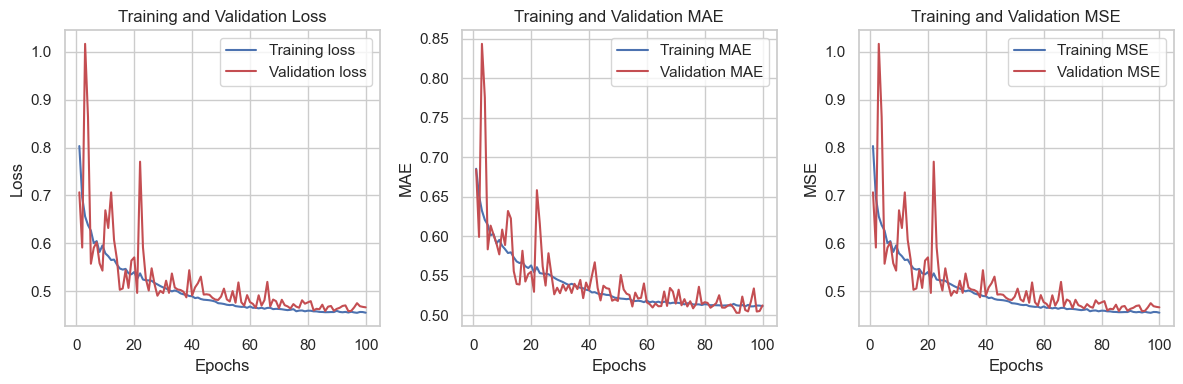

In [144]:
#VISUALIZACION

#Obtener las métricas de rendimiento y la pérdida del historial
loss = red_neuronal.history['loss']
val_loss = red_neuronal.history['val_loss']
mae = red_neuronal.history['mae']
val_mae = red_neuronal.history['val_mae']
mse = red_neuronal.history['mse']
val_mse = red_neuronal.history['val_mse']

#Graficar las curvas de pérdida y métricas
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

#Curva de pérdida
plt.subplot(1, 3, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#mae
plt.subplot(1, 3, 2)
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

#mse
plt.subplot(1, 3, 3)
plt.plot(epochs, mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

# Se puede observar que si bien a la larga converge tarda en ajustarse a los datos en un principio. 

Se procede a hacer un grid search de los parametros: 'batch_size', 'layers' y 'neuronas'

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

#Se genera una funcion para definir el modelo a utilizar
def create_model(layers, neurons):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neurons, activation='relu', kernel_initializer='random_normal', input_dim=X_train.shape[1]))
    for _ in range(layers-1):
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

#modelo de KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

#Definimos los valores de los hiperparámetros a explorar
param_grid = {
    'batch_size': [32, 64, 128],
    'layers': [2, 3, 4],
    'neurons': [64, 128, 256]
}

#Realizamos grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train)

#Generamos variables para los mejores resultados
best_params = grid_result.best_params_
best_score = -grid_result.best_score_

print("Mejores parámetros encontrados:", best_params)
print("Mejor puntuación obtenida:", best_score)


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_12412\1498982423.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Podemos observar que se nos recomienda mantener el 'batch_size' en  32, aumentar el numero de capaz en 4 y las neuronas por capa a 256. En este caso como solo se requiere cambiar uno cambiaremos las capaz a 4 mantendremos el numero de las neuronas .

In [620]:
X = DF.drop(['loc_full','m2_real','price','ad_description','ad_last_update','precio_m2','precio_m2_std','loc_district'],axis=1).values


y = DF["precio_m2_std"]

In [621]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [622]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(32, activation='relu',kernel_initializer='random_normal'),tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)])

In [623]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])


In [624]:
#entrenar el modelo
red_neuronal = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
1906/1906 [==============================] - 3s 1ms/step - loss: 0.9764 - mae: 0.6916 - mse: 0.9764 - val_loss: 0.6904 - val_mae: 0.6763 - val_mse: 0.6904
Epoch 2/100
1906/1906 [==============================] - 2s 959us/step - loss: 0.5953 - mae: 0.5979 - mse: 0.5953 - val_loss: 0.6025 - val_mae: 0.5796 - val_mse: 0.6025
Epoch 3/100
1906/1906 [==============================] - 2s 958us/step - loss: 0.5493 - mae: 0.5685 - mse: 0.5493 - val_loss: 0.5712 - val_mae: 0.6000 - val_mse: 0.5712
Epoch 4/100
1906/1906 [==============================] - 2s 951us/step - loss: 0.5169 - mae: 0.5478 - mse: 0.5169 - val_loss: 0.5240 - val_mae: 0.5558 - val_mse: 0.5240
Epoch 5/100
1906/1906 [==============================] - 2s 936us/step - loss: 0.5071 - mae: 0.5413 - mse: 0.5071 - val_loss: 0.5016 - val_mae: 0.5267 - val_mse: 0.5016
Epoch 6/100
1906/1906 [==============================] - 2s 947us/step - loss: 0.4974 - mae: 0.5346 - mse: 0.4974 - val_loss: 0.4920 - val_mae: 0.5336 - val_

In [625]:
y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
# Se puede observara que el hay una clara mejoria luego de hecho el Grid search
# el MSE paso de 0.47 a 0.35
# A continuacion se visualizara la evolucion de la red neuronal .

477/477 [==============================] - 0s 539us/step
MAE: 0.43624181300049925
MSE: 0.357811956916802


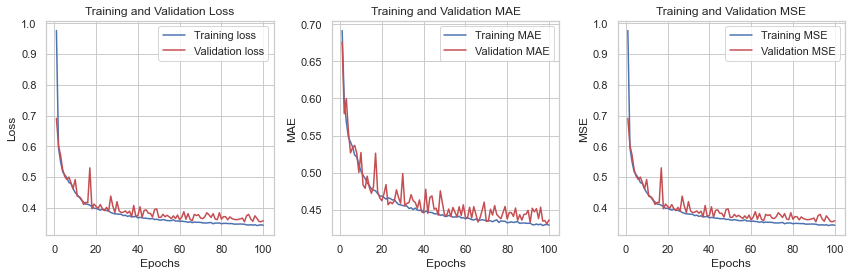

In [626]:
# VISUALIZACION

#Se obtiene las métricas de rendimiento y la pérdida del historial
loss = red_neuronal.history['loss']
val_loss = red_neuronal.history['val_loss']
mae = red_neuronal.history['mae']
val_mae = red_neuronal.history['val_mae']
mse = red_neuronal.history['mse']
val_mse = red_neuronal.history['val_mse']

#Se grafica las curvas de pérdida y métricas
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

#Curvas de pérdida
plt.subplot(1, 3, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#mae
plt.subplot(1, 3, 2)
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

#mse
plt.subplot(1, 3, 3)
plt.plot(epochs, mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


Si bien pareciera que el tener mas capas provoca que el modelo se ajuste mejor a los datos tenemos indicios graficos
para pensar que estamos sufriendo de overfitting. Se recurrira a una regularizacion de los hiperparametros
para poder aplicar estos efectos y mitigar el sobreajuste.

Se agregara una capa de regularizacion, kernel_regularizer=regularizers.l2 ,  entre cada neurona para ver tratar el problema de el sobre ajuste. Se regularizara usando ridge

In [654]:
X = DF.drop(['loc_full','m2_real','price','ad_description','ad_last_update','precio_m2','precio_m2_std','loc_district'],axis=1).values


y = DF["precio_m2_std"]



In [655]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [656]:
from tensorflow.keras import regularizers

model_reg = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), kernel_initializer='random_normal'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)])

model_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])


In [657]:
red_neuronal_reg = model_reg.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
1906/1906 [==============================] - 3s 1ms/step - loss: 0.7337 - mae: 0.6589 - mse: 0.7188 - val_loss: 0.6819 - val_mae: 0.6599 - val_mse: 0.6619
Epoch 2/100
1906/1906 [==============================] - 2s 949us/step - loss: 0.6153 - mae: 0.5955 - mse: 0.5924 - val_loss: 0.5635 - val_mae: 0.5649 - val_mse: 0.5383
Epoch 3/100
1906/1906 [==============================] - 2s 933us/step - loss: 0.5834 - mae: 0.5752 - mse: 0.5578 - val_loss: 0.5370 - val_mae: 0.5474 - val_mse: 0.5110
Epoch 4/100
1906/1906 [==============================] - 2s 934us/step - loss: 0.5581 - mae: 0.5575 - mse: 0.5321 - val_loss: 0.5509 - val_mae: 0.5688 - val_mse: 0.5249
Epoch 5/100
1906/1906 [==============================] - 2s 928us/step - loss: 0.5403 - mae: 0.5463 - mse: 0.5135 - val_loss: 0.5166 - val_mae: 0.5177 - val_mse: 0.4899
Epoch 6/100
1906/1906 [==============================] - 2s 989us/step - loss: 0.5302 - mae: 0.5392 - mse: 0.5033 - val_loss: 0.5173 - val_mae: 0.5437 - val_

In [658]:
y_pred = model_reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))


477/477 [==============================] - 0s 531us/step
MAE: 0.4543863312716963
MSE: 0.38339288091219503


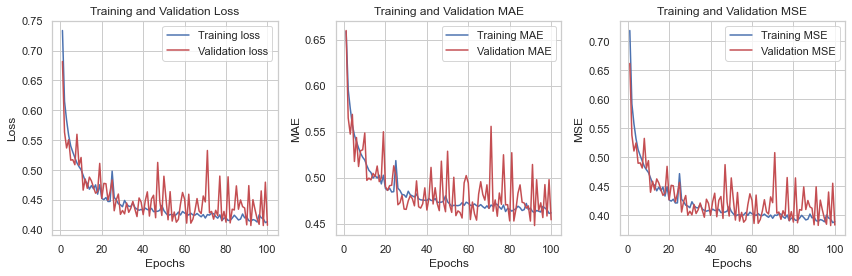

In [659]:
# VISUALIZACION

#Se obtiene las métricas de rendimiento y la pérdida del historial
loss = red_neuronal_reg.history['loss']
val_loss = red_neuronal_reg.history['val_loss']
mae = red_neuronal_reg.history['mae']
val_mae = red_neuronal_reg.history['val_mae']
mse = red_neuronal_reg.history['mse']
val_mse = red_neuronal_reg.history['val_mse']

#Se grafica las curvas de pérdida y métricas
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

#Curvas de pérdida
plt.subplot(1, 3, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#mae
plt.subplot(1, 3, 2)
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

#mse
plt.subplot(1, 3, 3)
plt.plot(epochs, mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

El MSE de el modelo con regularizacion nos da 0.38 y si viene no parece ajustarse mejor a los datos de forma grafica debido a la penalizacion nos brinda mas certezas de que no se esta haciendo overfitting.